## Copy

In this task, a sequence of bit vectors is provided to the model. The input sequence starts with a reserved start vector, then some random binary bit vectors, followed by a reserved stop vector. The model is expected to start reproducing the exact input bit vectors immediately after observing the stop vector.

In [1]:
from util import *
from dnc_lstm import DNC
from dnc_ff import DNCFF
from autograd import grad
from autograd.misc.optimizers import rmsprop, adam

In [2]:
def seq(seq_len, seq_width):
    """
    Implements the copy task - section 4.1 from the NTM paper.
    Returns inputs, outputs, and a mask for loss calculation
    """
    rand_tile = np.random.randint(2, size=(seq_len, seq_width))
    inputs = np.zeros((seq_len*2+3, seq_width+2))
    inputs[0,1] = 1
    inputs[seq_len+1,0] = 1
    inputs[1:seq_len+1, 2:] = rand_tile
    targets = np.zeros((seq_len*2+3, seq_width+1))
    targets[-1,0] = 1
    targets[seq_len+2:-1, 1:] = rand_tile
    mask = np.zeros((seq_len*2+3, seq_width+1))
    mask[seq_len+2:,:] = 1
    return inputs, targets, mask

Training DNC...
('Iteration', 0, 'Train loss:', 0.31495117899818398)
Test loss:  0.314895552461
Input


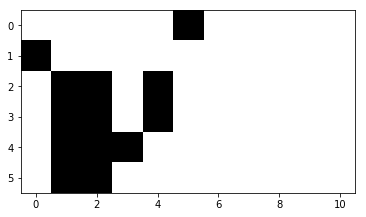

Target


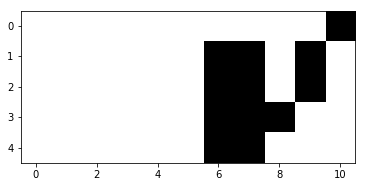

Predicted


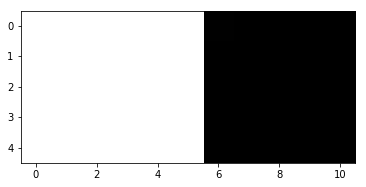

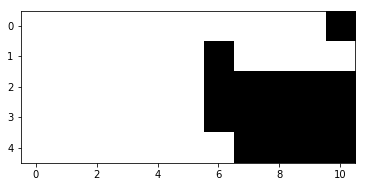

('Iteration', 100, 'Train loss:', 0.31458929002932723)
Test loss:  0.314721761421
Input


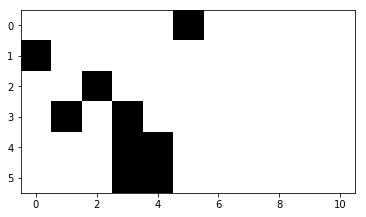

Target


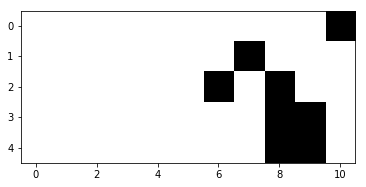

Predicted


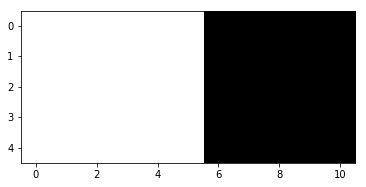

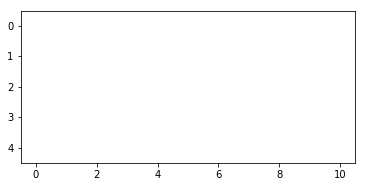

('Iteration', 500, 'Train loss:', 0.22906574807855734)
Test loss:  0.233631515566
Input


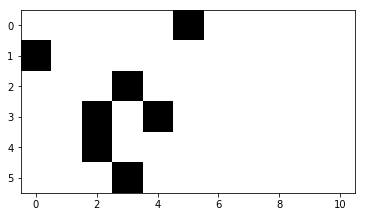

Target


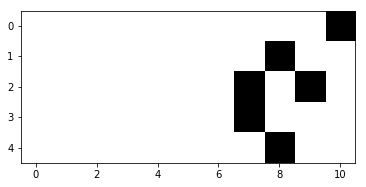

Predicted


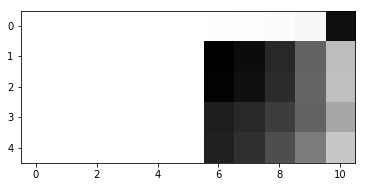

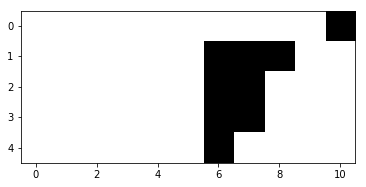

('Iteration', 600, 'Train loss:', 0.18401343822664623)
Test loss:  0.193089348806
Input


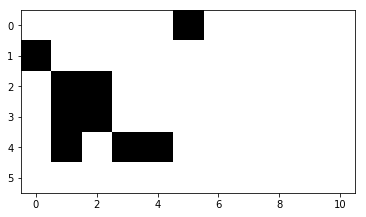

Target


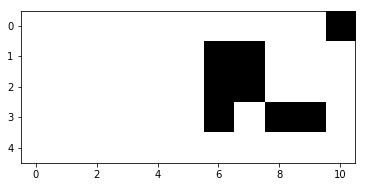

Predicted


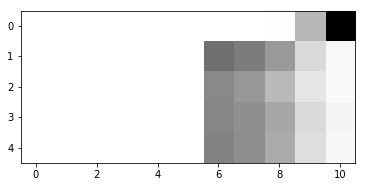

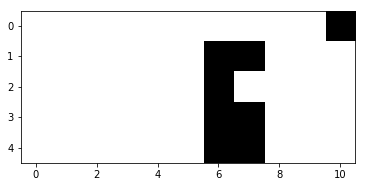

('Iteration', 700, 'Train loss:', 0.25500304204392588)
Test loss:  0.236206047612
Input


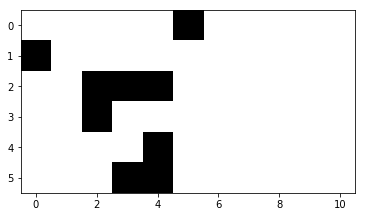

Target


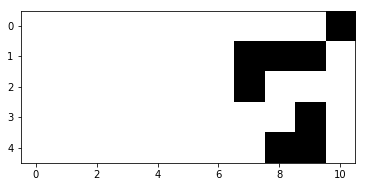

Predicted


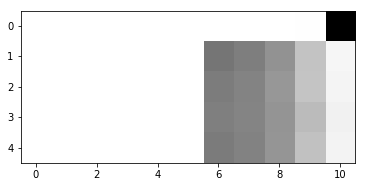

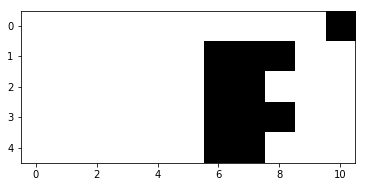

('Iteration', 800, 'Train loss:', 0.22129665714732741)
Test loss:  0.17889408818
Input


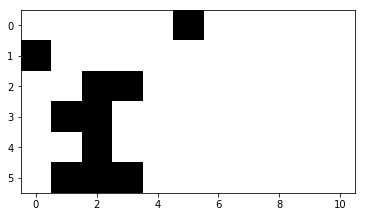

Target


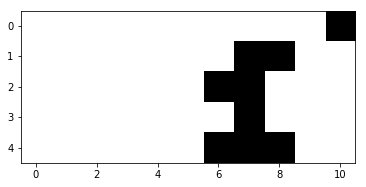

Predicted


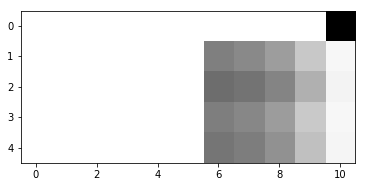

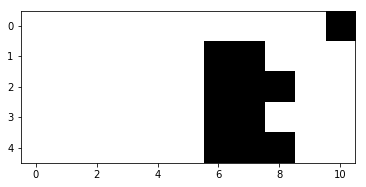

('Iteration', 900, 'Train loss:', 0.20327169216125146)
Test loss:  0.199105671354
Input


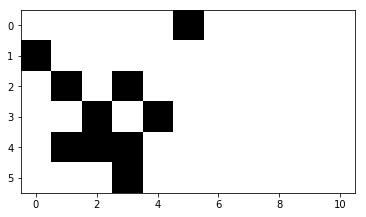

Target


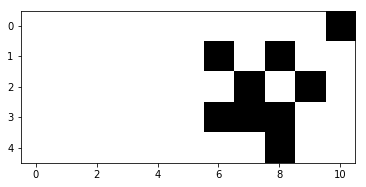

Predicted


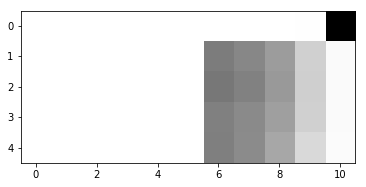

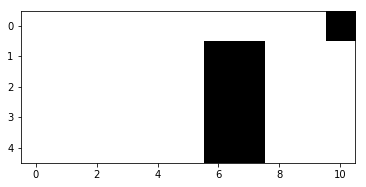

('Iteration', 1000, 'Train loss:', 0.18037421123071762)
Test loss:  0.207325728422
Input


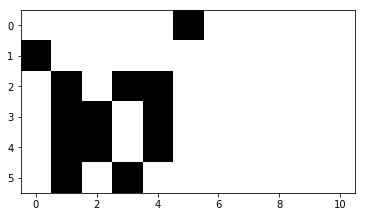

Target


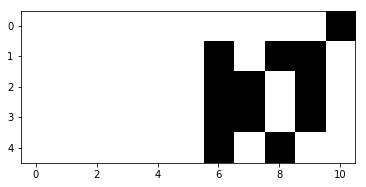

Predicted


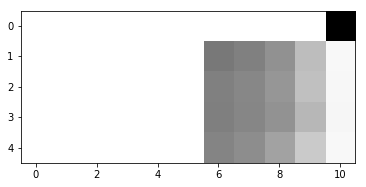

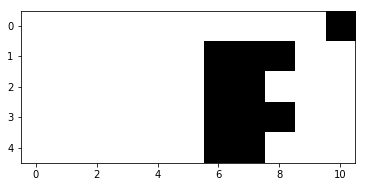

('Iteration', 1100, 'Train loss:', 0.18178874171715337)
Test loss:  0.211650442324
Input


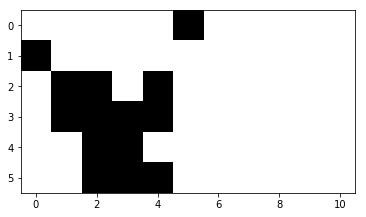

Target


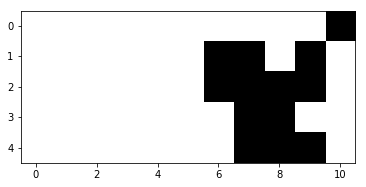

Predicted


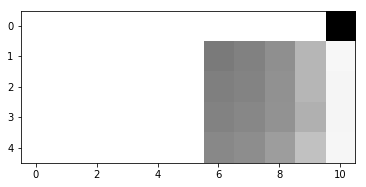

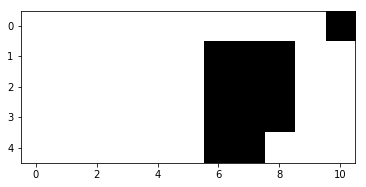

('Iteration', 1200, 'Train loss:', 0.18853450620137358)
Test loss:  0.212715998029
Input


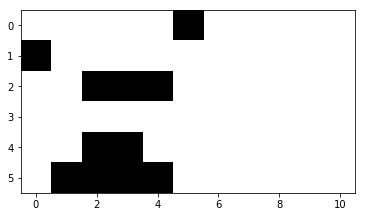

Target


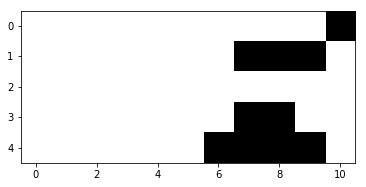

Predicted


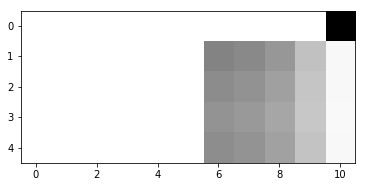

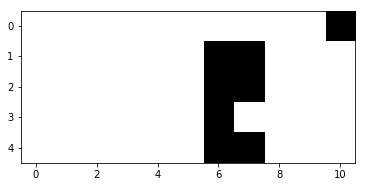

('Iteration', 1300, 'Train loss:', 0.20837369443506717)
Test loss:  0.231583000343
Input


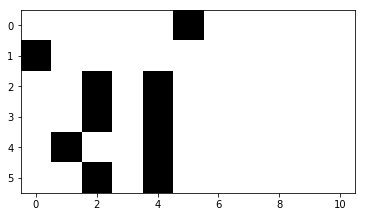

Target


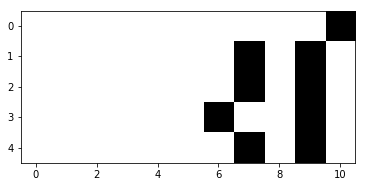

Predicted


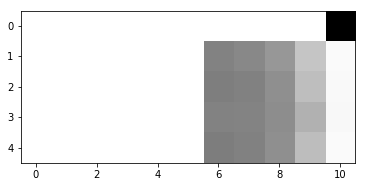

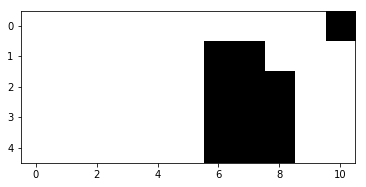

('Iteration', 1400, 'Train loss:', 0.19467118633280939)
Test loss:  0.206366309439
Input


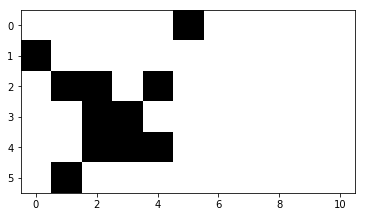

Target


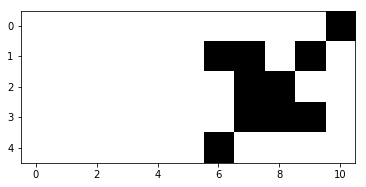

Predicted


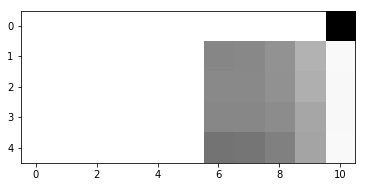

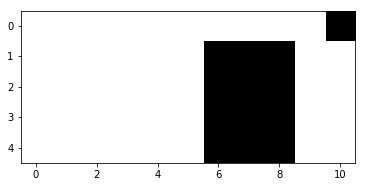

('Iteration', 1500, 'Train loss:', 0.20498700755731733)
Test loss:  0.206414322912
Input


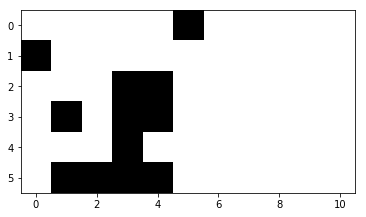

Target


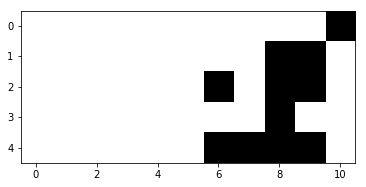

Predicted


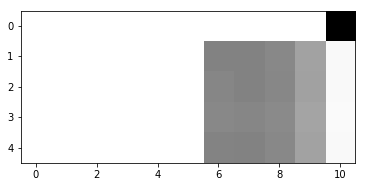

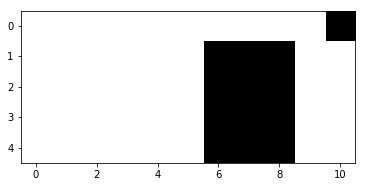

('Iteration', 1600, 'Train loss:', 0.2094686350470929)
Test loss:  0.220484513514
Input


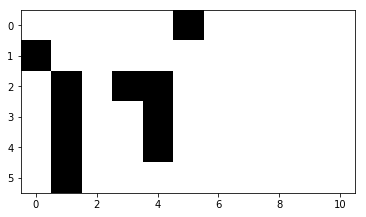

Target


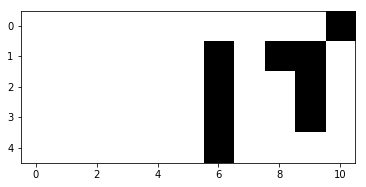

Predicted


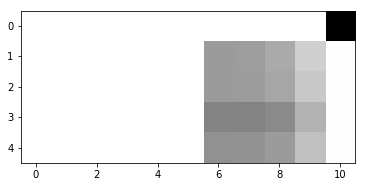

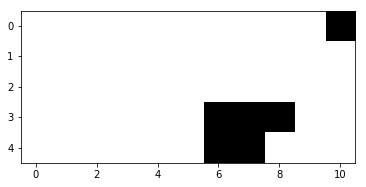

('Iteration', 1700, 'Train loss:', 0.20237361958584932)
Test loss:  0.188877924368
Input


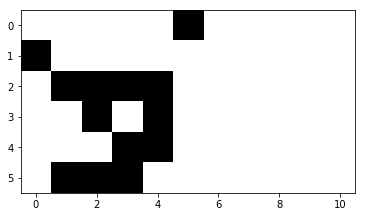

Target


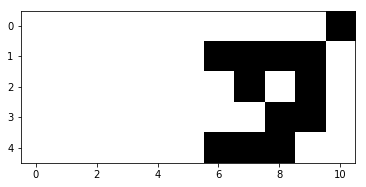

Predicted


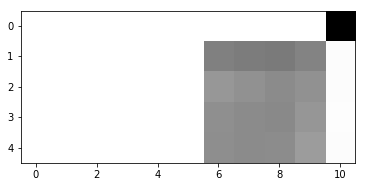

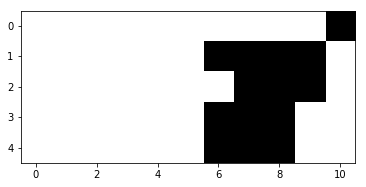

('Iteration', 1800, 'Train loss:', 0.21391069832962786)
Test loss:  0.207326115554
Input


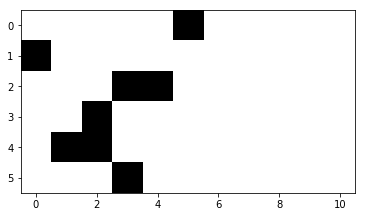

Target


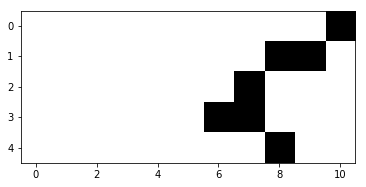

Predicted


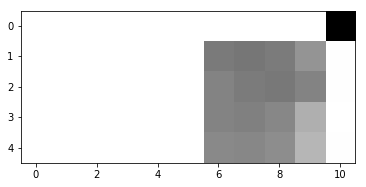

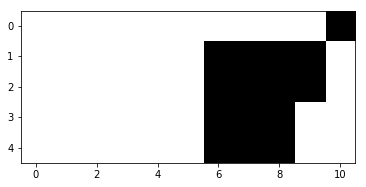

('Iteration', 1900, 'Train loss:', 0.20158713889145294)
Test loss:  0.191367321482
Input


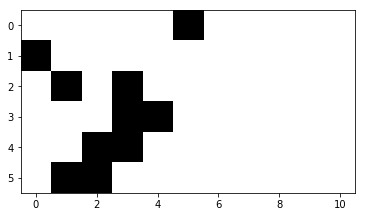

Target


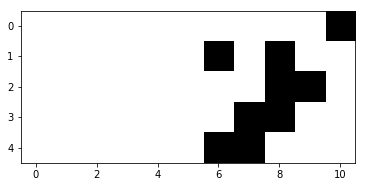

Predicted


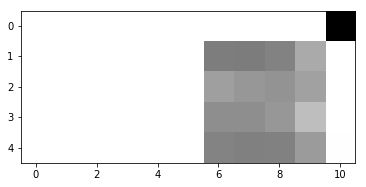

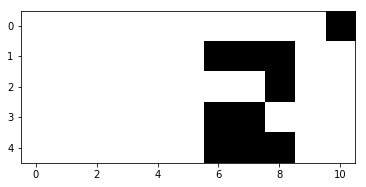

('Iteration', 2000, 'Train loss:', 0.2001777089760427)
Test loss:  0.205958850737
Input


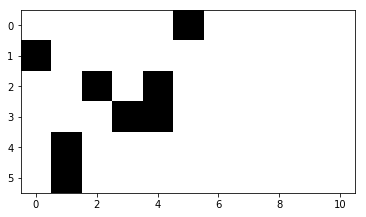

Target


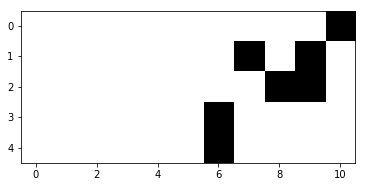

Predicted


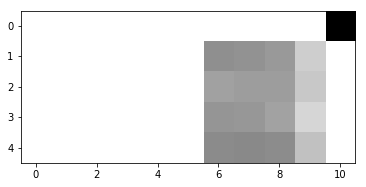

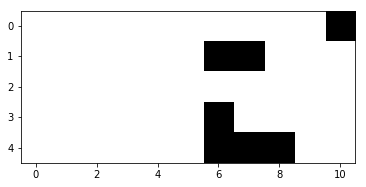

('Iteration', 2100, 'Train loss:', 0.18922096802726862)
Test loss:  0.20023009682
Input


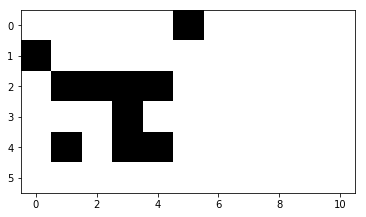

Target


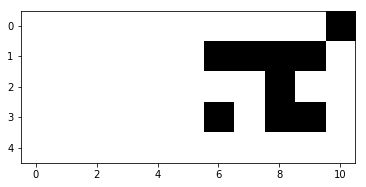

Predicted


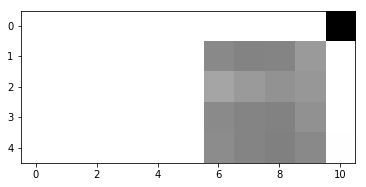

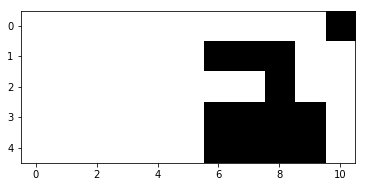

('Iteration', 2200, 'Train loss:', 0.19069416410683243)
Test loss:  0.196434073651
Input


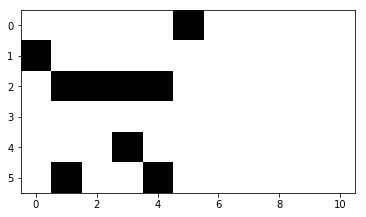

Target


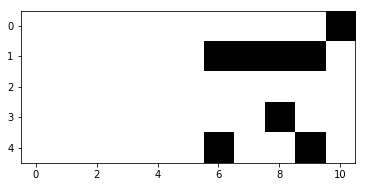

Predicted


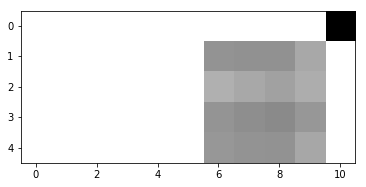

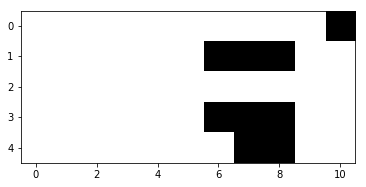

('Iteration', 2300, 'Train loss:', 0.20220482463848222)
Test loss:  0.187044825471
Input


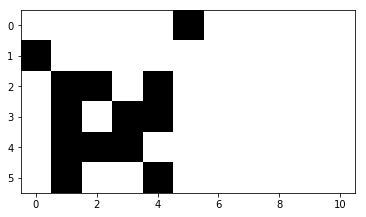

Target


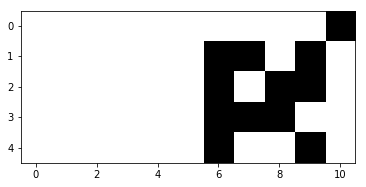

Predicted


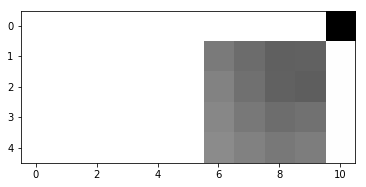

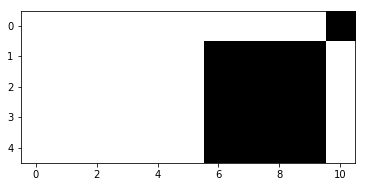

('Iteration', 2400, 'Train loss:', 0.19640882232055878)
Test loss:  0.193375201906
Input


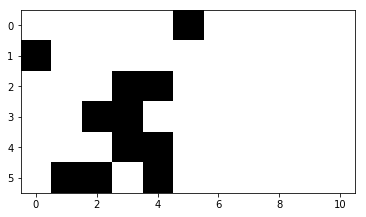

Target


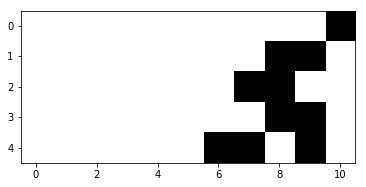

Predicted


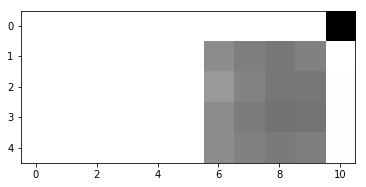

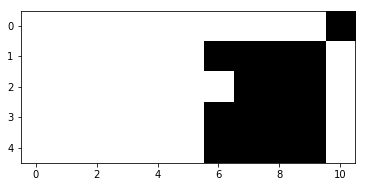

('Iteration', 2500, 'Train loss:', 0.19402305965467417)
Test loss:  0.189574612226
Input


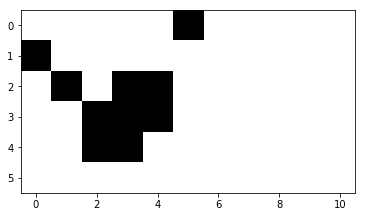

Target


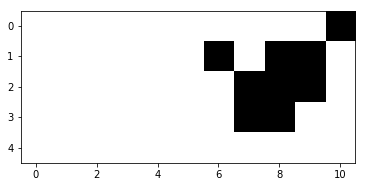

Predicted


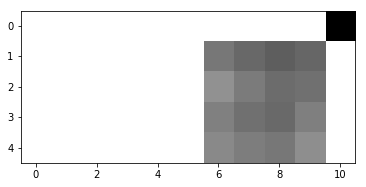

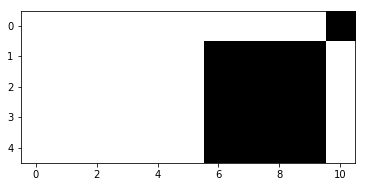

('Iteration', 2600, 'Train loss:', 0.18843726044345854)
Test loss:  0.199770991729
Input


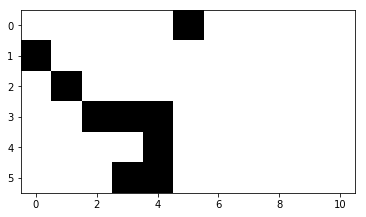

Target


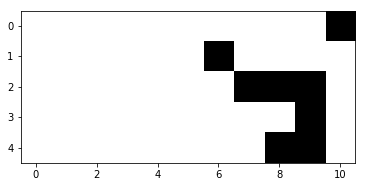

Predicted


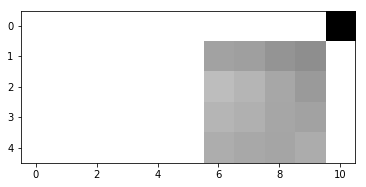

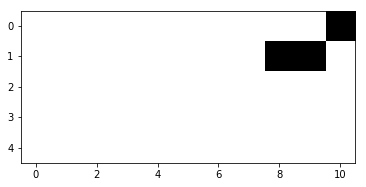

('Iteration', 2700, 'Train loss:', 0.14228762436639894)
Test loss:  0.19675123574
Input


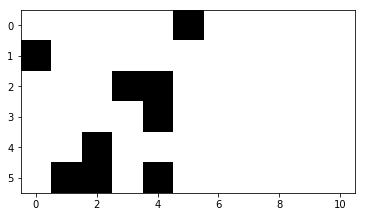

Target


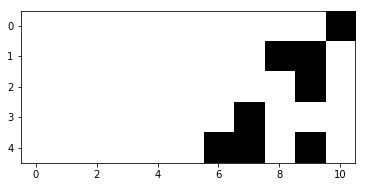

Predicted


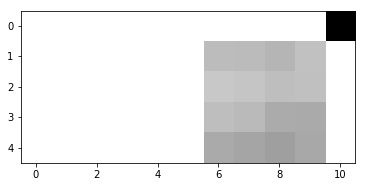

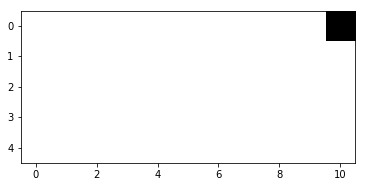

('Iteration', 2800, 'Train loss:', 0.19161149973204689)
Test loss:  0.198903134091
Input


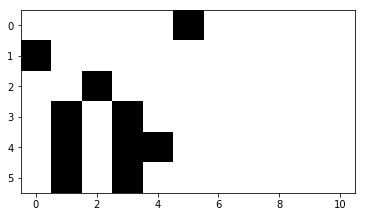

Target


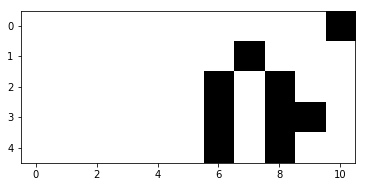

Predicted


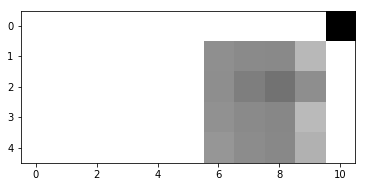

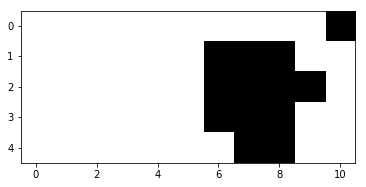

('Iteration', 2900, 'Train loss:', 0.18767610169485294)
Test loss:  0.187121327615
Input


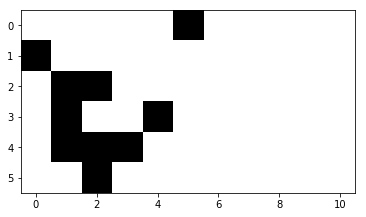

Target


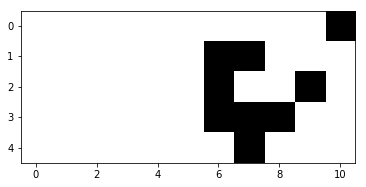

Predicted


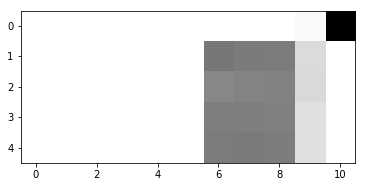

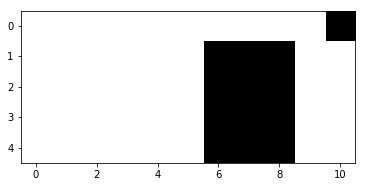

('Iteration', 3000, 'Train loss:', 0.17368057802038003)
Test loss:  0.182781658475
Input


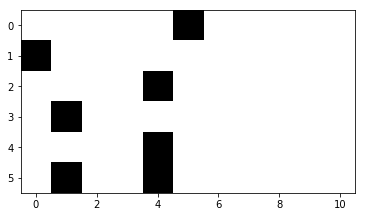

Target


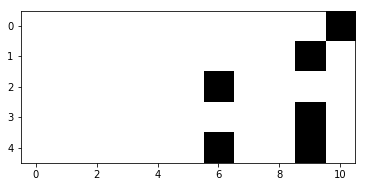

Predicted


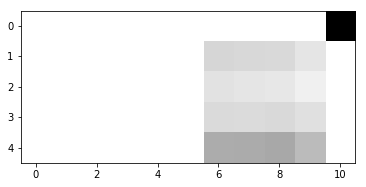

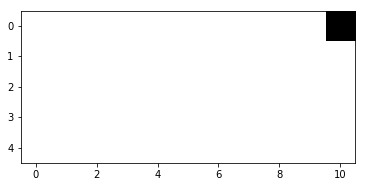

('Iteration', 3100, 'Train loss:', 0.19991519343444131)
Test loss:  0.151571314006
Input


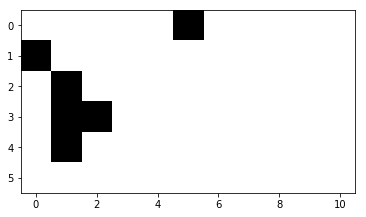

Target


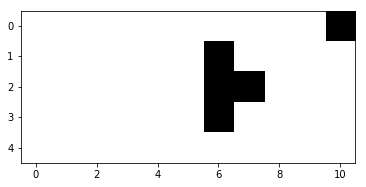

Predicted


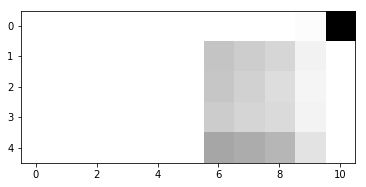

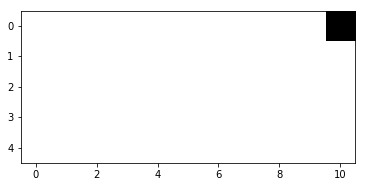

('Iteration', 3200, 'Train loss:', 0.19161643408744738)
Test loss:  0.197080756144
Input


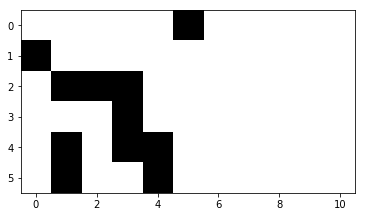

Target


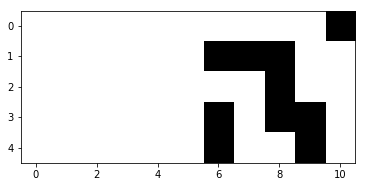

Predicted


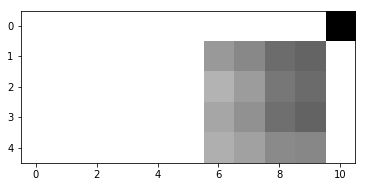

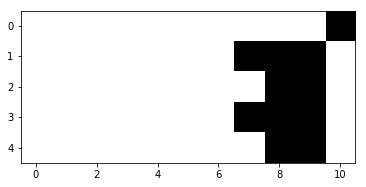

('Iteration', 3300, 'Train loss:', 0.19092077640900962)
Test loss:  0.193698722515
Input


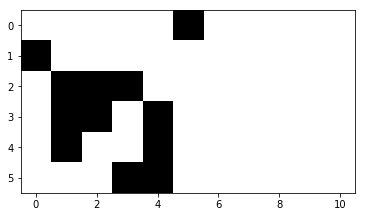

Target


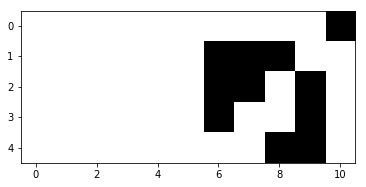

Predicted


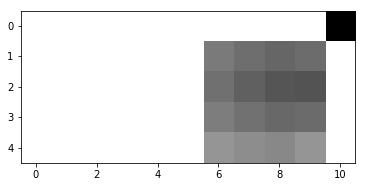

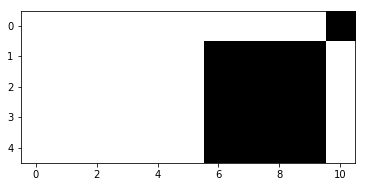

('Iteration', 3400, 'Train loss:', 0.19904770047718653)
Test loss:  0.183745307359
Input


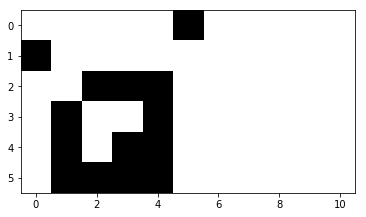

Target


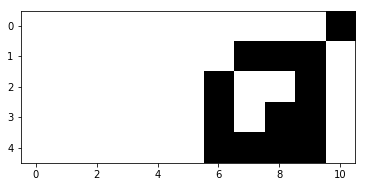

Predicted


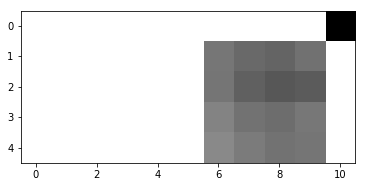

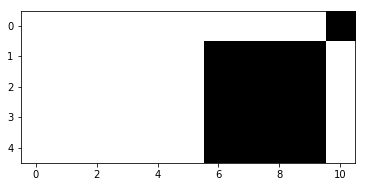

('Iteration', 3500, 'Train loss:', 0.18042185108964234)
Test loss:  0.165450441235
Input


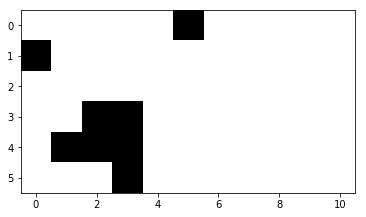

Target


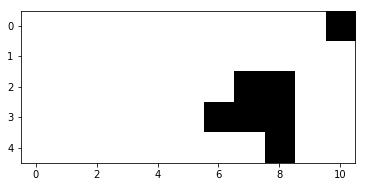

Predicted


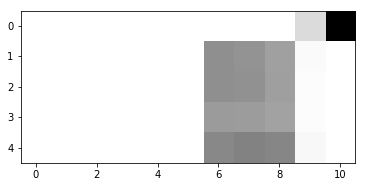

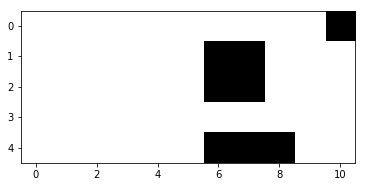

('Iteration', 3600, 'Train loss:', 0.19460159556025444)
Test loss:  0.1953498535
Input


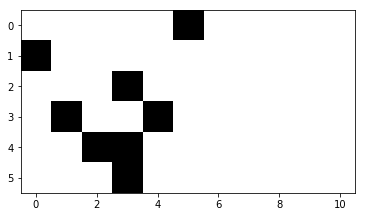

Target


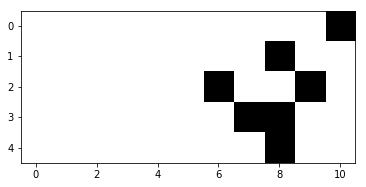

Predicted


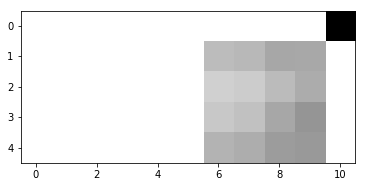

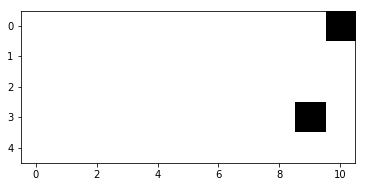

('Iteration', 3700, 'Train loss:', 0.18337927693631514)
Test loss:  0.18047367139
Input


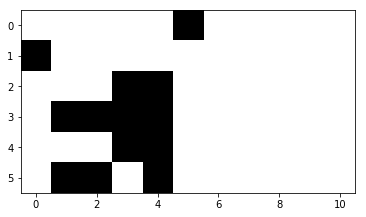

Target


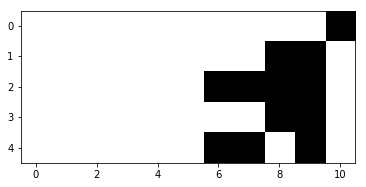

Predicted


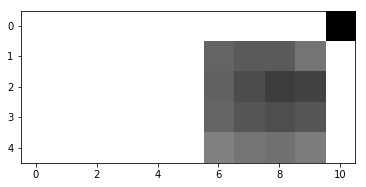

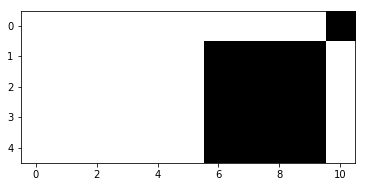

('Iteration', 3800, 'Train loss:', 0.15981819262054553)
Test loss:  0.180376938978
Input


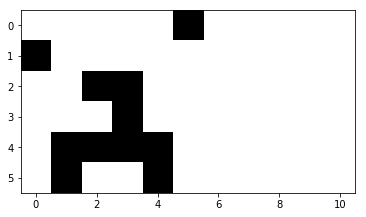

Target


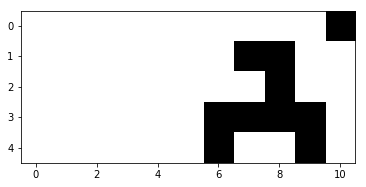

Predicted


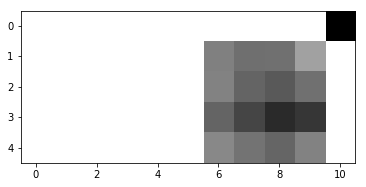

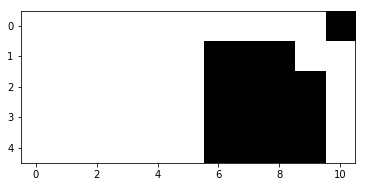

('Iteration', 3900, 'Train loss:', 0.16435760024695262)
Test loss:  0.170817761929
Input


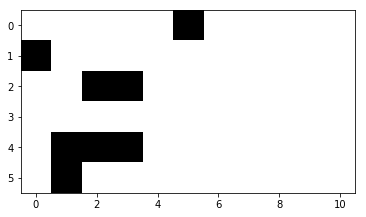

Target


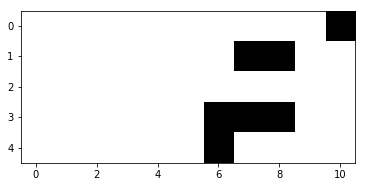

Predicted


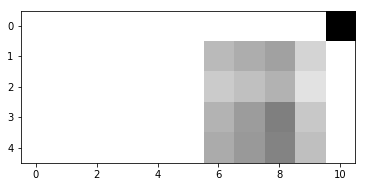

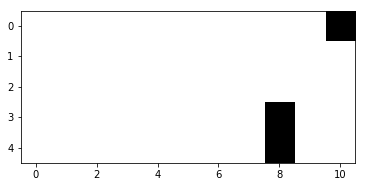

('Iteration', 4000, 'Train loss:', 0.21010081703006694)
Test loss:  0.17632660945
Input


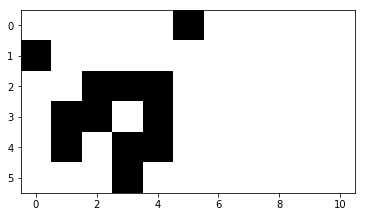

Target


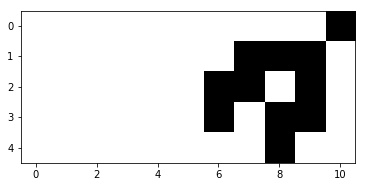

Predicted


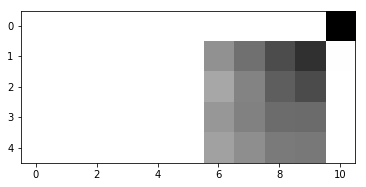

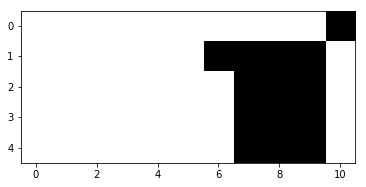

('Iteration', 4100, 'Train loss:', 0.14288905923070352)
Test loss:  0.194300888932
Input


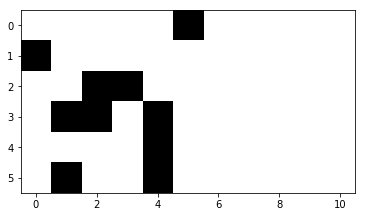

Target


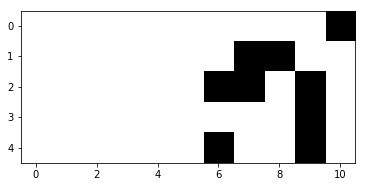

Predicted


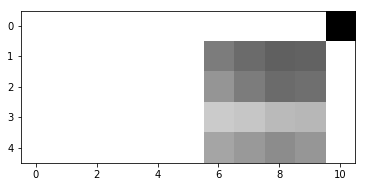

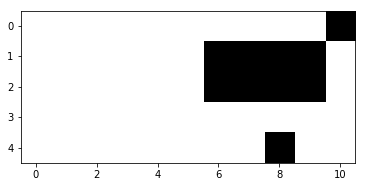

('Iteration', 4200, 'Train loss:', 0.19838395316489707)
Test loss:  0.176583892364
Input


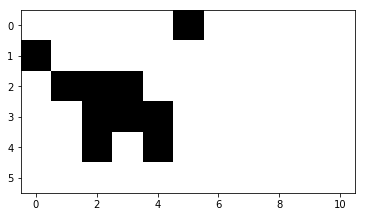

Target


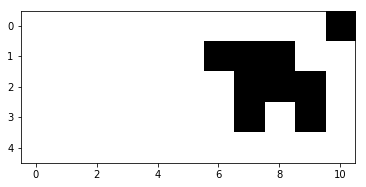

Predicted


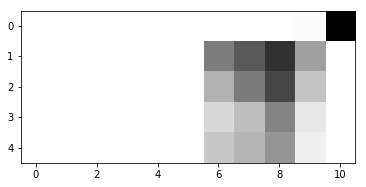

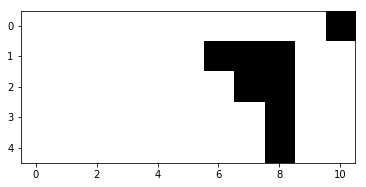

('Iteration', 4300, 'Train loss:', 0.16015046215325598)
Test loss:  0.151781634889
Input


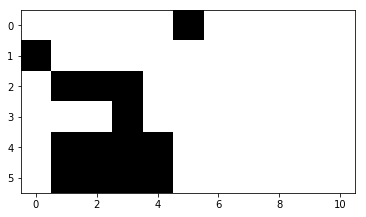

Target


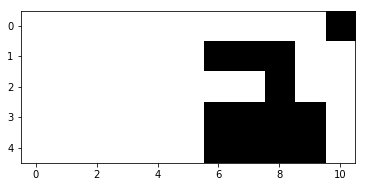

Predicted


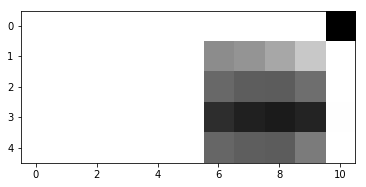

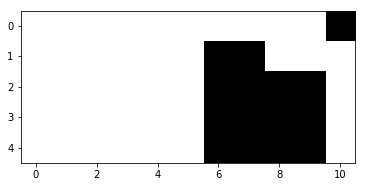

('Iteration', 4400, 'Train loss:', 0.11523997729881288)
Test loss:  0.19629988935
Input


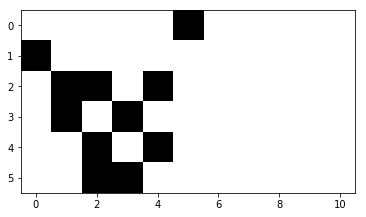

Target


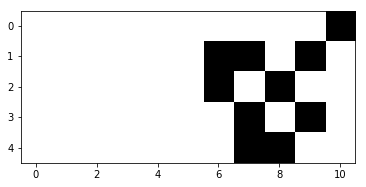

Predicted


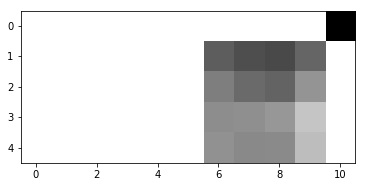

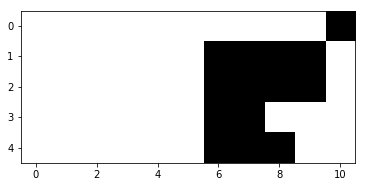

('Iteration', 4500, 'Train loss:', 0.17984276195122098)
Test loss:  0.198432360737
Input


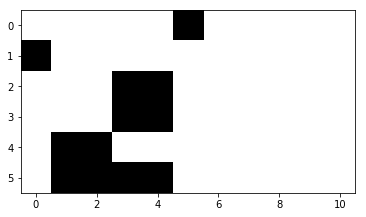

Target


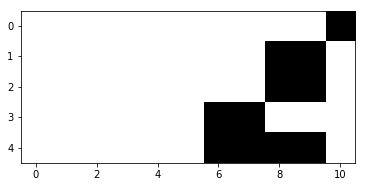

Predicted


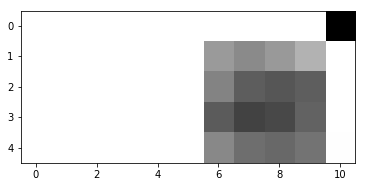

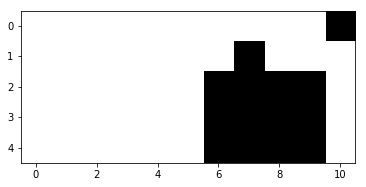

('Iteration', 4600, 'Train loss:', 0.15021568284865924)
Test loss:  0.172672471209
Input


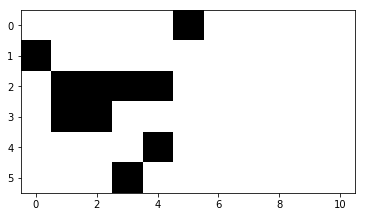

Target


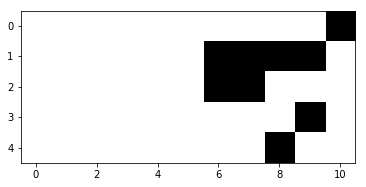

Predicted


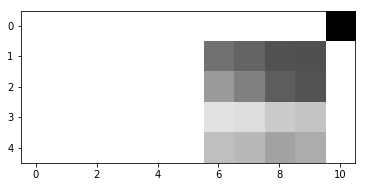

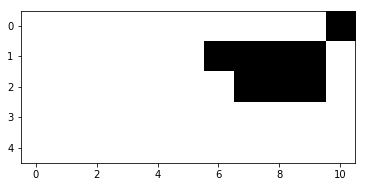

('Iteration', 4700, 'Train loss:', 0.18507458410804456)
Test loss:  0.178378724754
Input


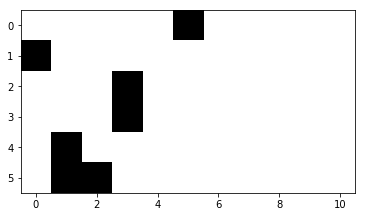

Target


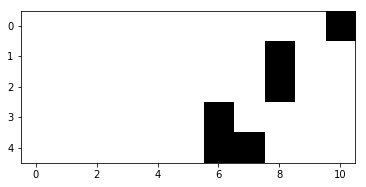

Predicted


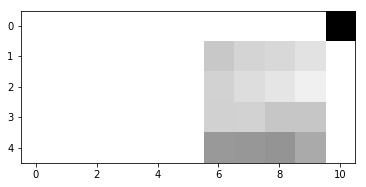

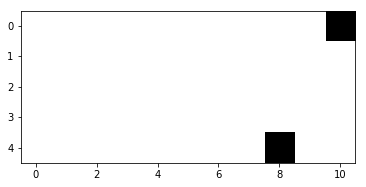

('Iteration', 4800, 'Train loss:', 0.16931200368083282)
Test loss:  0.205041155693
Input


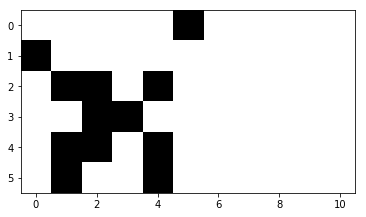

Target


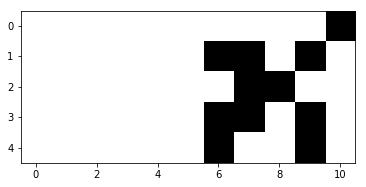

Predicted


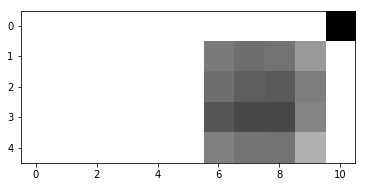

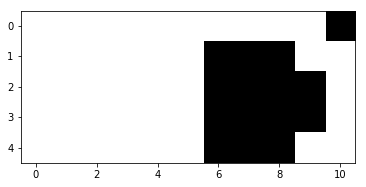

('Iteration', 4900, 'Train loss:', 0.17209132606036157)
Test loss:  0.199239311317
Input


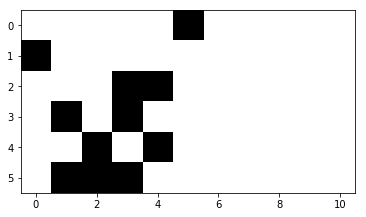

Target


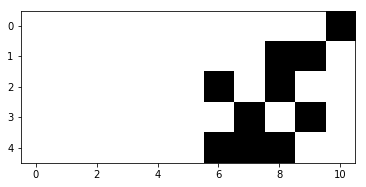

Predicted


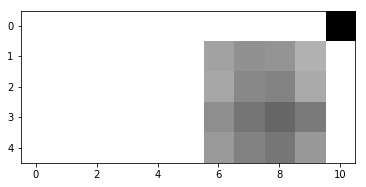

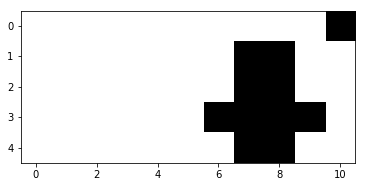

('Iteration', 5000, 'Train loss:', 0.12765516267056393)
Test loss:  0.121409730912
Input


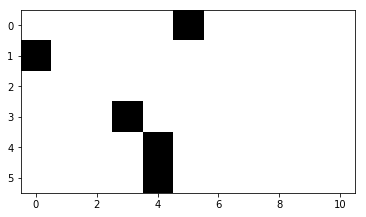

Target


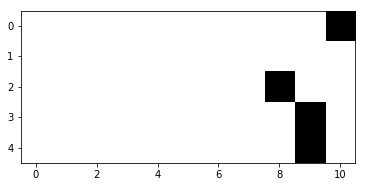

Predicted


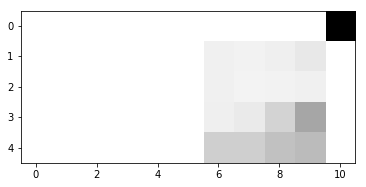

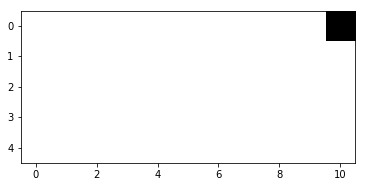

('Iteration', 5100, 'Train loss:', 0.16320972367593559)
Test loss:  0.168440316901
Input


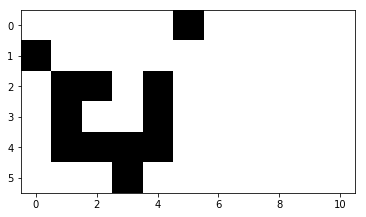

Target


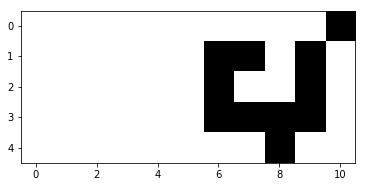

Predicted


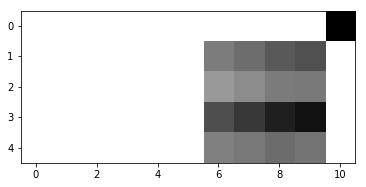

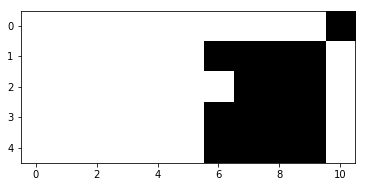

('Iteration', 5200, 'Train loss:', 0.19874367674977944)
Test loss:  0.179835486563
Input


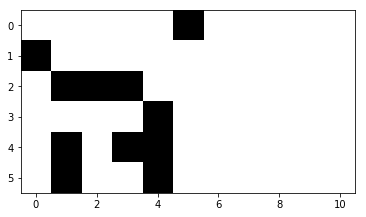

Target


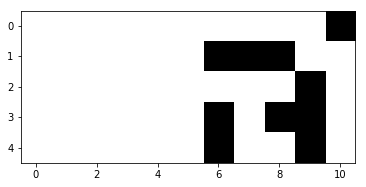

Predicted


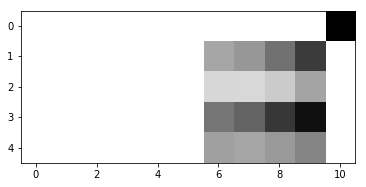

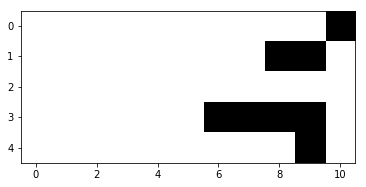

('Iteration', 5300, 'Train loss:', 0.20567901250020465)
Test loss:  0.211322253845
Input


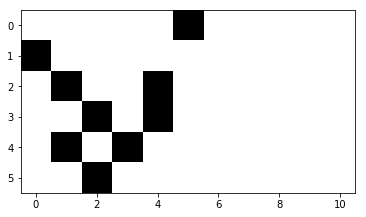

Target


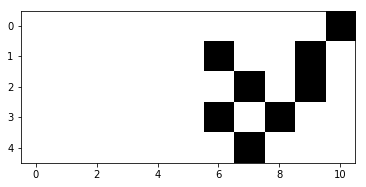

Predicted


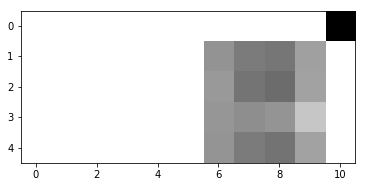

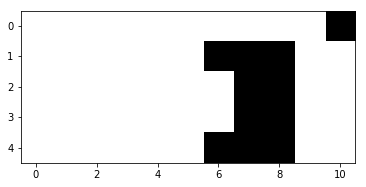

('Iteration', 5400, 'Train loss:', 0.17322721179265543)
Test loss:  0.192923432076
Input


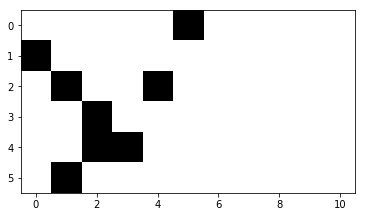

Target


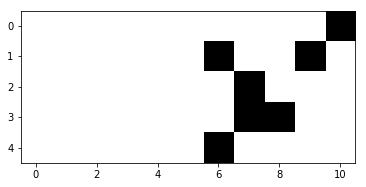

Predicted


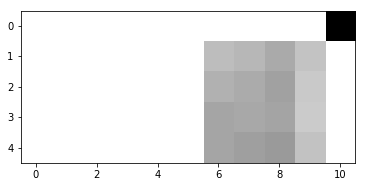

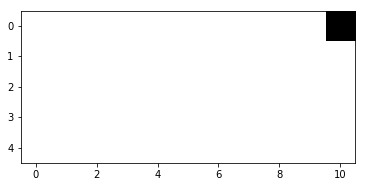

('Iteration', 5500, 'Train loss:', 0.16697051077365607)
Test loss:  0.197841744314
Input


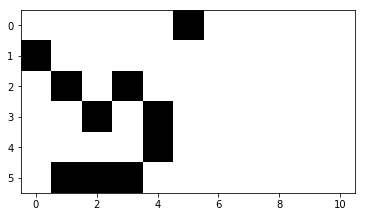

Target


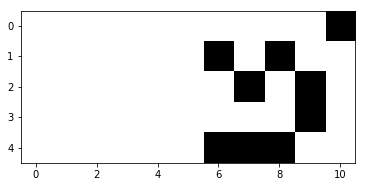

Predicted


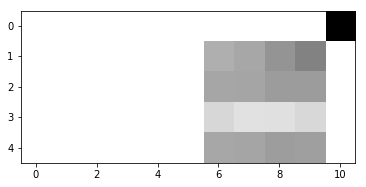

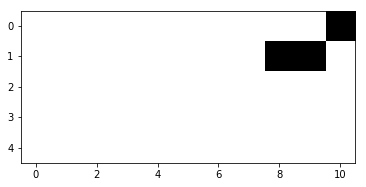

('Iteration', 5600, 'Train loss:', 0.14163281887734161)
Test loss:  0.137877350802
Input


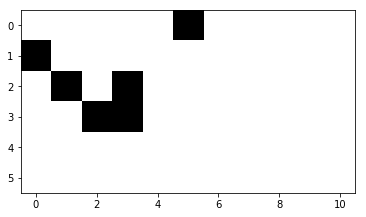

Target


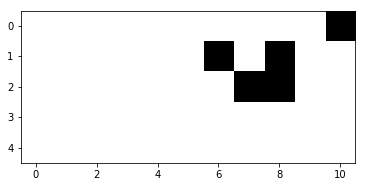

Predicted


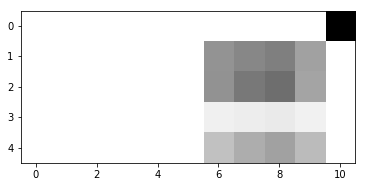

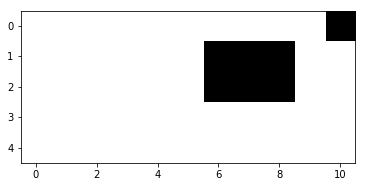

('Iteration', 5700, 'Train loss:', 0.17778616009154533)
Test loss:  0.188945062429
Input


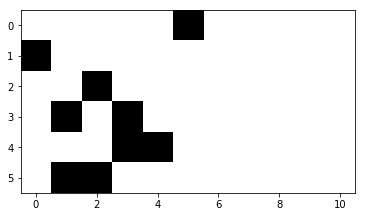

Target


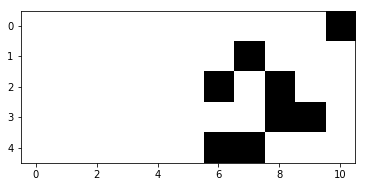

Predicted


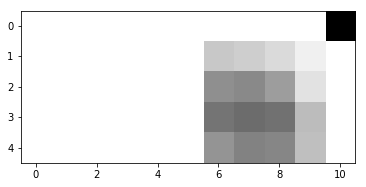

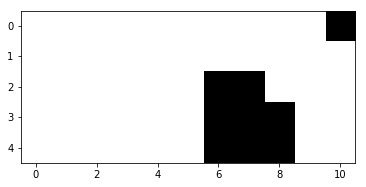

('Iteration', 5800, 'Train loss:', 0.15455004174234349)
Test loss:  0.144133514699
Input


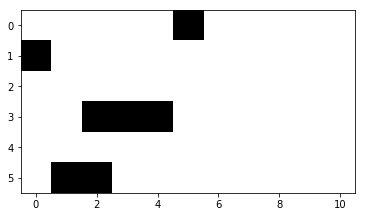

Target


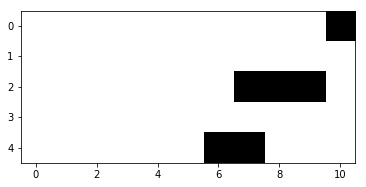

Predicted


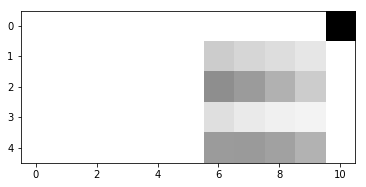

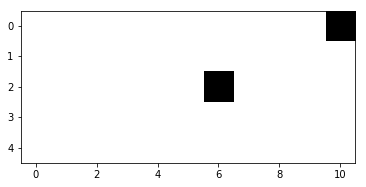

('Iteration', 5900, 'Train loss:', 0.18216344581161162)
Test loss:  0.183452731426
Input


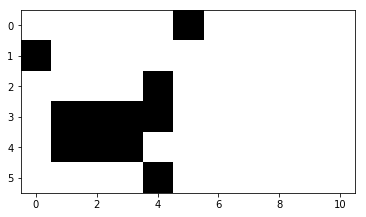

Target


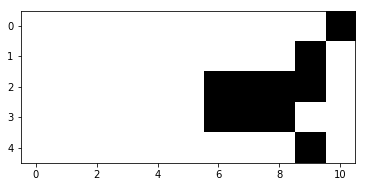

Predicted


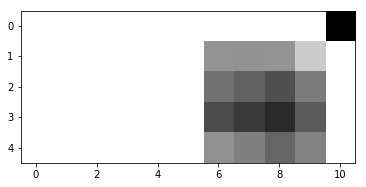

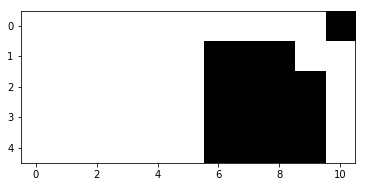

('Iteration', 6000, 'Train loss:', 0.19191163348313045)
Test loss:  0.169354512313
Input


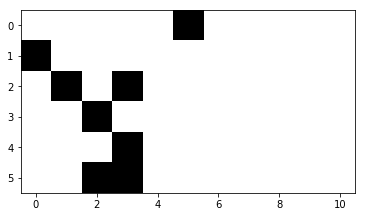

Target


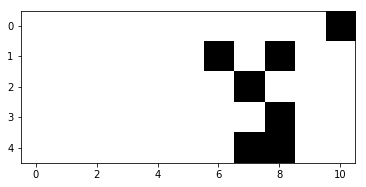

Predicted


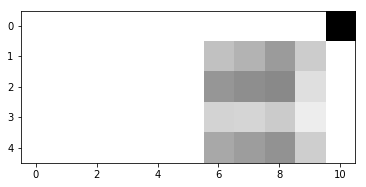

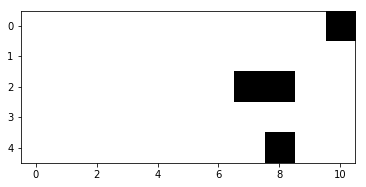

('Iteration', 6100, 'Train loss:', 0.18041031461406484)
Test loss:  0.135520767165
Input


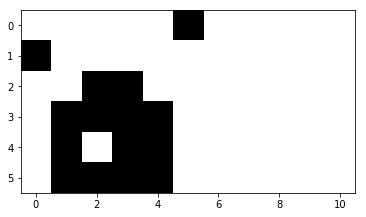

Target


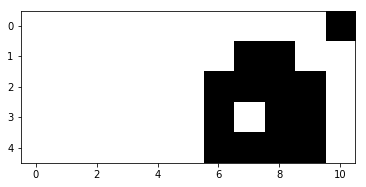

Predicted


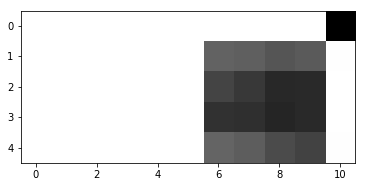

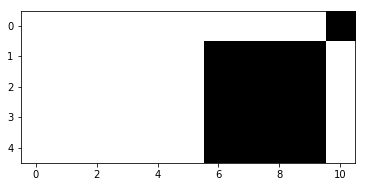

('Iteration', 6200, 'Train loss:', 0.18172257938814812)
Test loss:  0.195763498611
Input


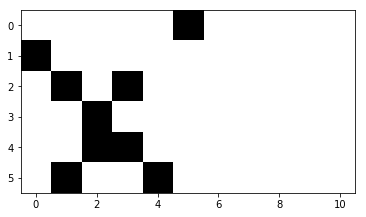

Target


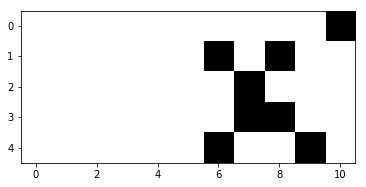

Predicted


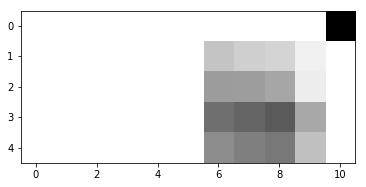

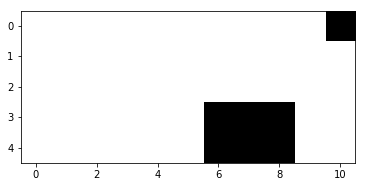

('Iteration', 6300, 'Train loss:', 0.16010259499417409)
Test loss:  0.133435495584
Input


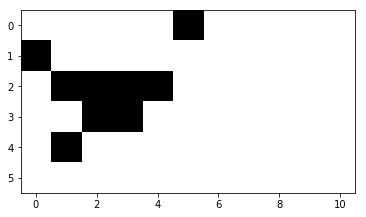

Target


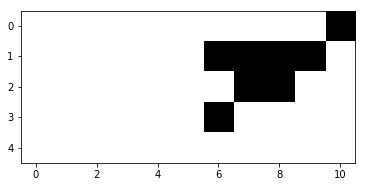

Predicted


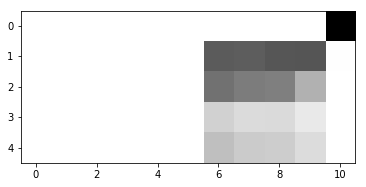

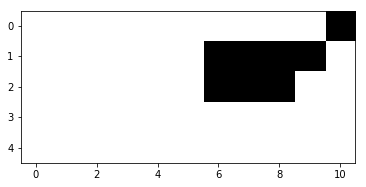

('Iteration', 6400, 'Train loss:', 0.14208929248058019)
Test loss:  0.147799799411
Input


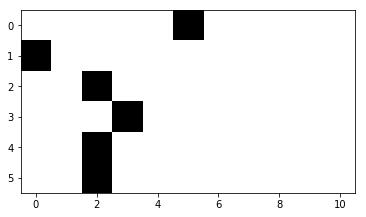

Target


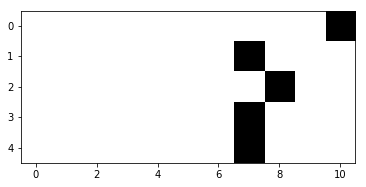

Predicted


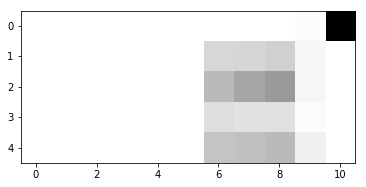

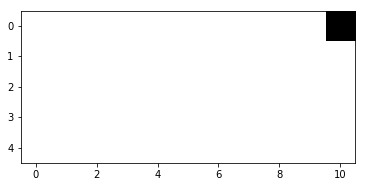

('Iteration', 6500, 'Train loss:', 0.15612397128061156)
Test loss:  0.143370475409
Input


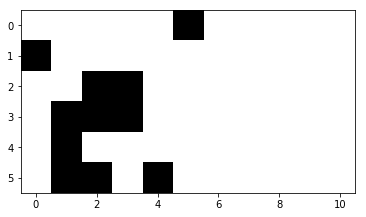

Target


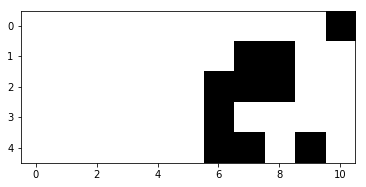

Predicted


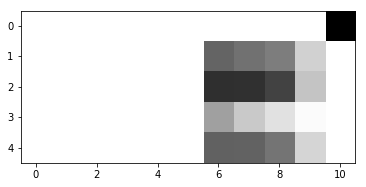

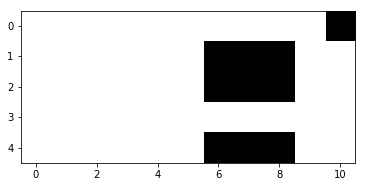

('Iteration', 6600, 'Train loss:', 0.15226298864583965)
Test loss:  0.186795348762
Input


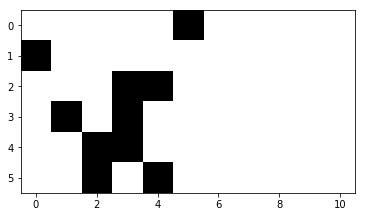

Target


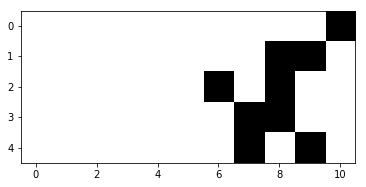

Predicted


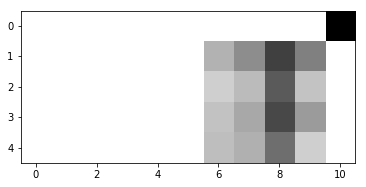

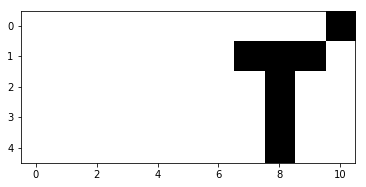

('Iteration', 6700, 'Train loss:', 0.16873105779603653)
Test loss:  0.147411870315
Input


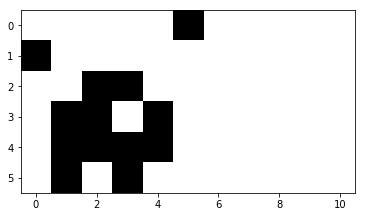

Target


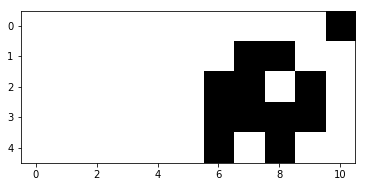

Predicted


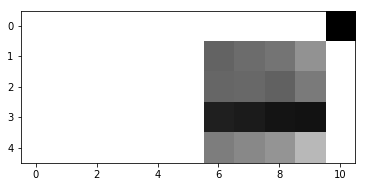

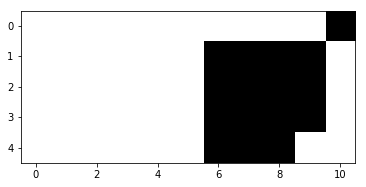

('Iteration', 6800, 'Train loss:', 0.13837317902120566)
Test loss:  0.119911898154
Input


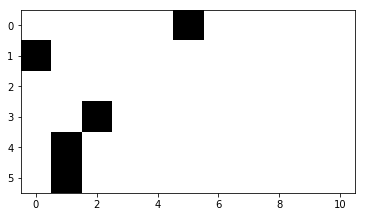

Target


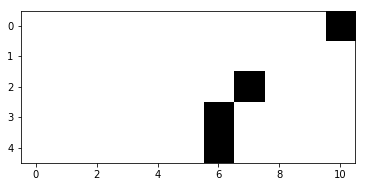

Predicted


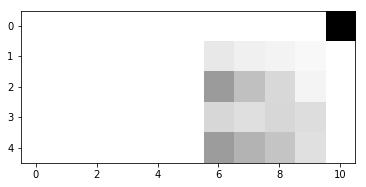

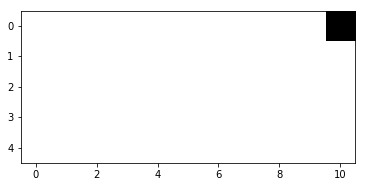

('Iteration', 6900, 'Train loss:', 0.19647407173140513)
Test loss:  0.15617538038
Input


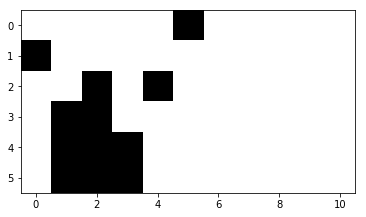

Target


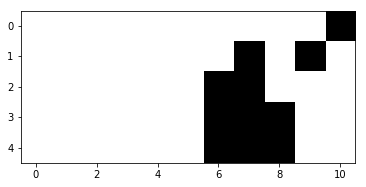

Predicted


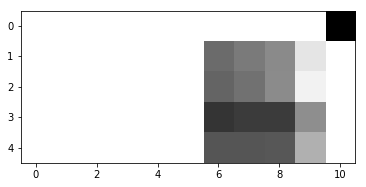

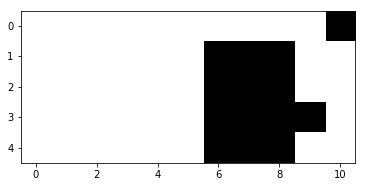

('Iteration', 7000, 'Train loss:', 0.11822513508678782)
Test loss:  0.175167782258
Input


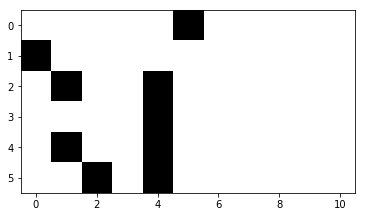

Target


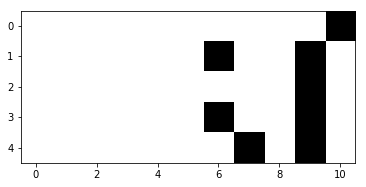

Predicted


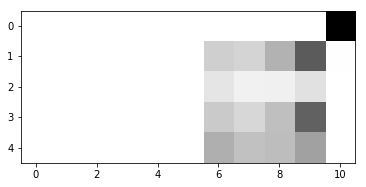

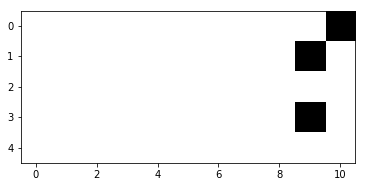

('Iteration', 7100, 'Train loss:', 0.18668391419344313)
Test loss:  0.154529737746
Input


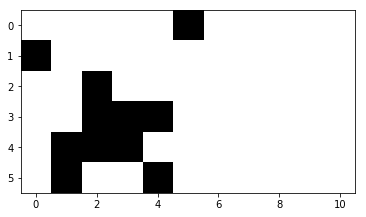

Target


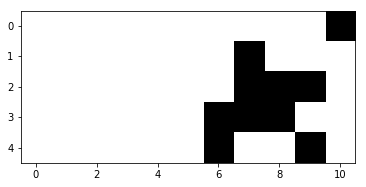

Predicted


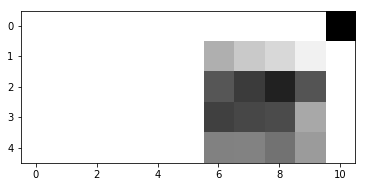

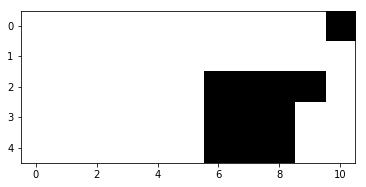

('Iteration', 7200, 'Train loss:', 0.15577731447394788)
Test loss:  0.158582589951
Input


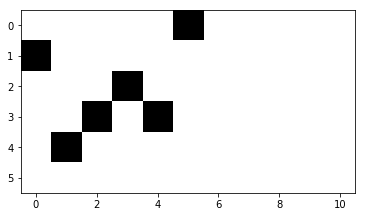

Target


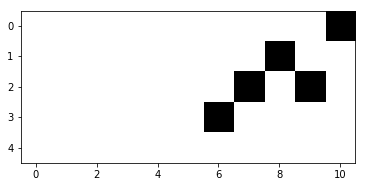

Predicted


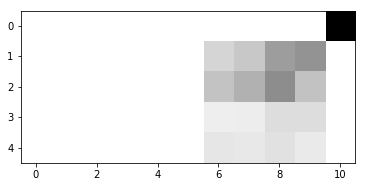

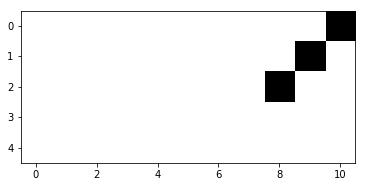

('Iteration', 7300, 'Train loss:', 0.17100806104460417)
Test loss:  0.127197411917
Input


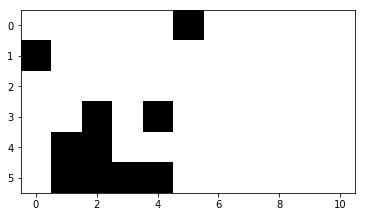

Target


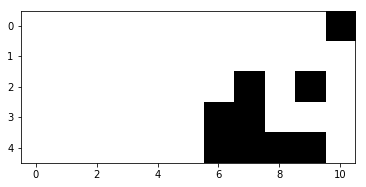

Predicted


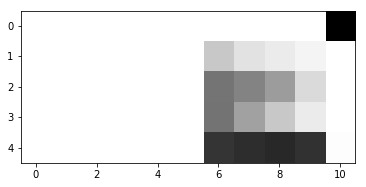

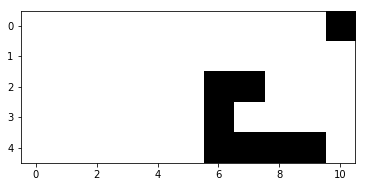

('Iteration', 7400, 'Train loss:', 0.14179624638191404)
Test loss:  0.124753026699
Input


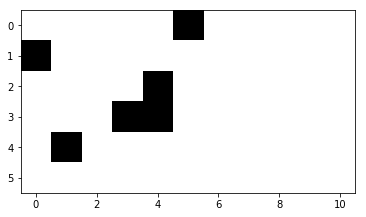

Target


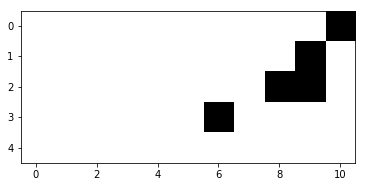

Predicted


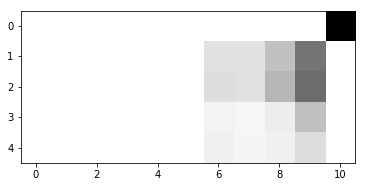

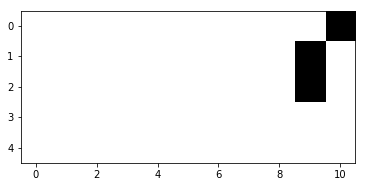

('Iteration', 7500, 'Train loss:', 0.19072345364503263)
Test loss:  0.0936807052415
Input


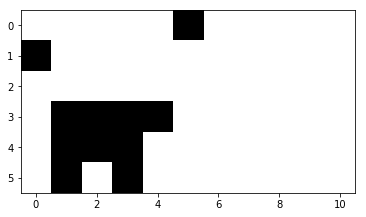

Target


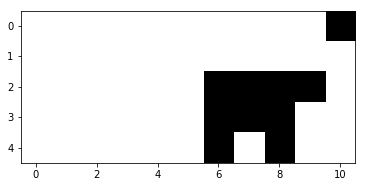

Predicted


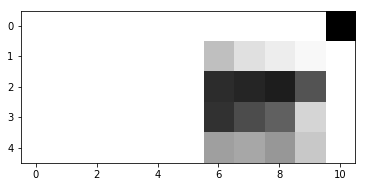

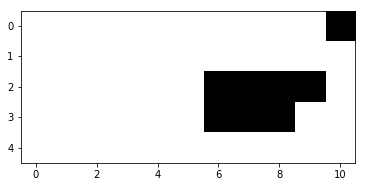

('Iteration', 7600, 'Train loss:', 0.12462641401077046)
Test loss:  0.15039716788
Input


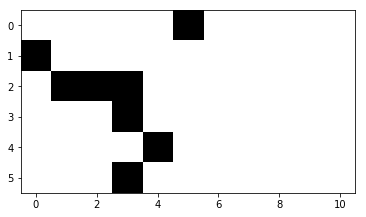

Target


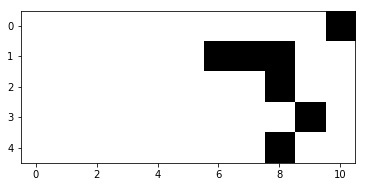

Predicted


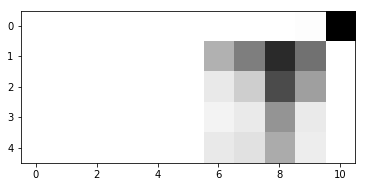

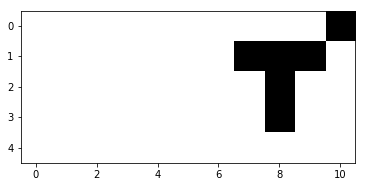

('Iteration', 7700, 'Train loss:', 0.087865434531523026)
Test loss:  0.156255090285
Input


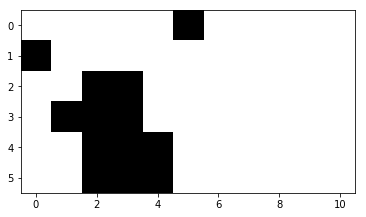

Target


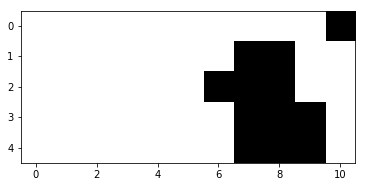

Predicted


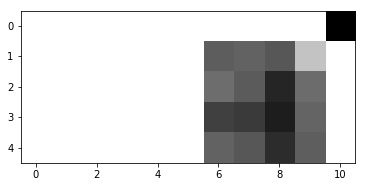

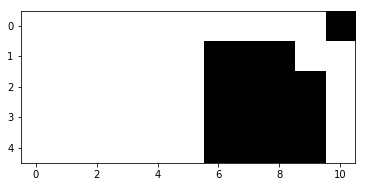

('Iteration', 7800, 'Train loss:', 0.14303049739639118)
Test loss:  0.101096966334
Input


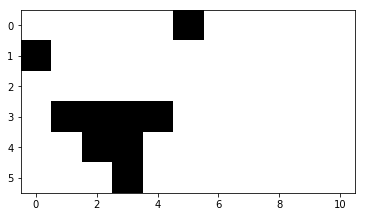

Target


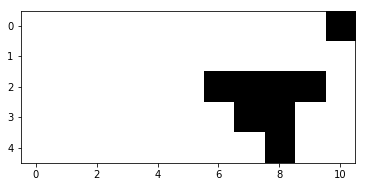

Predicted


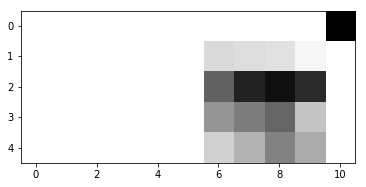

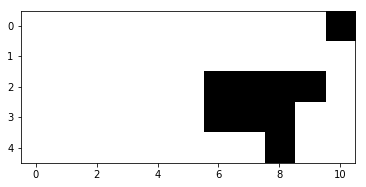

('Iteration', 7900, 'Train loss:', 0.19899331846923241)
Test loss:  0.21047923365
Input


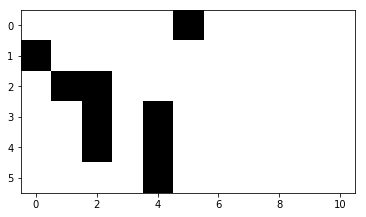

Target


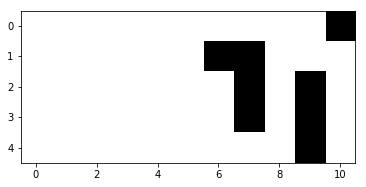

Predicted


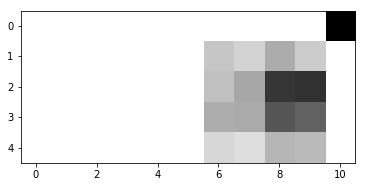

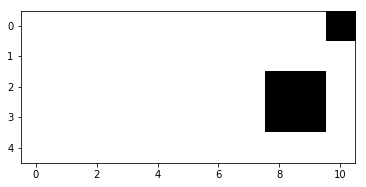

('Iteration', 8000, 'Train loss:', 0.16792315466786323)
Test loss:  0.193529566404
Input


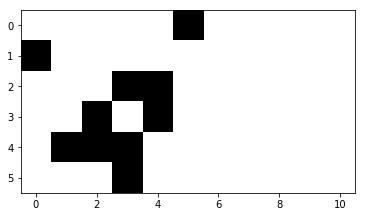

Target


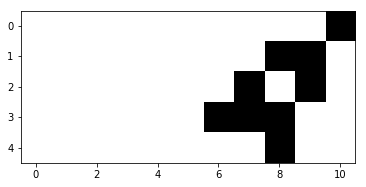

Predicted


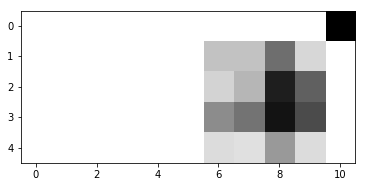

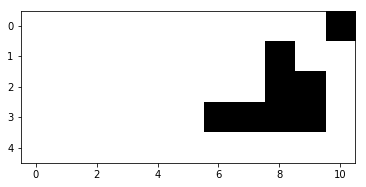

('Iteration', 8100, 'Train loss:', 0.16349669801167008)
Test loss:  0.184541693646
Input


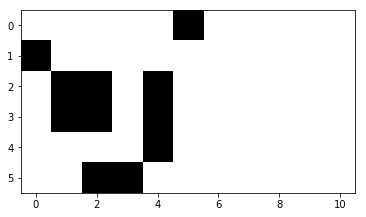

Target


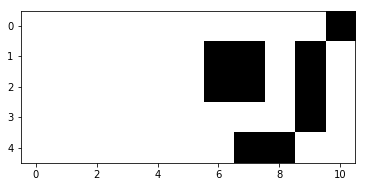

Predicted


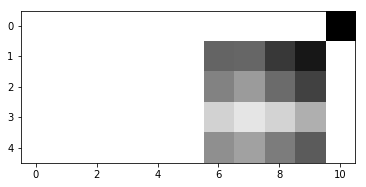

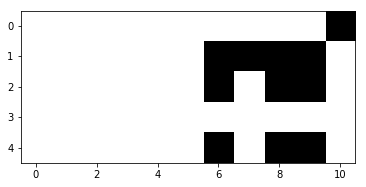

('Iteration', 8200, 'Train loss:', 0.18439373964006167)
Test loss:  0.127922915421
Input


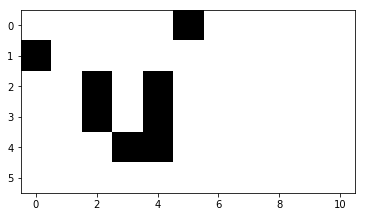

Target


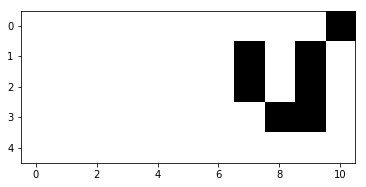

Predicted


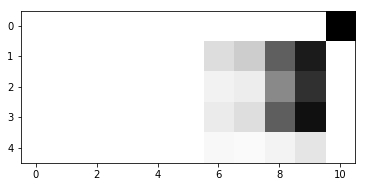

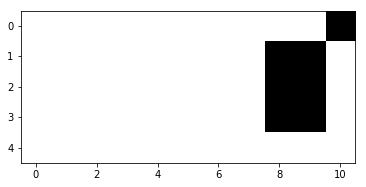

('Iteration', 8300, 'Train loss:', 0.15079829567978073)
Test loss:  0.116805537651
Input


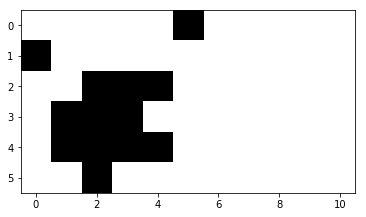

Target


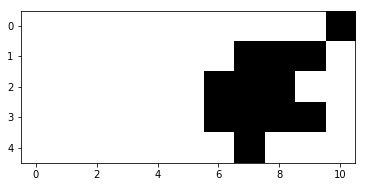

Predicted


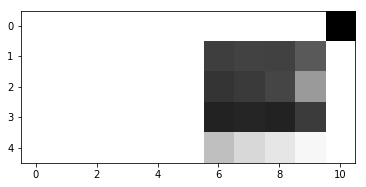

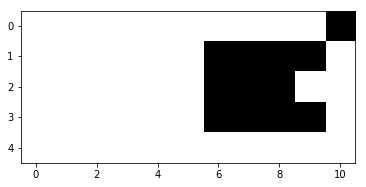

('Iteration', 8400, 'Train loss:', 0.10513916724449446)
Test loss:  0.18690816698
Input


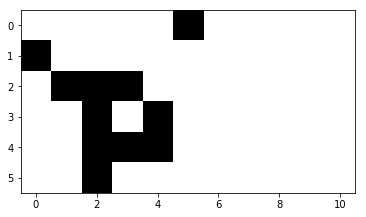

Target


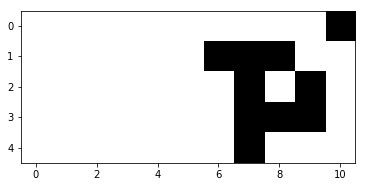

Predicted


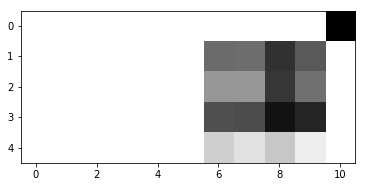

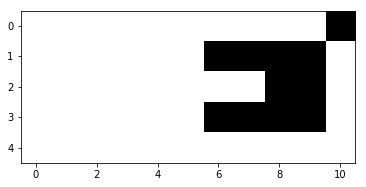

('Iteration', 8500, 'Train loss:', 0.1811019034912513)
Test loss:  0.157686315413
Input


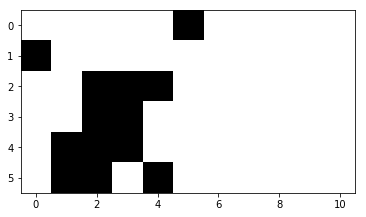

Target


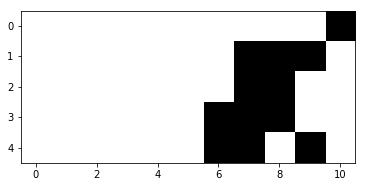

Predicted


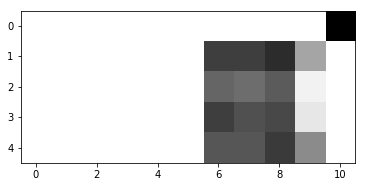

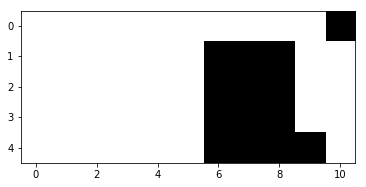

('Iteration', 8600, 'Train loss:', 0.23272394725475373)
Test loss:  0.165802863967
Input


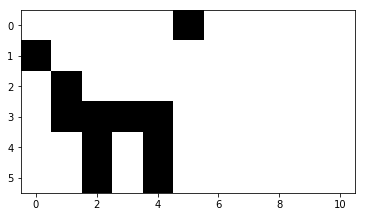

Target


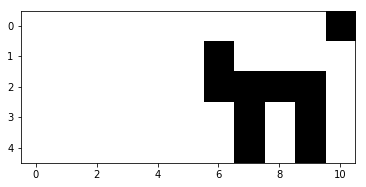

Predicted


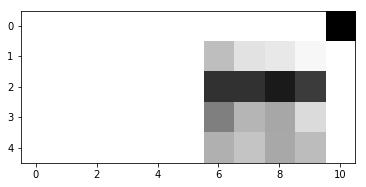

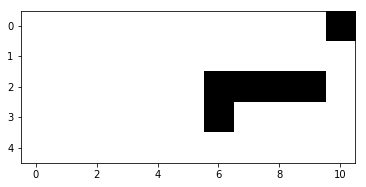

('Iteration', 8700, 'Train loss:', 0.1115938273088156)
Test loss:  0.163774241615
Input


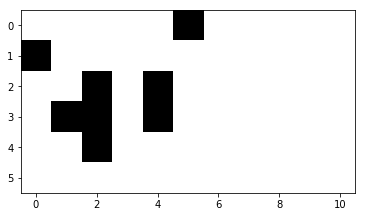

Target


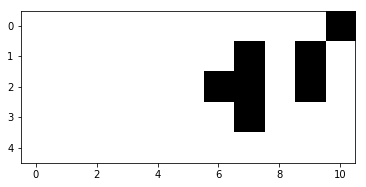

Predicted


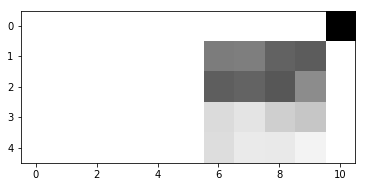

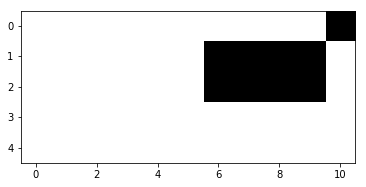

('Iteration', 8800, 'Train loss:', 0.14581944655641008)
Test loss:  0.186627003759
Input


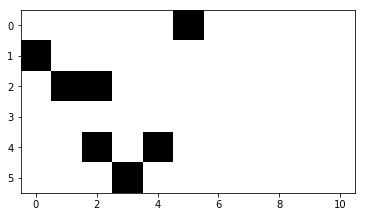

Target


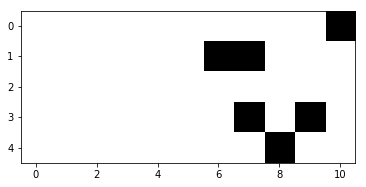

Predicted


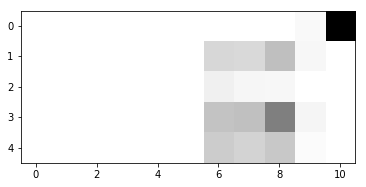

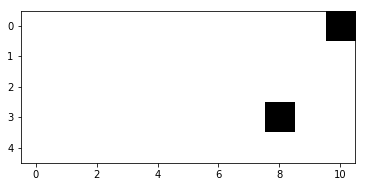

('Iteration', 8900, 'Train loss:', 0.14802915965224181)
Test loss:  0.0976903917776
Input


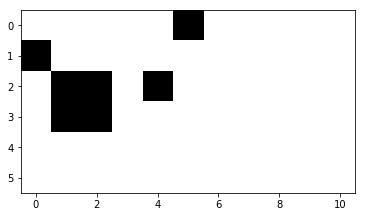

Target


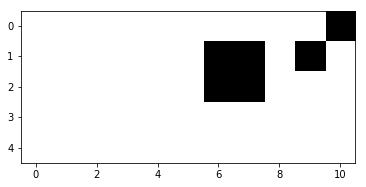

Predicted


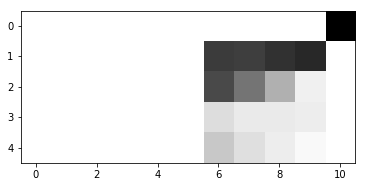

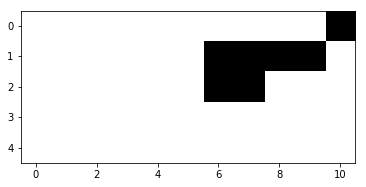

('Iteration', 9000, 'Train loss:', 0.15002146808179959)
Test loss:  0.165948524695
Input


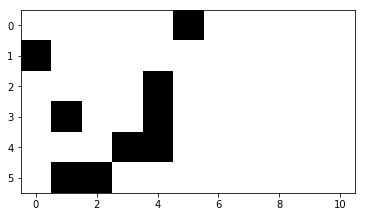

Target


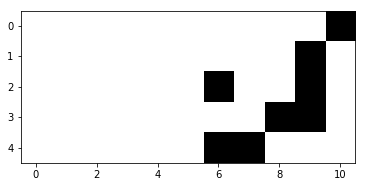

Predicted


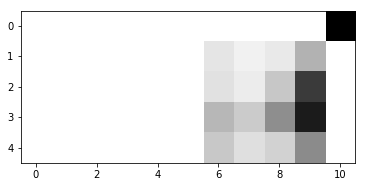

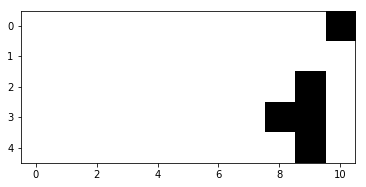

('Iteration', 9100, 'Train loss:', 0.13905761270164887)
Test loss:  0.188684228519
Input


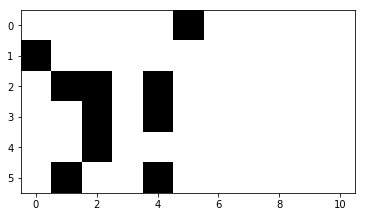

Target


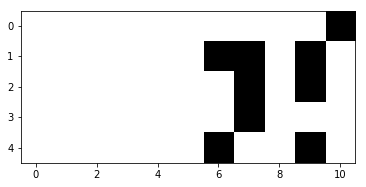

Predicted


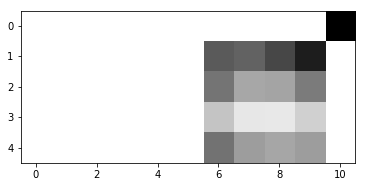

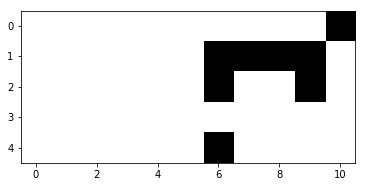

('Iteration', 9200, 'Train loss:', 0.18375486231578911)
Test loss:  0.206301649117
Input


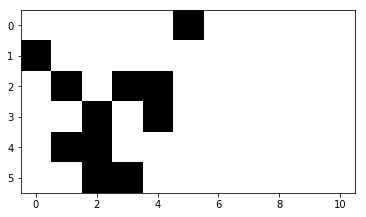

Target


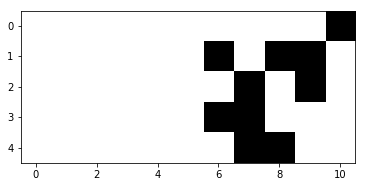

Predicted


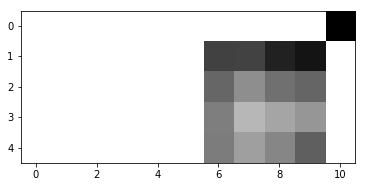

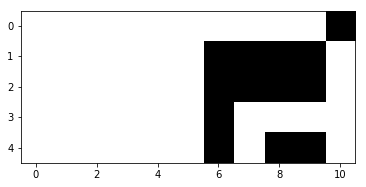

('Iteration', 9300, 'Train loss:', 0.16659628990810918)
Test loss:  0.149086638988
Input


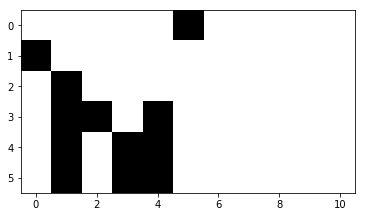

Target


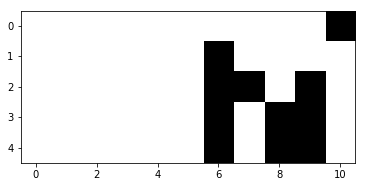

Predicted


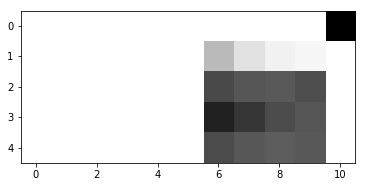

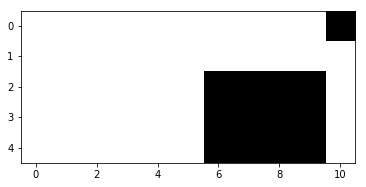

('Iteration', 9400, 'Train loss:', 0.092424259188210761)
Test loss:  0.173869835001
Input


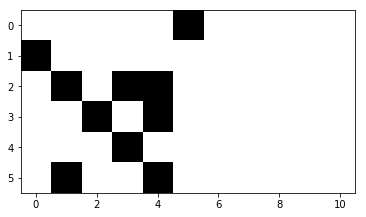

Target


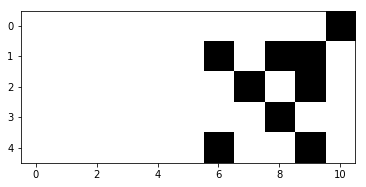

Predicted


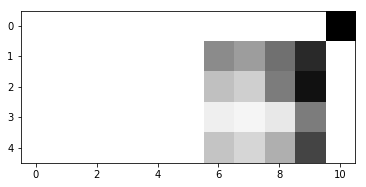

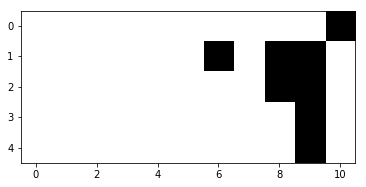

('Iteration', 9500, 'Train loss:', 0.13887070802523921)
Test loss:  0.139716546811
Input


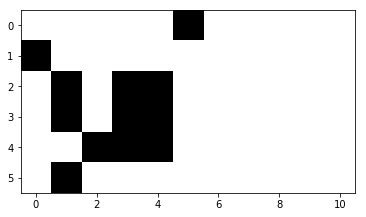

Target


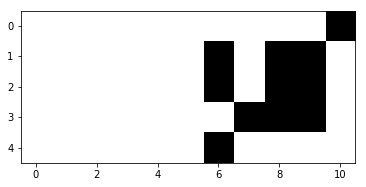

Predicted


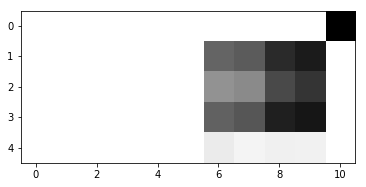

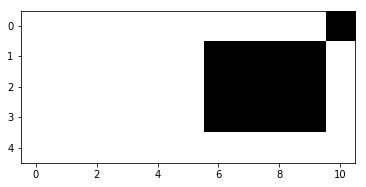

('Iteration', 9600, 'Train loss:', 0.14954356085759982)
Test loss:  0.139306352341
Input


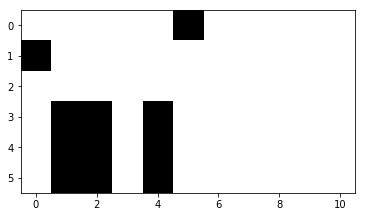

Target


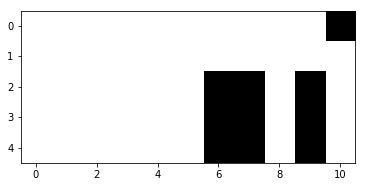

Predicted


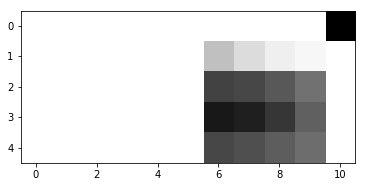

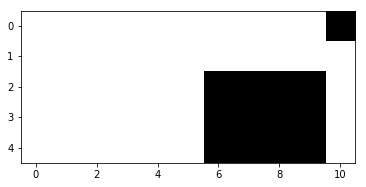

('Iteration', 9700, 'Train loss:', 0.15322520411693413)
Test loss:  0.17084686274
Input


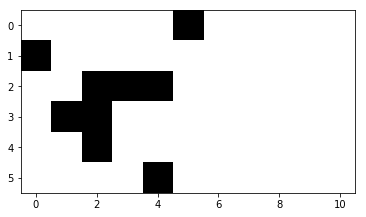

Target


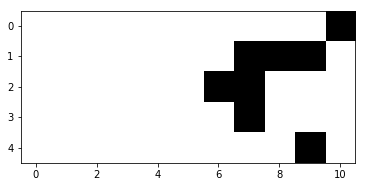

Predicted


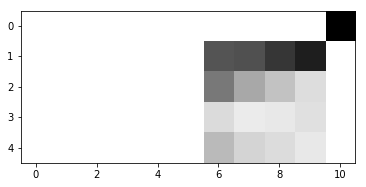

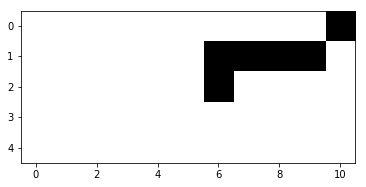

('Iteration', 9800, 'Train loss:', 0.14122319434317648)
Test loss:  0.156888350121
Input


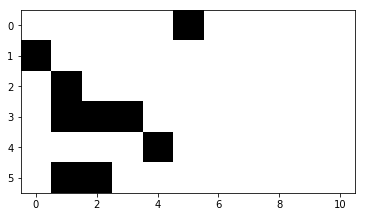

Target


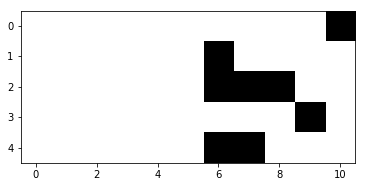

Predicted


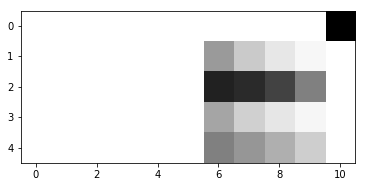

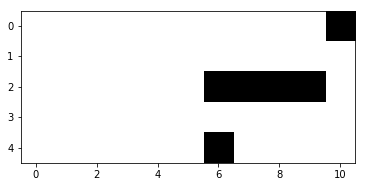

('Iteration', 9900, 'Train loss:', 0.10488526492065287)
Test loss:  0.116809063848
Input


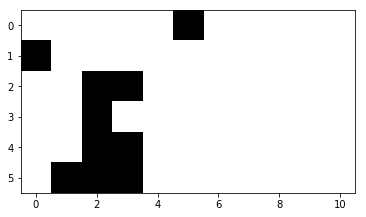

Target


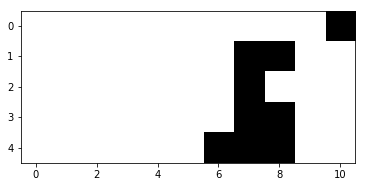

Predicted


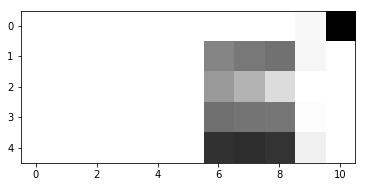

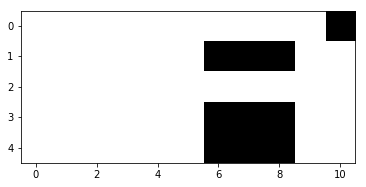

('Iteration', 10000, 'Train loss:', 0.12989651721139617)
Test loss:  0.178421387787
Input


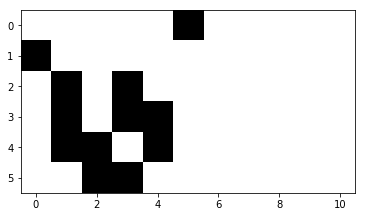

Target


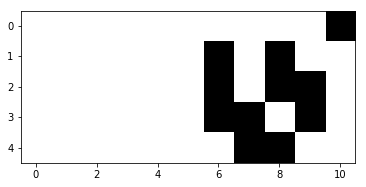

Predicted


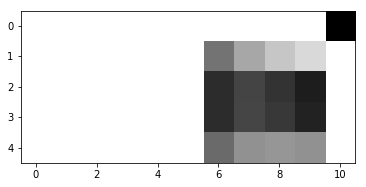

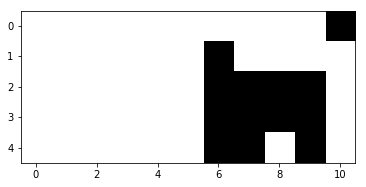

('Iteration', 10100, 'Train loss:', 0.11535706412173256)
Test loss:  0.141156916665
Input


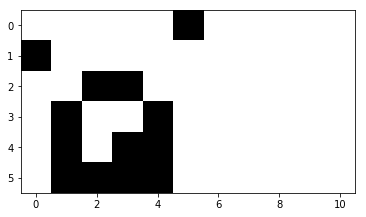

Target


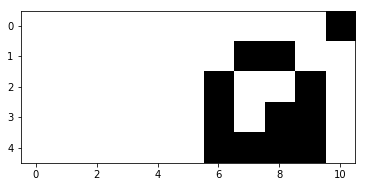

Predicted


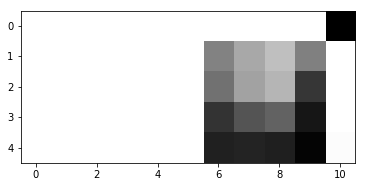

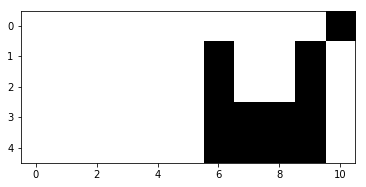

('Iteration', 10200, 'Train loss:', 0.13310265405637212)
Test loss:  0.114403284481
Input


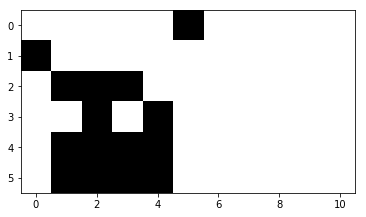

Target


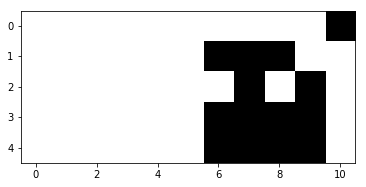

Predicted


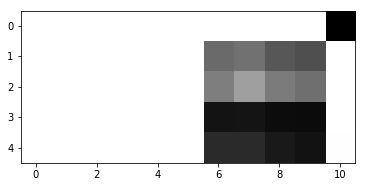

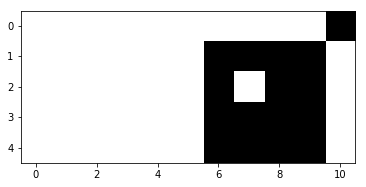

('Iteration', 10300, 'Train loss:', 0.10928052941684765)
Test loss:  0.129647961737
Input


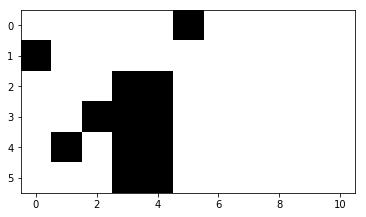

Target


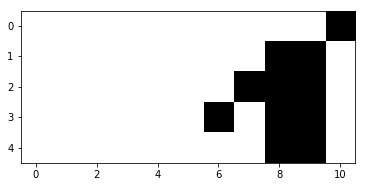

Predicted


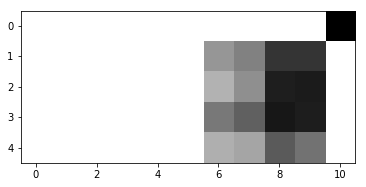

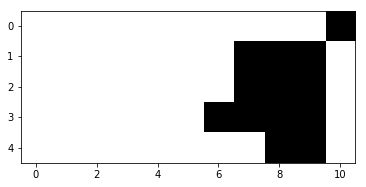

('Iteration', 10400, 'Train loss:', 0.13112872428408875)
Test loss:  0.106092970148
Input


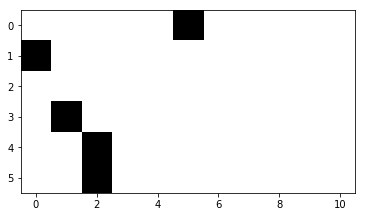

Target


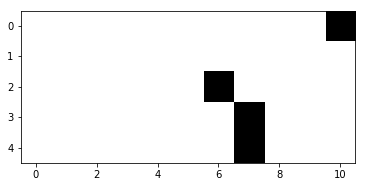

Predicted


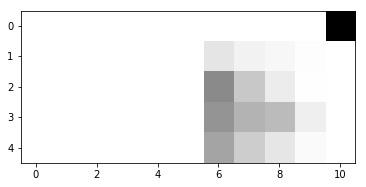

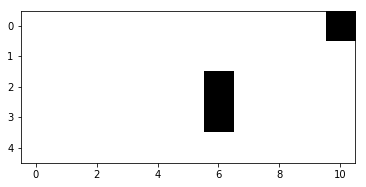

('Iteration', 10500, 'Train loss:', 0.16217881709497547)
Test loss:  0.185804697897
Input


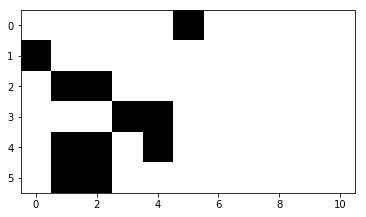

Target


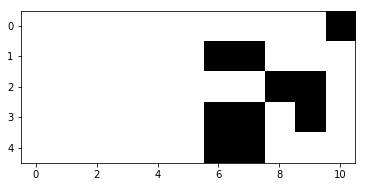

Predicted


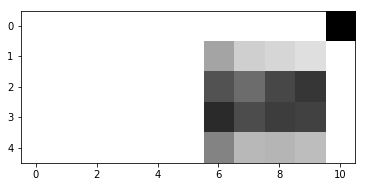

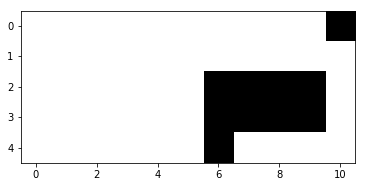

('Iteration', 10600, 'Train loss:', 0.16094617965585789)
Test loss:  0.12504431647
Input


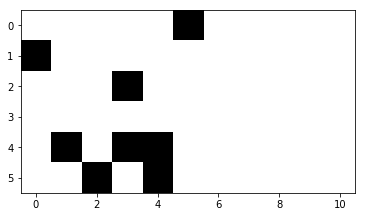

Target


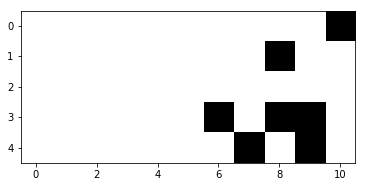

Predicted


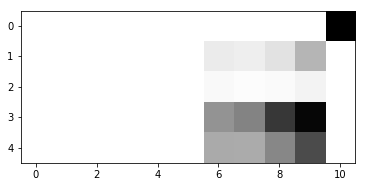

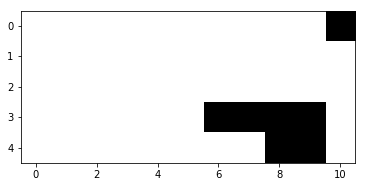

('Iteration', 10700, 'Train loss:', 0.077845344312492418)
Test loss:  0.175530112598
Input


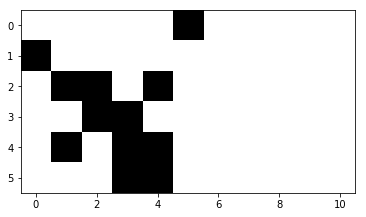

Target


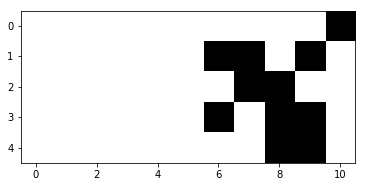

Predicted


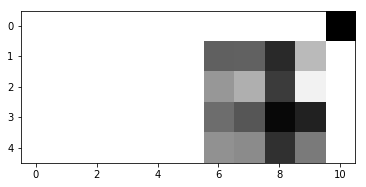

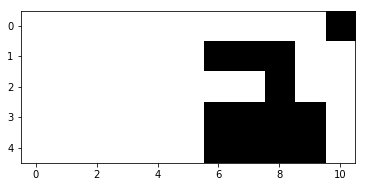

('Iteration', 10800, 'Train loss:', 0.1283784397385867)
Test loss:  0.148228940922
Input


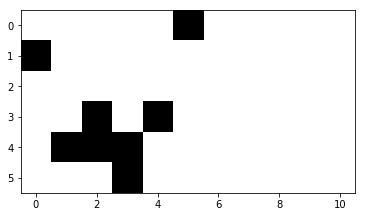

Target


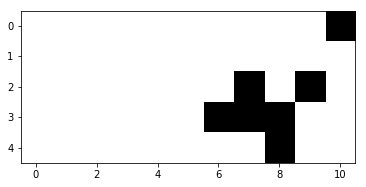

Predicted


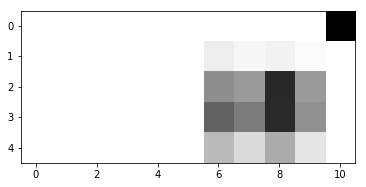

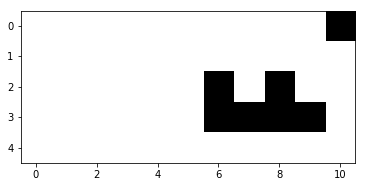

('Iteration', 10900, 'Train loss:', 0.1827944160369317)
Test loss:  0.0851732534442
Input


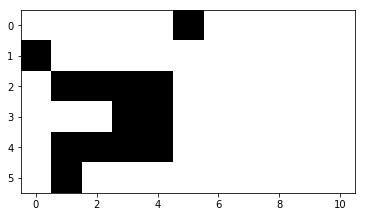

Target


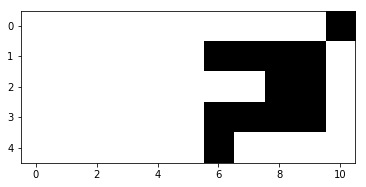

Predicted


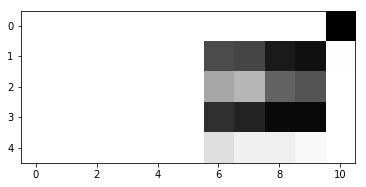

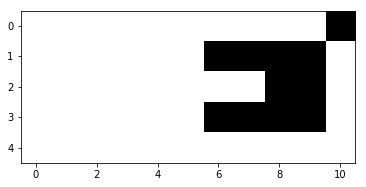

('Iteration', 11000, 'Train loss:', 0.14847645785929978)
Test loss:  0.132545251008
Input


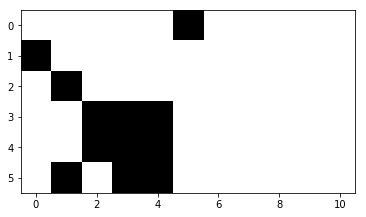

Target


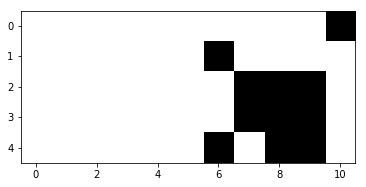

Predicted


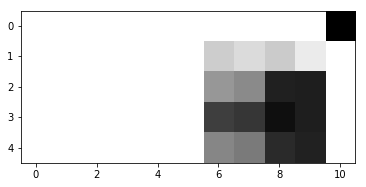

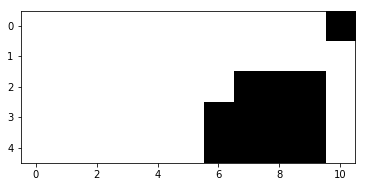

('Iteration', 11100, 'Train loss:', 0.079432381331652466)
Test loss:  0.115076990066
Input


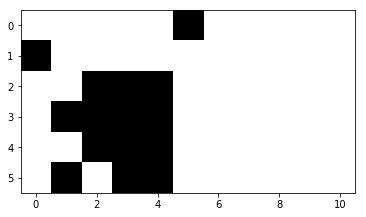

Target


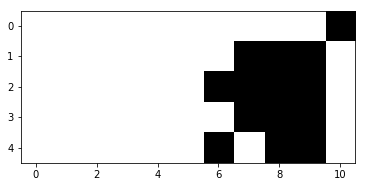

Predicted


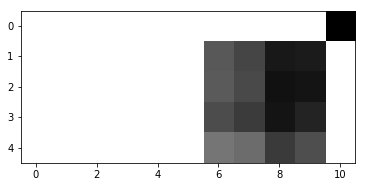

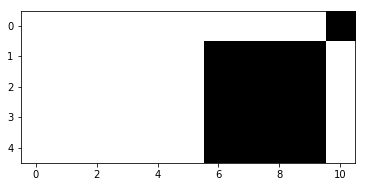

('Iteration', 11200, 'Train loss:', 0.15946908274377181)
Test loss:  0.117030043636
Input


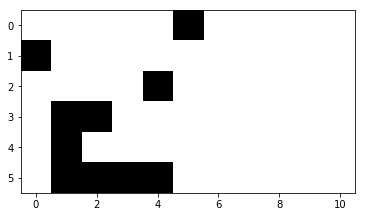

Target


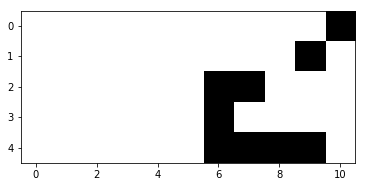

Predicted


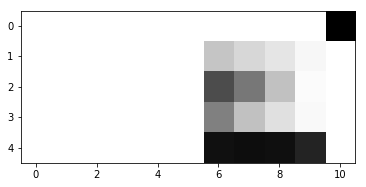

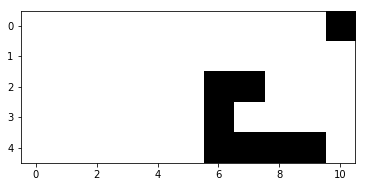

('Iteration', 11300, 'Train loss:', 0.14202754855930072)
Test loss:  0.151791665861
Input


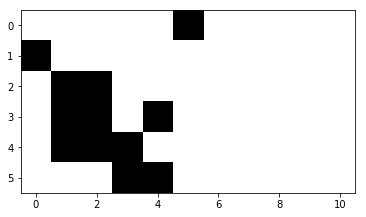

Target


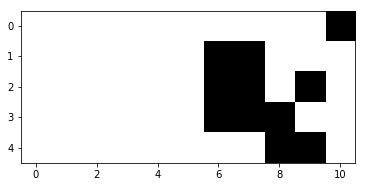

Predicted


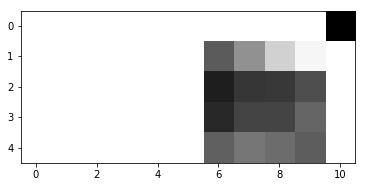

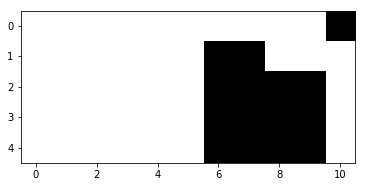

('Iteration', 11400, 'Train loss:', 0.21429910678791692)
Test loss:  0.133240698654
Input


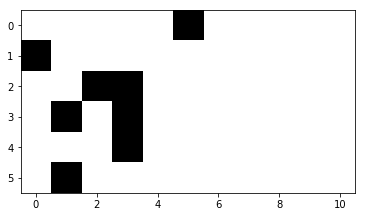

Target


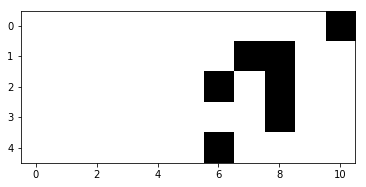

Predicted


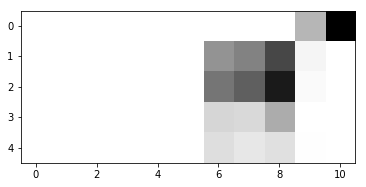

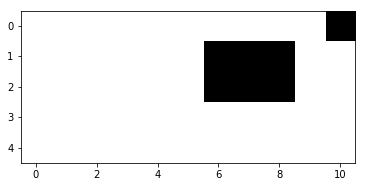

('Iteration', 11500, 'Train loss:', 0.079515321127562308)
Test loss:  0.112154376315
Input


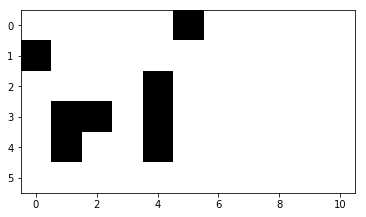

Target


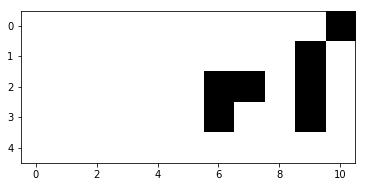

Predicted


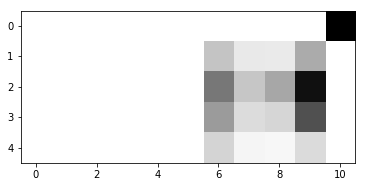

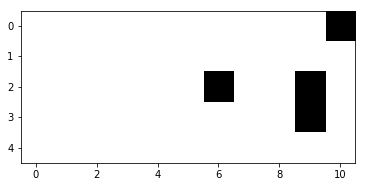

('Iteration', 11600, 'Train loss:', 0.13337819568013451)
Test loss:  0.181951242801
Input


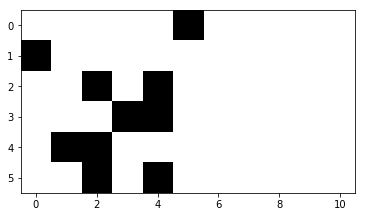

Target


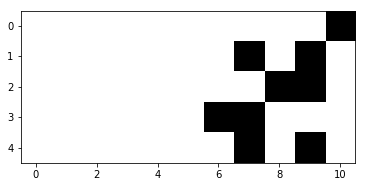

Predicted


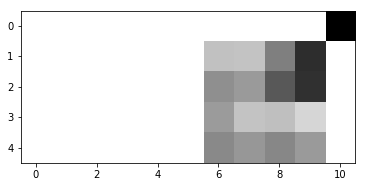

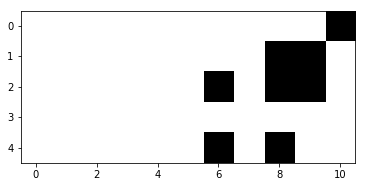

('Iteration', 11700, 'Train loss:', 0.15804060853142102)
Test loss:  0.178481596338
Input


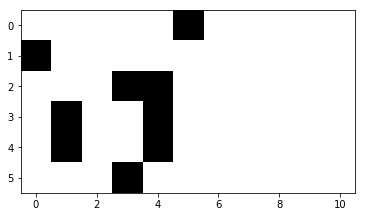

Target


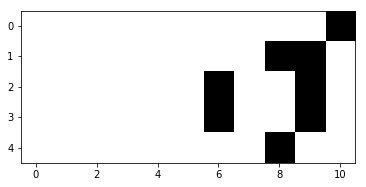

Predicted


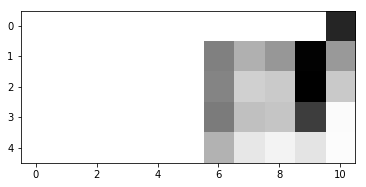

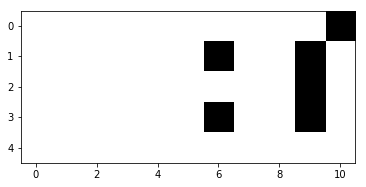

('Iteration', 11800, 'Train loss:', 0.1113785621027446)
Test loss:  0.127488314275
Input


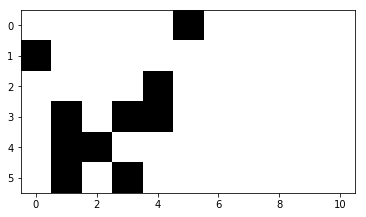

Target


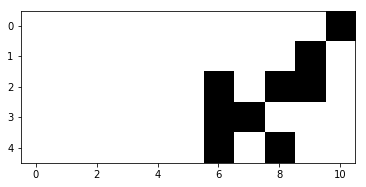

Predicted


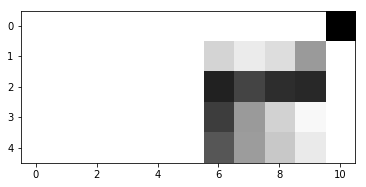

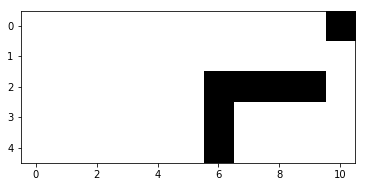

('Iteration', 11900, 'Train loss:', 0.14551629594633514)
Test loss:  0.143293311568
Input


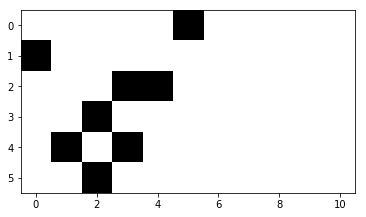

Target


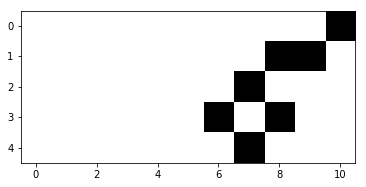

Predicted


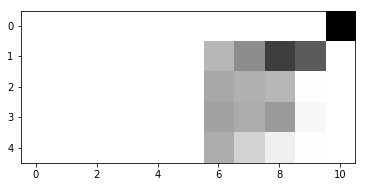

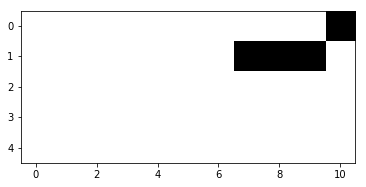

('Iteration', 12000, 'Train loss:', 0.13681772173563642)
Test loss:  0.18067318919
Input


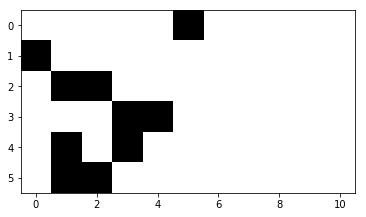

Target


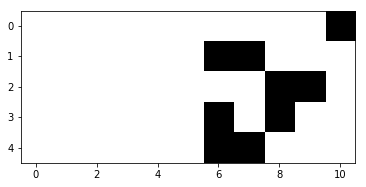

Predicted


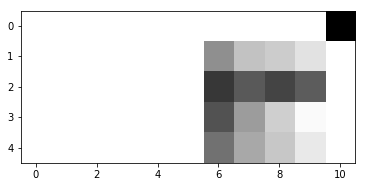

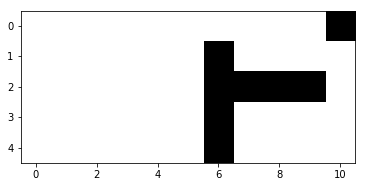

('Iteration', 12100, 'Train loss:', 0.14636544897766707)
Test loss:  0.067920926497
Input


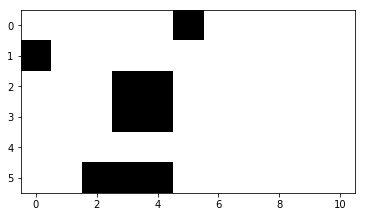

Target


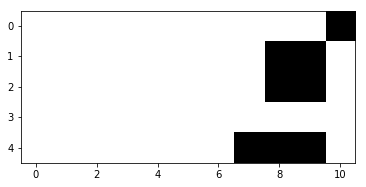

Predicted


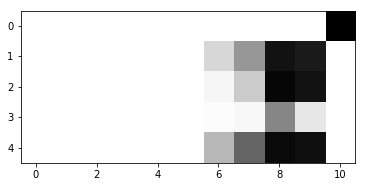

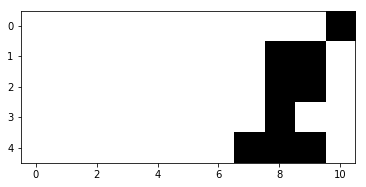

('Iteration', 12200, 'Train loss:', 0.15532683242100018)
Test loss:  0.112166309911
Input


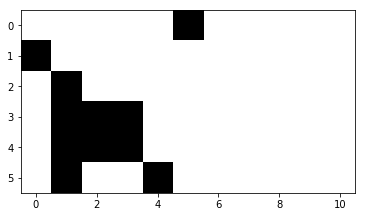

Target


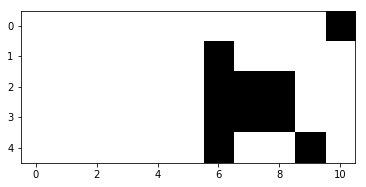

Predicted


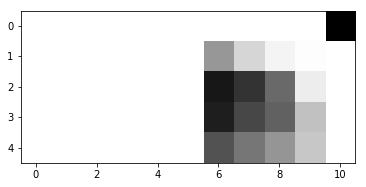

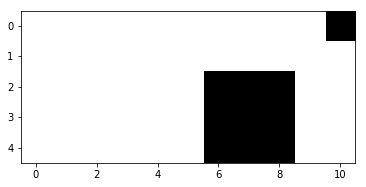

('Iteration', 12300, 'Train loss:', 0.11185084669022646)
Test loss:  0.121047231587
Input


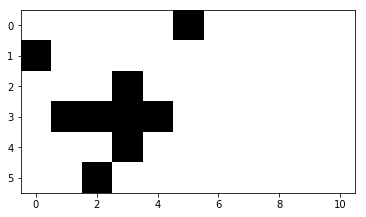

Target


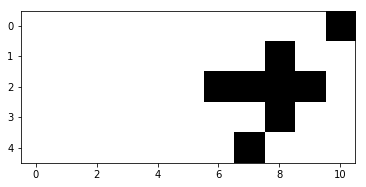

Predicted


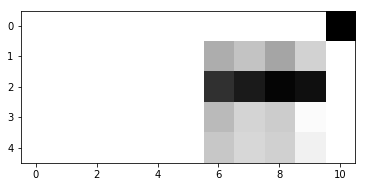

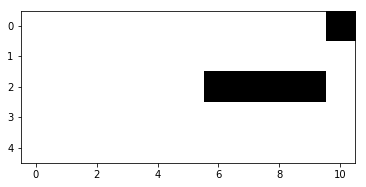

('Iteration', 12400, 'Train loss:', 0.12277176324985978)
Test loss:  0.155463562466
Input


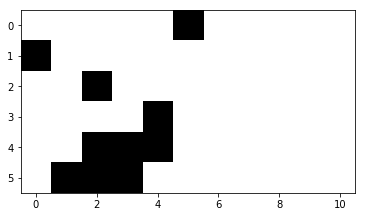

Target


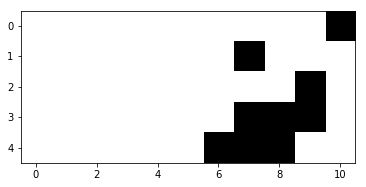

Predicted


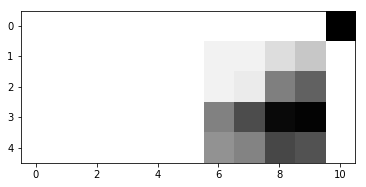

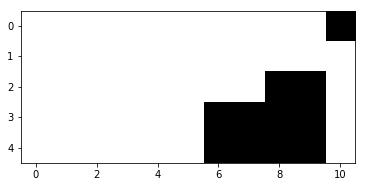

('Iteration', 12500, 'Train loss:', 0.12482962699722745)
Test loss:  0.129938010678
Input


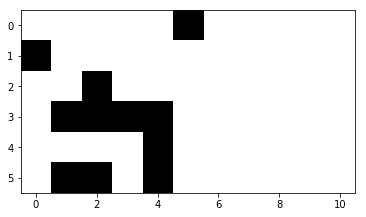

Target


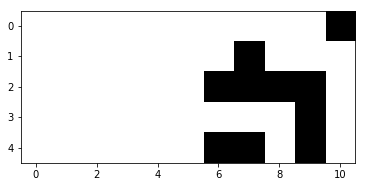

Predicted


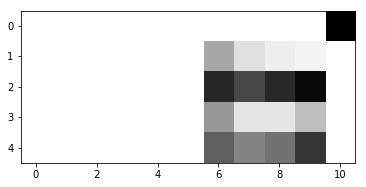

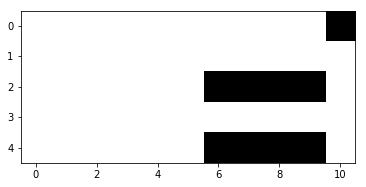

('Iteration', 12600, 'Train loss:', 0.14190335714989669)
Test loss:  0.167582240581
Input


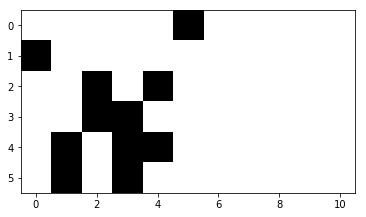

Target


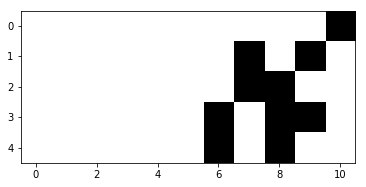

Predicted


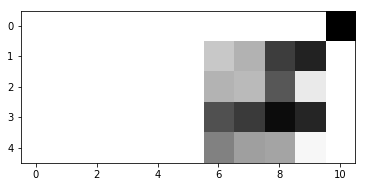

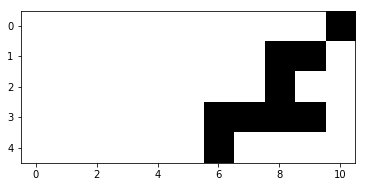

('Iteration', 12700, 'Train loss:', 0.14865778441274463)
Test loss:  0.161248022752
Input


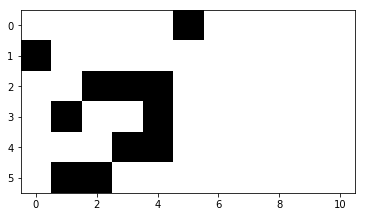

Target


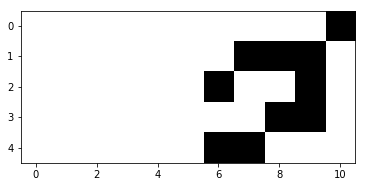

Predicted


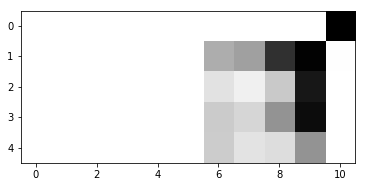

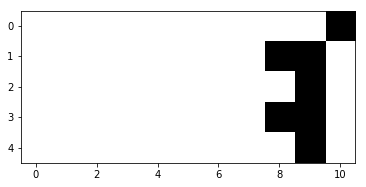

('Iteration', 12800, 'Train loss:', 0.13216501706306605)
Test loss:  0.150842384892
Input


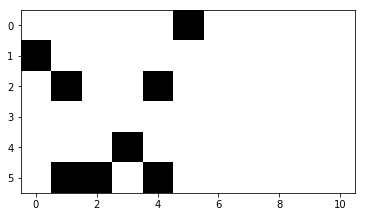

Target


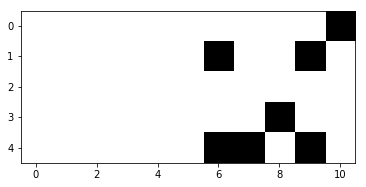

Predicted


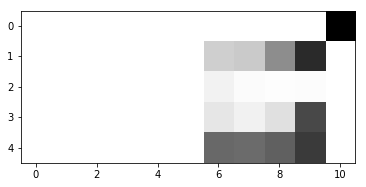

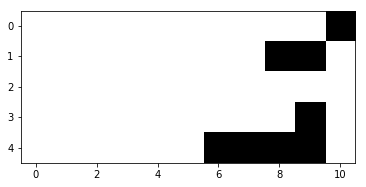

('Iteration', 12900, 'Train loss:', 0.12898062631335974)
Test loss:  0.139194503791
Input


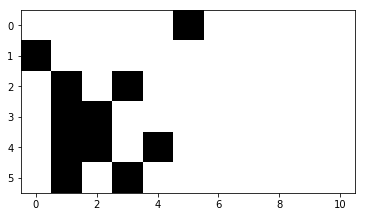

Target


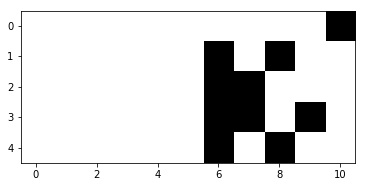

Predicted


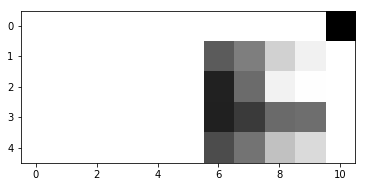

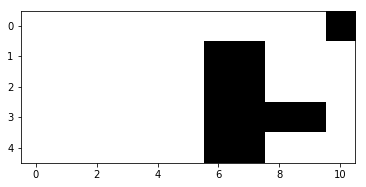

('Iteration', 13000, 'Train loss:', 0.16663262357233061)
Test loss:  0.0683512703102
Input


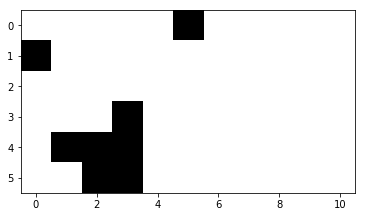

Target


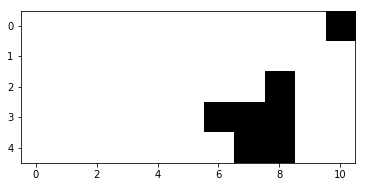

Predicted


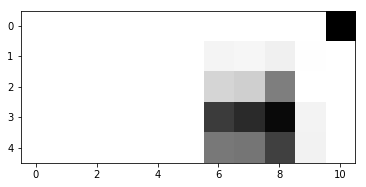

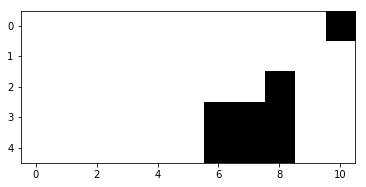

('Iteration', 13100, 'Train loss:', 0.14771332593885012)
Test loss:  0.0770599013409
Input


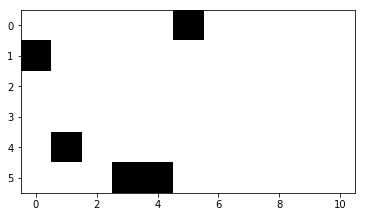

Target


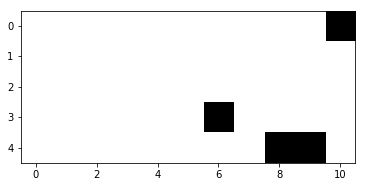

Predicted


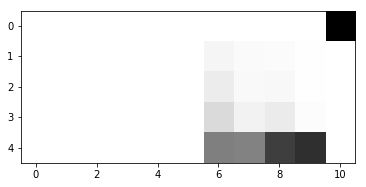

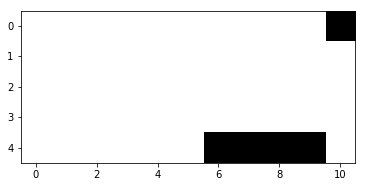

('Iteration', 13200, 'Train loss:', 0.12496802547246615)
Test loss:  0.152933169983
Input


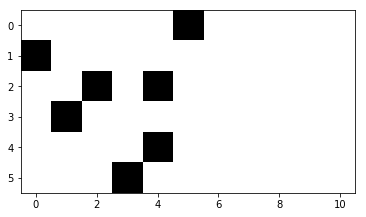

Target


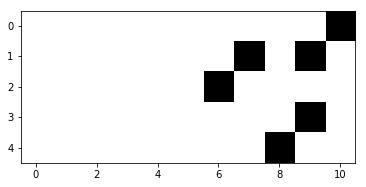

Predicted


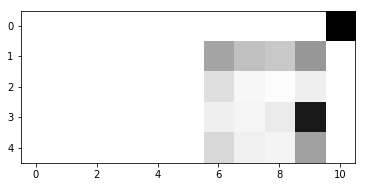

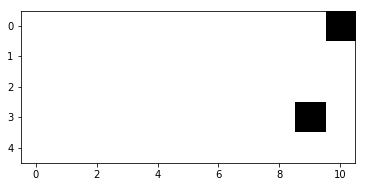

('Iteration', 13300, 'Train loss:', 0.11063433597754321)
Test loss:  0.124106005969
Input


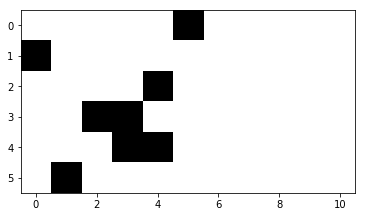

Target


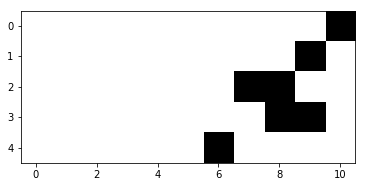

Predicted


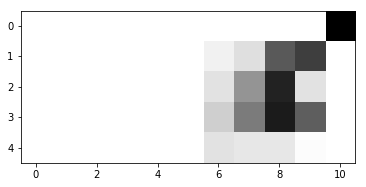

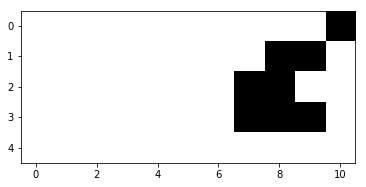

('Iteration', 13400, 'Train loss:', 0.10007908020943215)
Test loss:  0.154465367055
Input


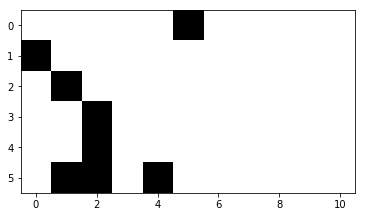

Target


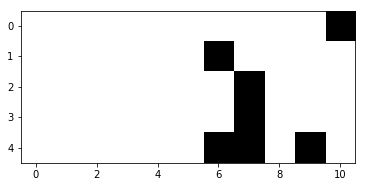

Predicted


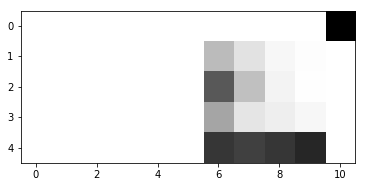

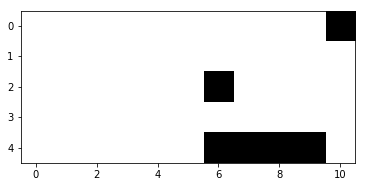

('Iteration', 13500, 'Train loss:', 0.13968661761518888)
Test loss:  0.109142522274
Input


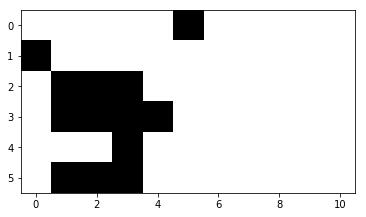

Target


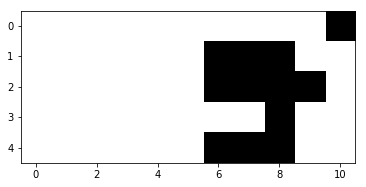

Predicted


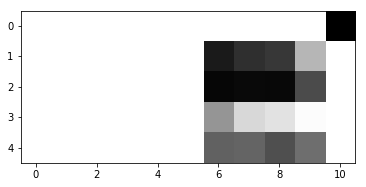

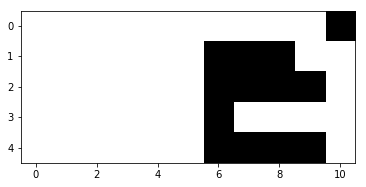

('Iteration', 13600, 'Train loss:', 0.12764717014052207)
Test loss:  0.0613680911327
Input


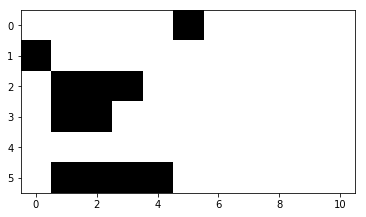

Target


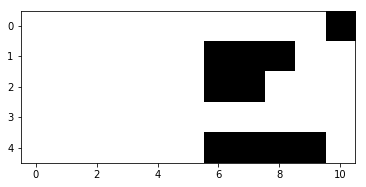

Predicted


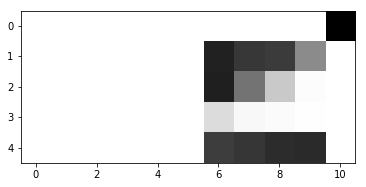

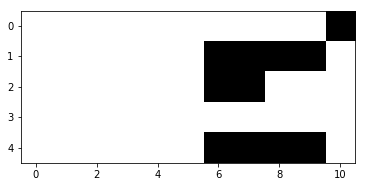

('Iteration', 13700, 'Train loss:', 0.1440232523481989)
Test loss:  0.132931044885
Input


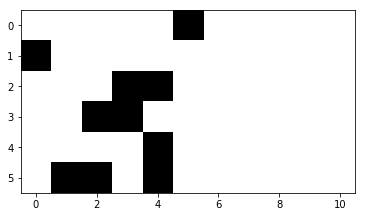

Target


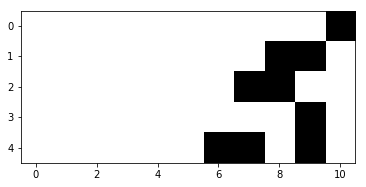

Predicted


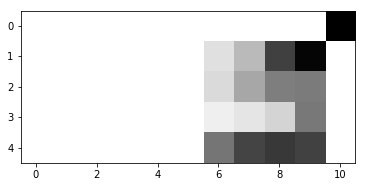

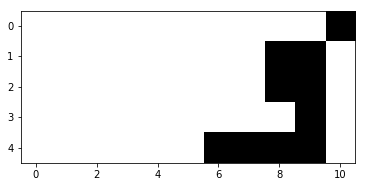

('Iteration', 13800, 'Train loss:', 0.14241411452526703)
Test loss:  0.172384476761
Input


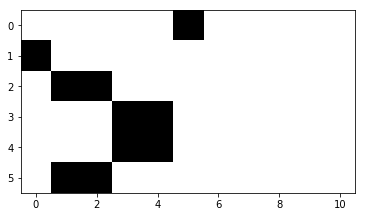

Target


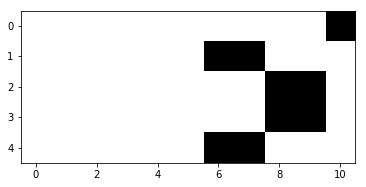

Predicted


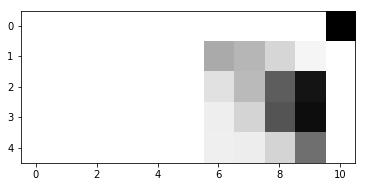

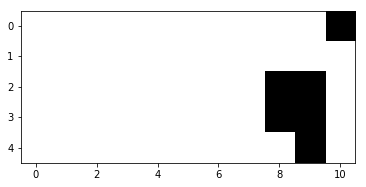

('Iteration', 13900, 'Train loss:', 0.094006641694210441)
Test loss:  0.171182685035
Input


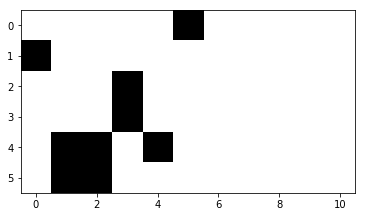

Target


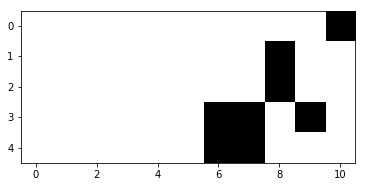

Predicted


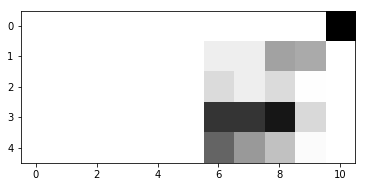

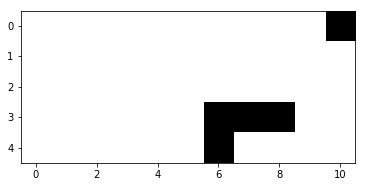

('Iteration', 14000, 'Train loss:', 0.12077592220015428)
Test loss:  0.118834736994
Input


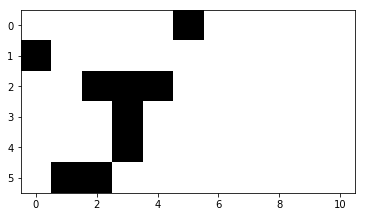

Target


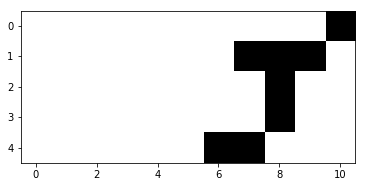

Predicted


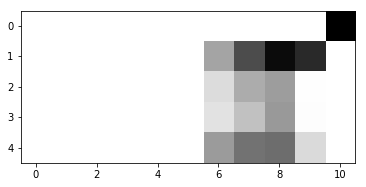

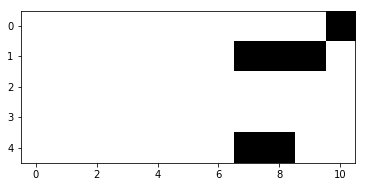

('Iteration', 14100, 'Train loss:', 0.086622577516224514)
Test loss:  0.182359256949
Input


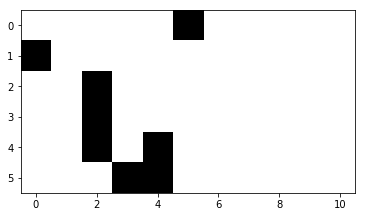

Target


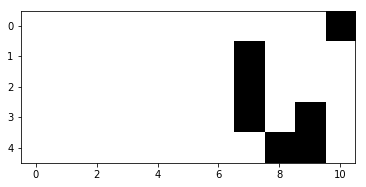

Predicted


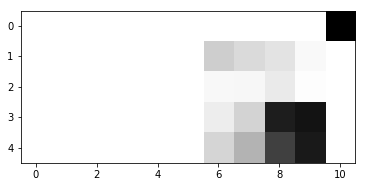

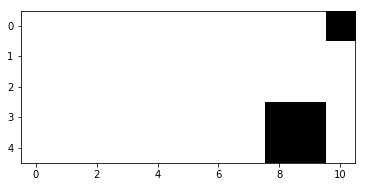

('Iteration', 14200, 'Train loss:', 0.14848908381259859)
Test loss:  0.0821805757917
Input


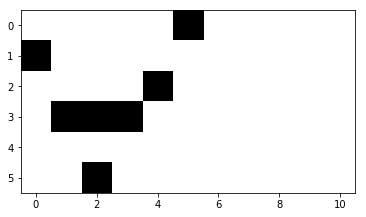

Target


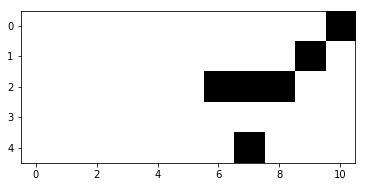

Predicted


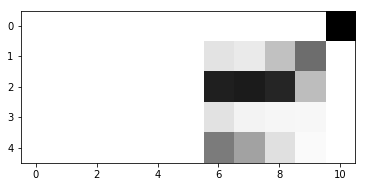

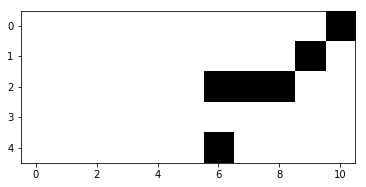

('Iteration', 14300, 'Train loss:', 0.14469182832888705)
Test loss:  0.125550766201
Input


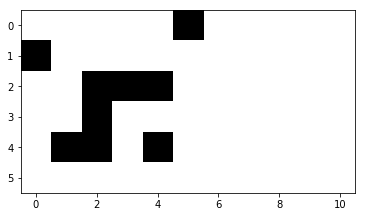

Target


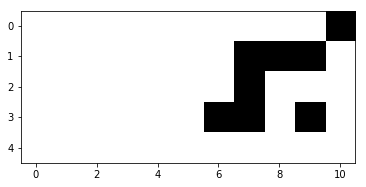

Predicted


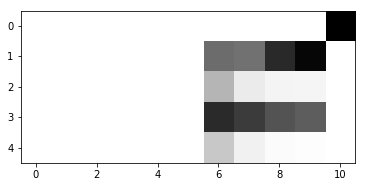

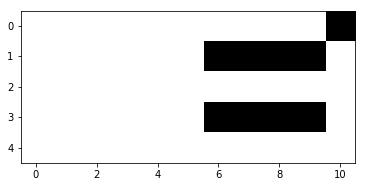

('Iteration', 14400, 'Train loss:', 0.11744924828837053)
Test loss:  0.114103557955
Input


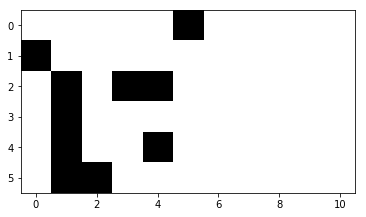

Target


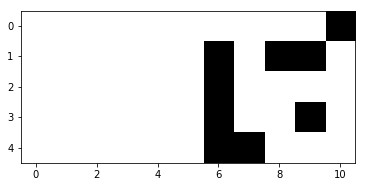

Predicted


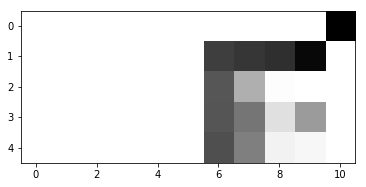

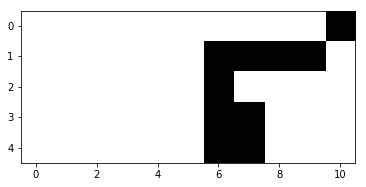

('Iteration', 14500, 'Train loss:', 0.17367178296358016)
Test loss:  0.121526641372
Input


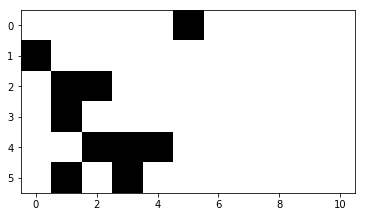

Target


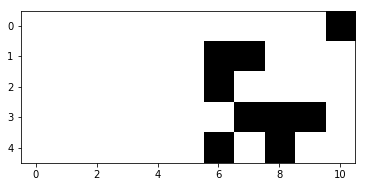

Predicted


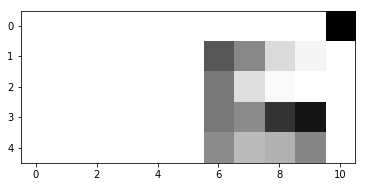

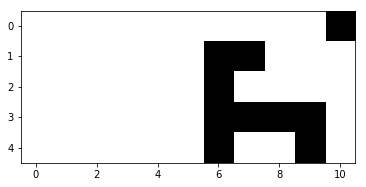

('Iteration', 14600, 'Train loss:', 0.11467583851621944)
Test loss:  0.0269118732391
Input


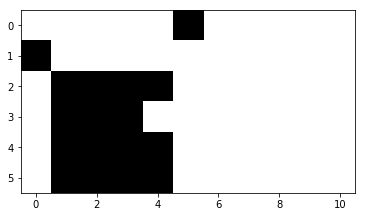

Target


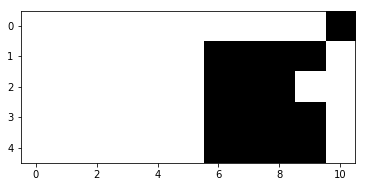

Predicted


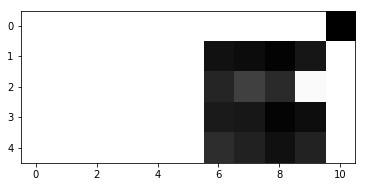

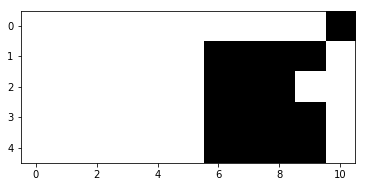

('Iteration', 14700, 'Train loss:', 0.1013795892693598)
Test loss:  0.105817763175
Input


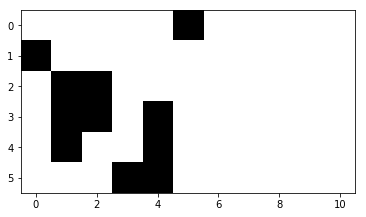

Target


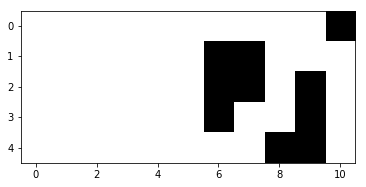

Predicted


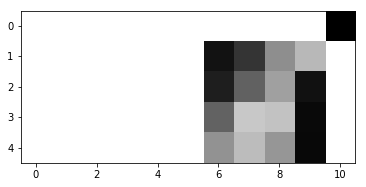

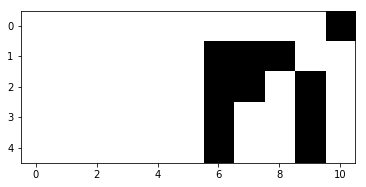

('Iteration', 14800, 'Train loss:', 0.11070934078574603)
Test loss:  0.132100679835
Input


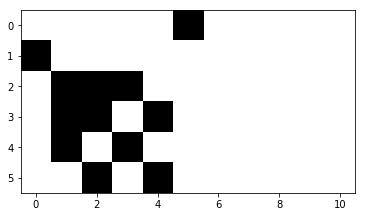

Target


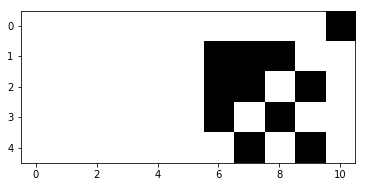

Predicted


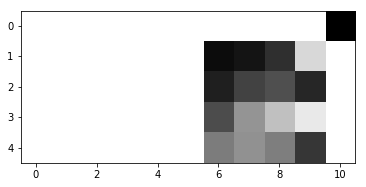

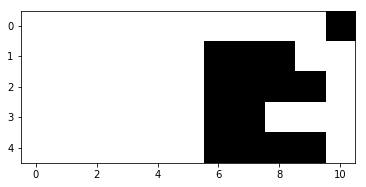

('Iteration', 14900, 'Train loss:', 0.20012749435834085)
Test loss:  0.108096898706
Input


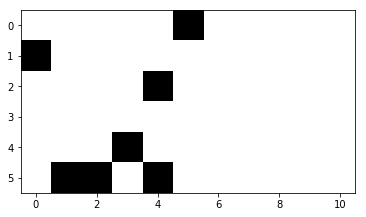

Target


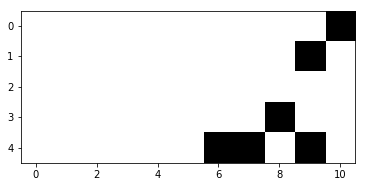

Predicted


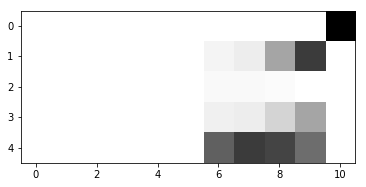

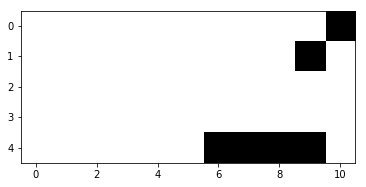

('Iteration', 15000, 'Train loss:', 0.085984261347851726)
Test loss:  0.10863685451
Input


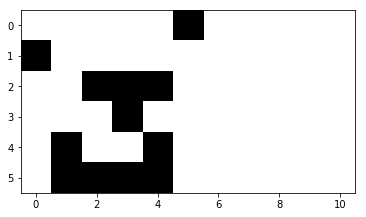

Target


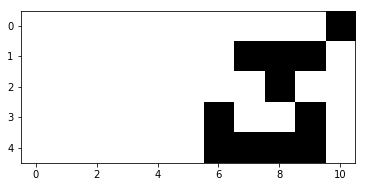

Predicted


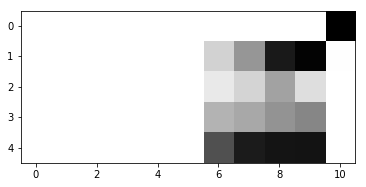

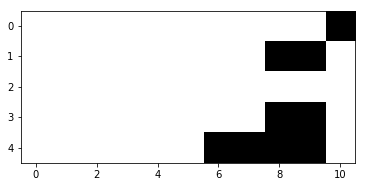

('Iteration', 15100, 'Train loss:', 0.1443487777413193)
Test loss:  0.0899416703738
Input


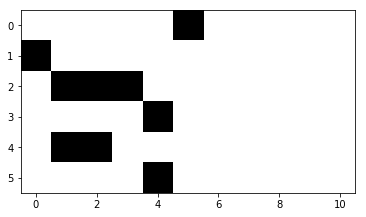

Target


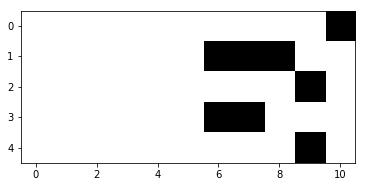

Predicted


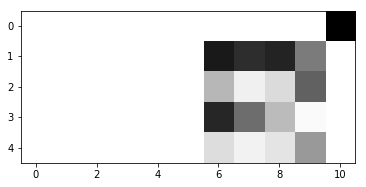

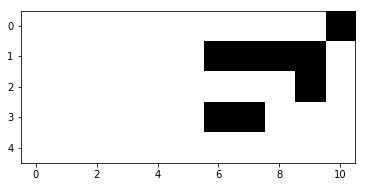

('Iteration', 15200, 'Train loss:', 0.088623982428289033)
Test loss:  0.102245276426
Input


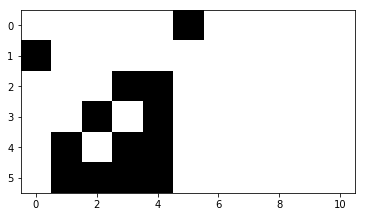

Target


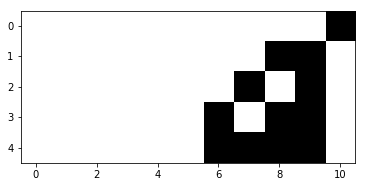

Predicted


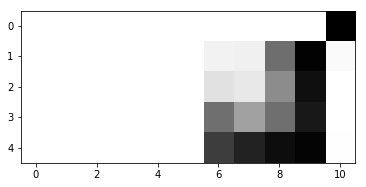

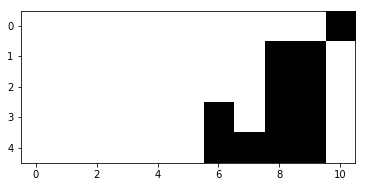

('Iteration', 15300, 'Train loss:', 0.034979176057282041)
Test loss:  0.106611726931
Input


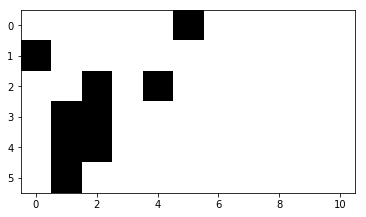

Target


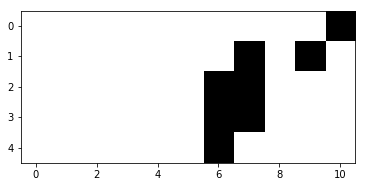

Predicted


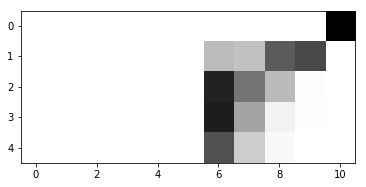

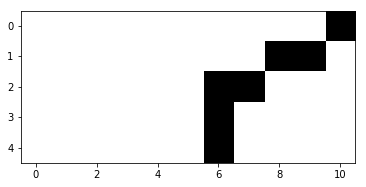

('Iteration', 15400, 'Train loss:', 0.068970439128401465)
Test loss:  0.0728799415655
Input


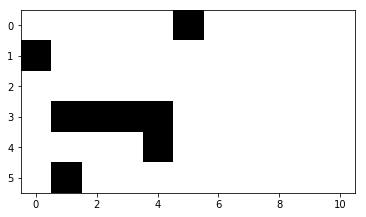

Target


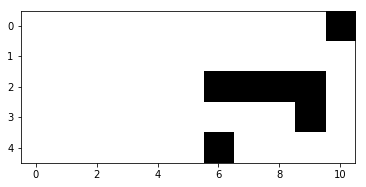

Predicted


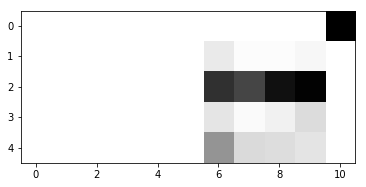

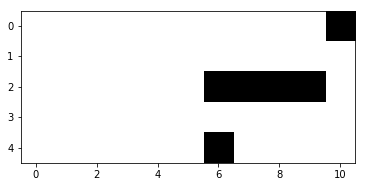

('Iteration', 15500, 'Train loss:', 0.042070277898200767)
Test loss:  0.0658811331683
Input


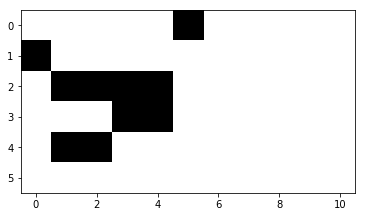

Target


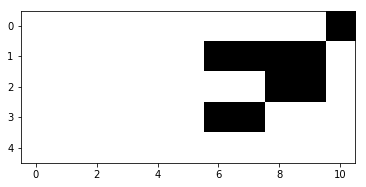

Predicted


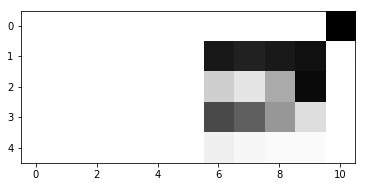

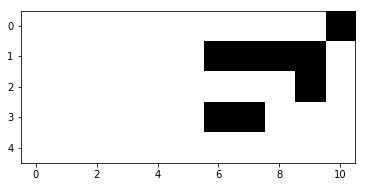

('Iteration', 15600, 'Train loss:', 0.11410726452435498)
Test loss:  0.0665417537667
Input


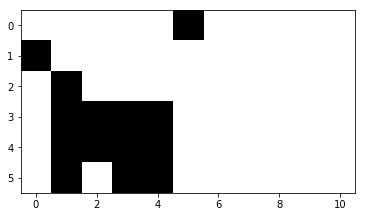

Target


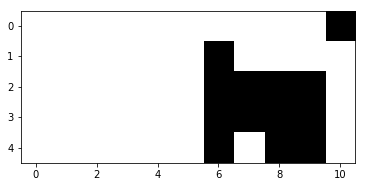

Predicted


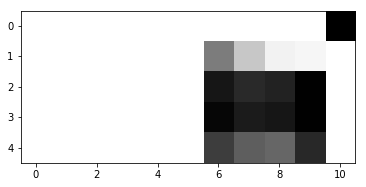

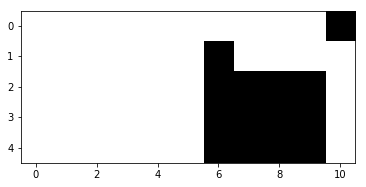

('Iteration', 15700, 'Train loss:', 0.15448138931999117)
Test loss:  0.0721172562663
Input


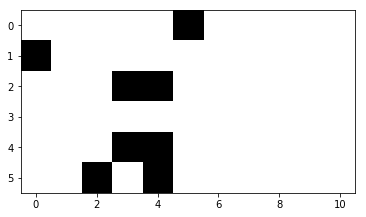

Target


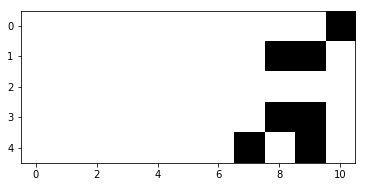

Predicted


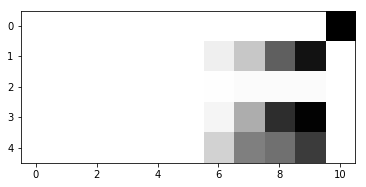

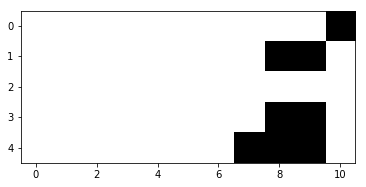

('Iteration', 15800, 'Train loss:', 0.072433219965892887)
Test loss:  0.102790309877
Input


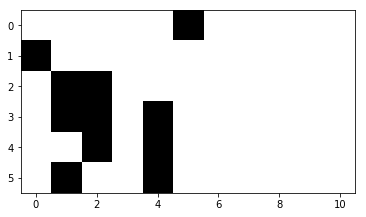

Target


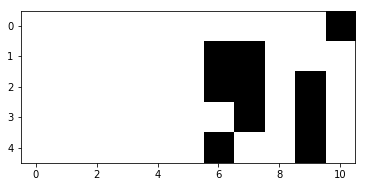

Predicted


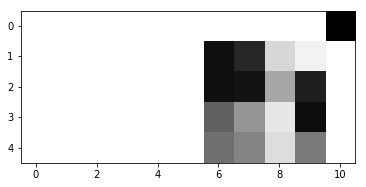

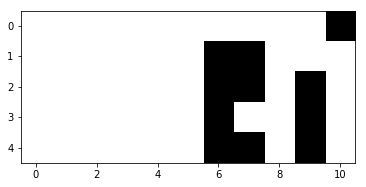

('Iteration', 15900, 'Train loss:', 0.090222826367481287)
Test loss:  0.0933797089635
Input


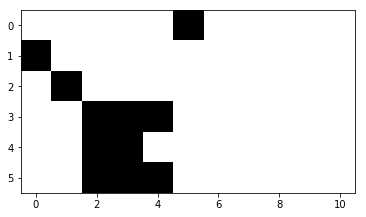

Target


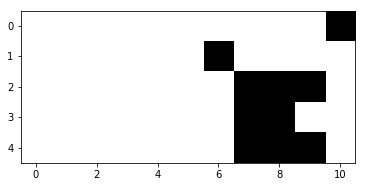

Predicted


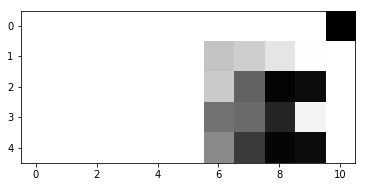

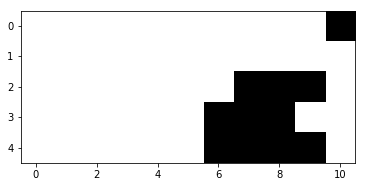

('Iteration', 16000, 'Train loss:', 0.10737016842153403)
Test loss:  0.129630435447
Input


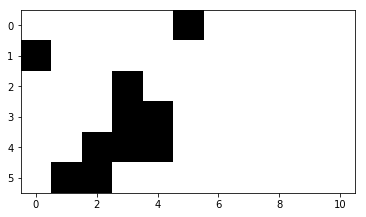

Target


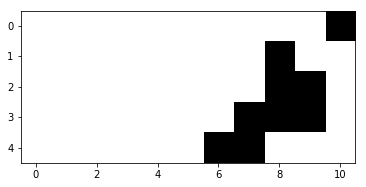

Predicted


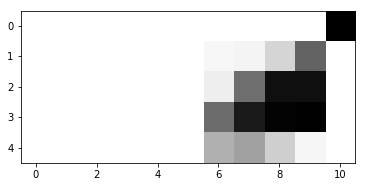

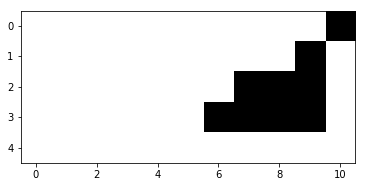

('Iteration', 16100, 'Train loss:', 0.12176293943019488)
Test loss:  0.0911585438241
Input


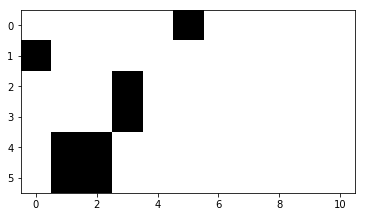

Target


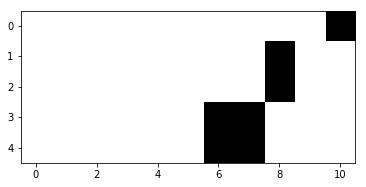

Predicted


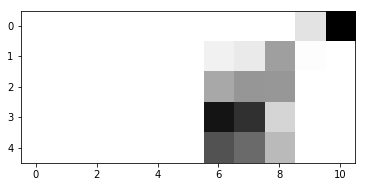

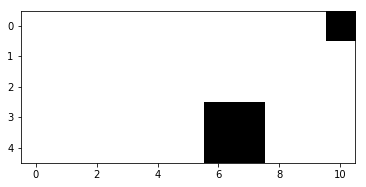

('Iteration', 16200, 'Train loss:', 0.13462515901111538)
Test loss:  0.140248864452
Input


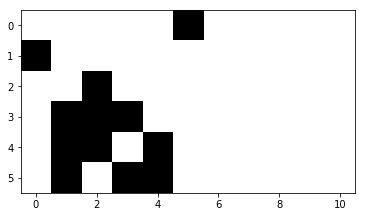

Target


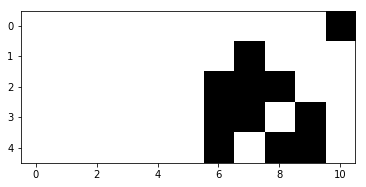

Predicted


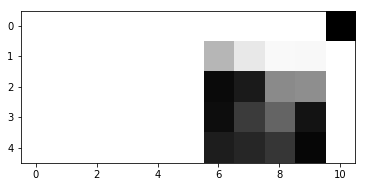

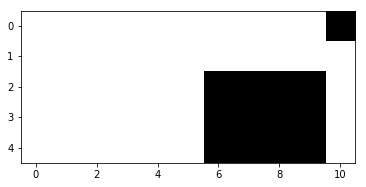

('Iteration', 16300, 'Train loss:', 0.093914290203146816)
Test loss:  0.109128636974
Input


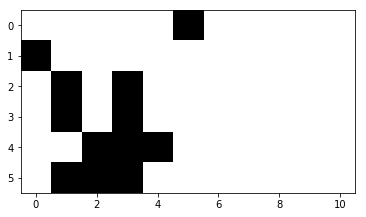

Target


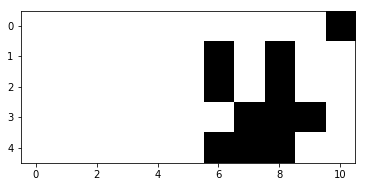

Predicted


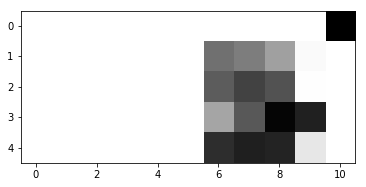

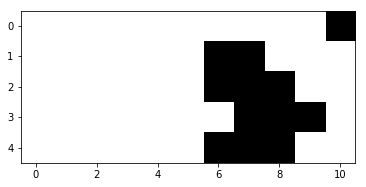

('Iteration', 16400, 'Train loss:', 0.13160950625798873)
Test loss:  0.129059511159
Input


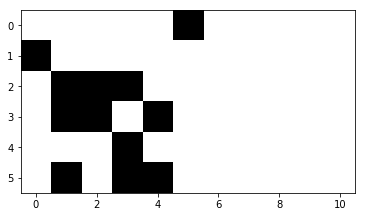

Target


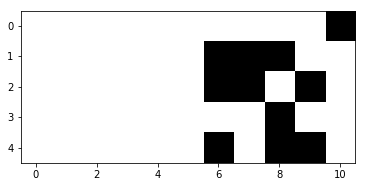

Predicted


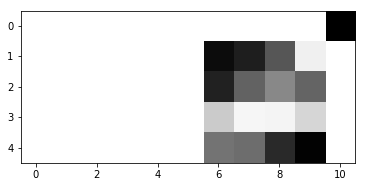

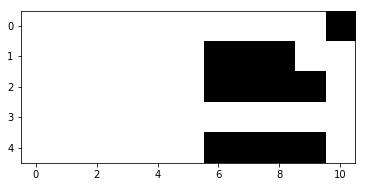

('Iteration', 16500, 'Train loss:', 0.049354086507933034)
Test loss:  0.0995245733709
Input


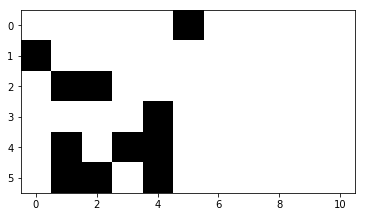

Target


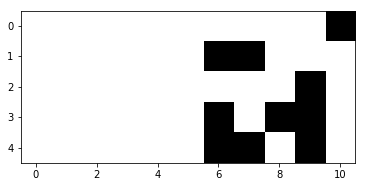

Predicted


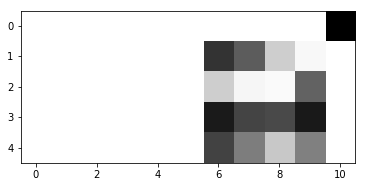

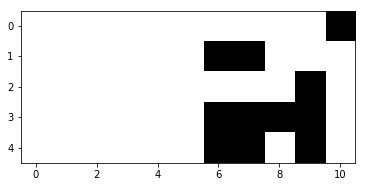

('Iteration', 16600, 'Train loss:', 0.11824434208840758)
Test loss:  0.117308800308
Input


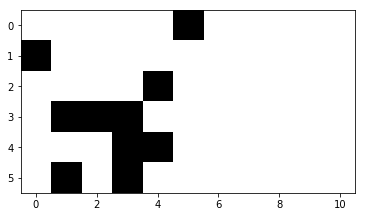

Target


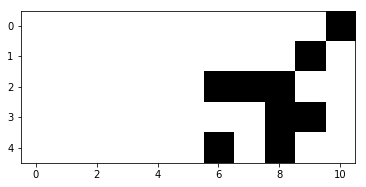

Predicted


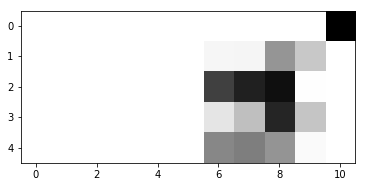

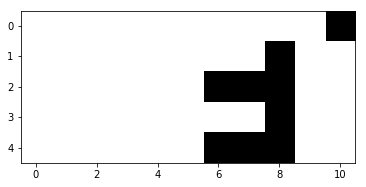

('Iteration', 16700, 'Train loss:', 0.084352138573157986)
Test loss:  0.122658852283
Input


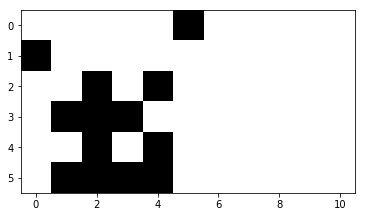

Target


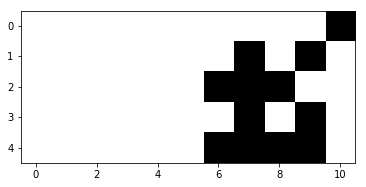

Predicted


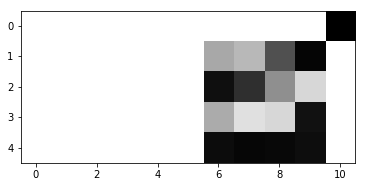

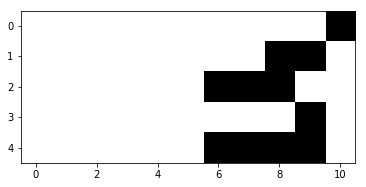

('Iteration', 16800, 'Train loss:', 0.11827764610153467)
Test loss:  0.058718571132
Input


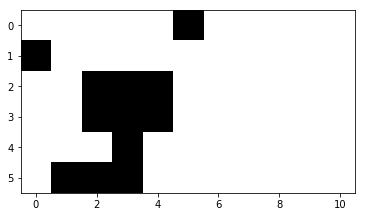

Target


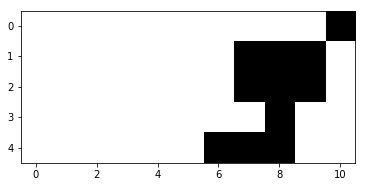

Predicted


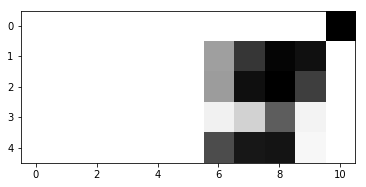

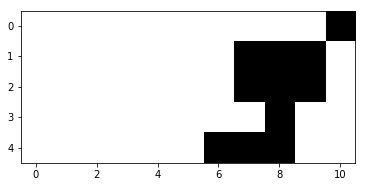

('Iteration', 16900, 'Train loss:', 0.071907408268703801)
Test loss:  0.0607172615078
Input


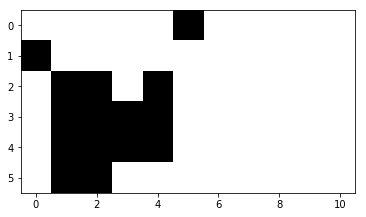

Target


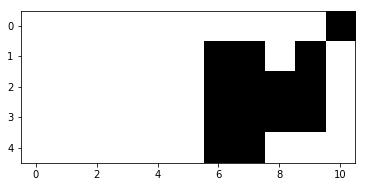

Predicted


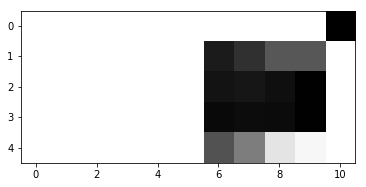

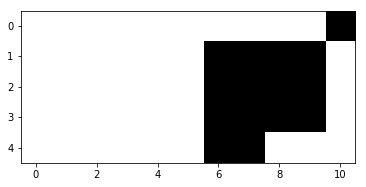

('Iteration', 17000, 'Train loss:', 0.080071656947317646)
Test loss:  0.10622597079
Input


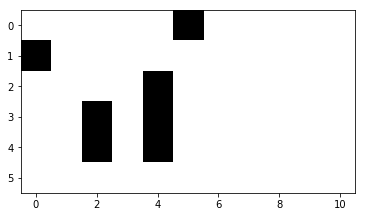

Target


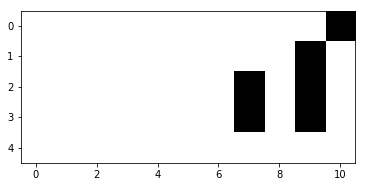

Predicted


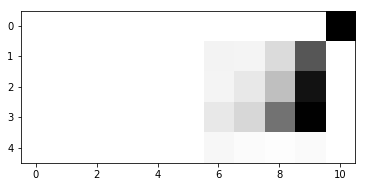

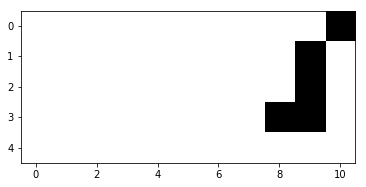

('Iteration', 17100, 'Train loss:', 0.19471897481386091)
Test loss:  0.0741307543466
Input


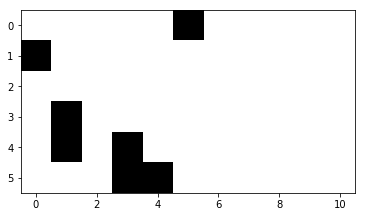

Target


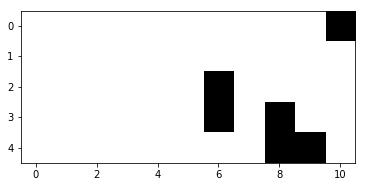

Predicted


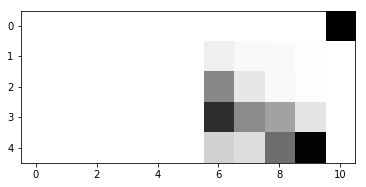

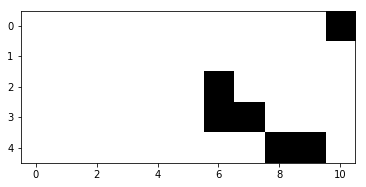

('Iteration', 17200, 'Train loss:', 0.12812335387023749)
Test loss:  0.100755514886
Input


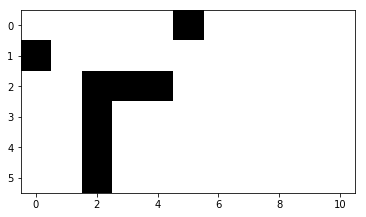

Target


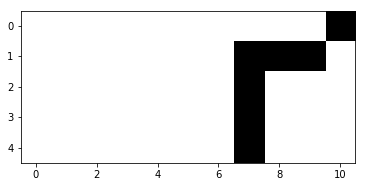

Predicted


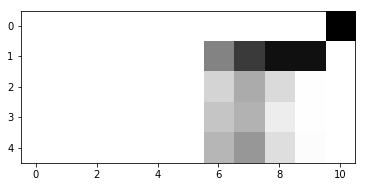

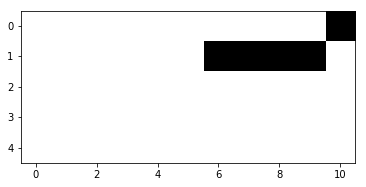

('Iteration', 17300, 'Train loss:', 0.097869567984510283)
Test loss:  0.103184470434
Input


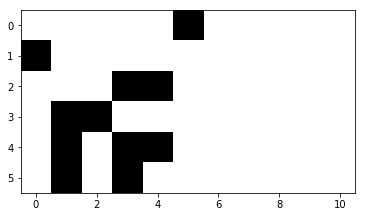

Target


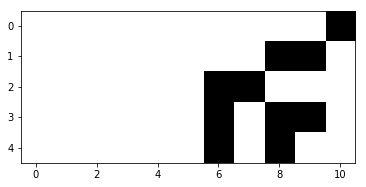

Predicted


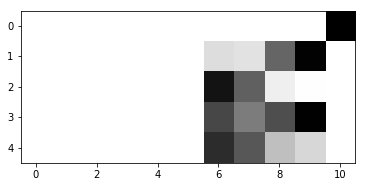

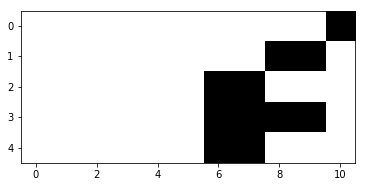

('Iteration', 17400, 'Train loss:', 0.080717509484977995)
Test loss:  0.151394471325
Input


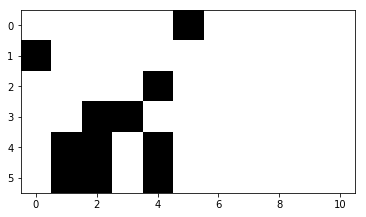

Target


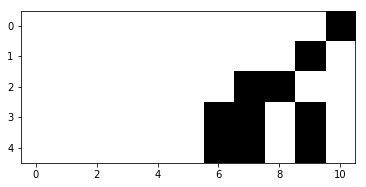

Predicted


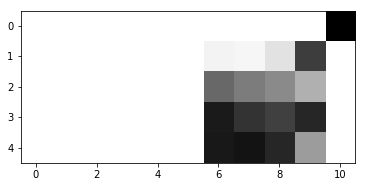

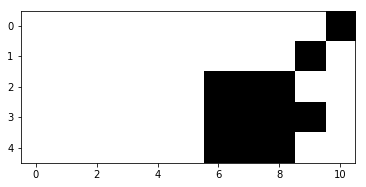

('Iteration', 17500, 'Train loss:', 0.11071856135806037)
Test loss:  0.112917856176
Input


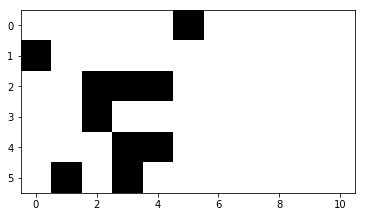

Target


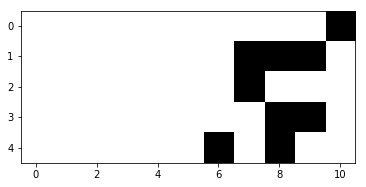

Predicted


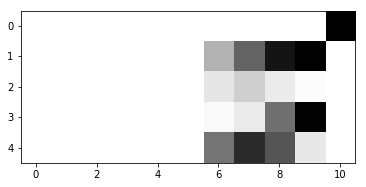

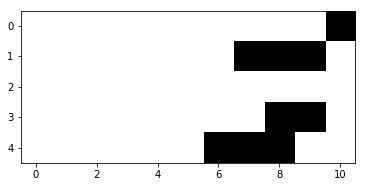

('Iteration', 17600, 'Train loss:', 0.073157979793039465)
Test loss:  0.0992420604631
Input


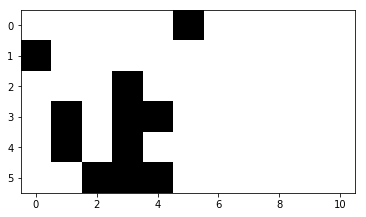

Target


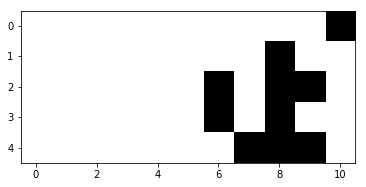

Predicted


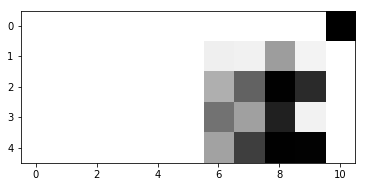

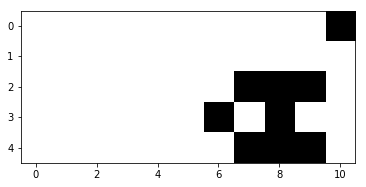

('Iteration', 17700, 'Train loss:', 0.1455336403716285)
Test loss:  0.0560576009427
Input


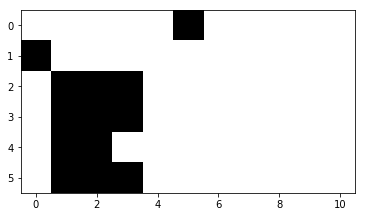

Target


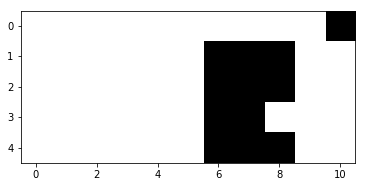

Predicted


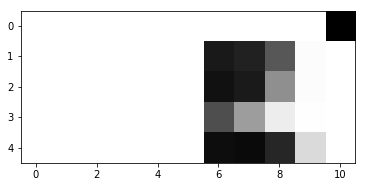

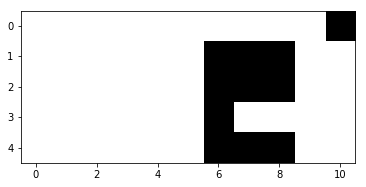

('Iteration', 17800, 'Train loss:', 0.096545243914835308)
Test loss:  0.149265337096
Input


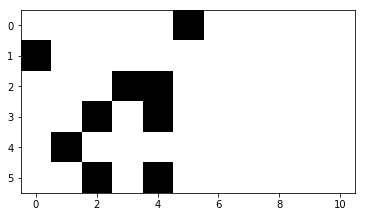

Target


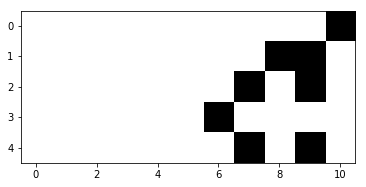

Predicted


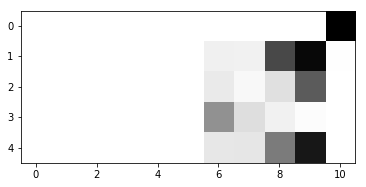

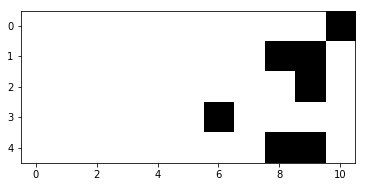

('Iteration', 17900, 'Train loss:', 0.099311856410640262)
Test loss:  0.0361164570947
Input


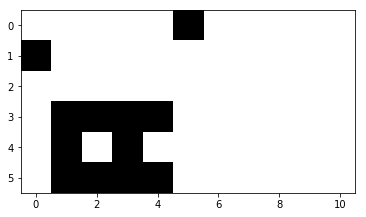

Target


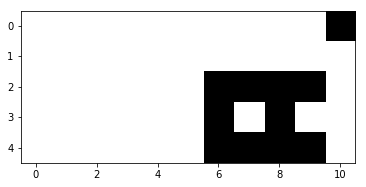

Predicted


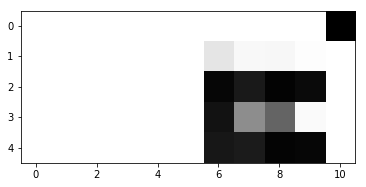

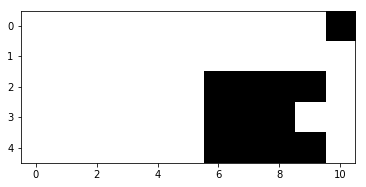

('Iteration', 18000, 'Train loss:', 0.093840500136794763)
Test loss:  0.0881805807685
Input


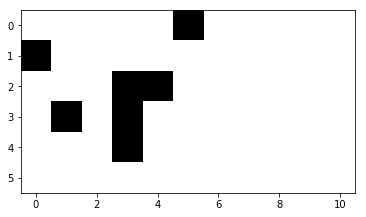

Target


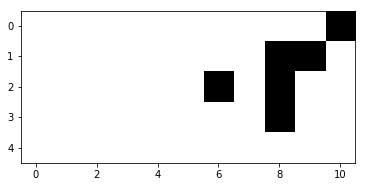

Predicted


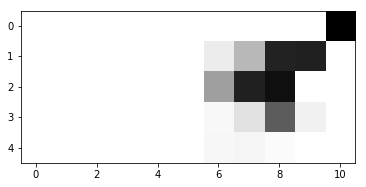

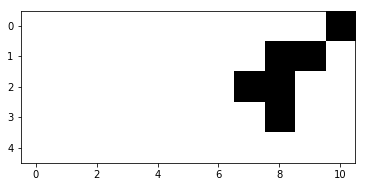

('Iteration', 18100, 'Train loss:', 0.12063628615440217)
Test loss:  0.149303943074
Input


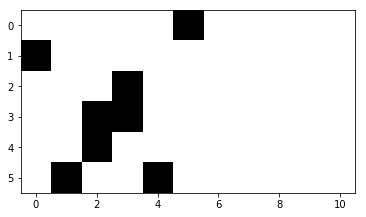

Target


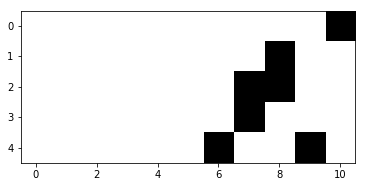

Predicted


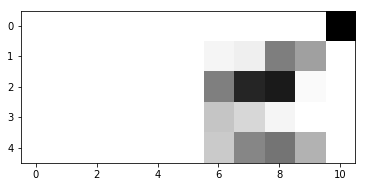

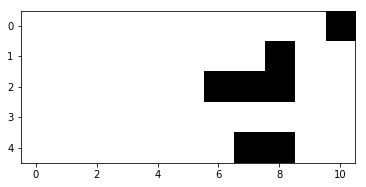

('Iteration', 18200, 'Train loss:', 0.049134087185929487)
Test loss:  0.146245194765
Input


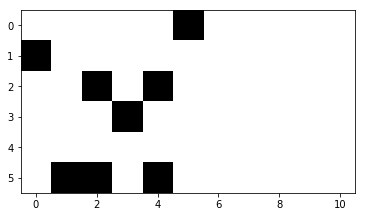

Target


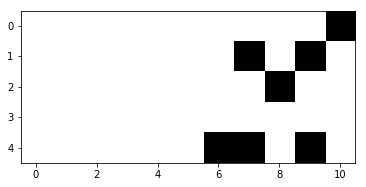

Predicted


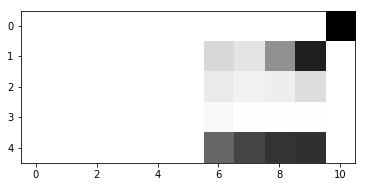

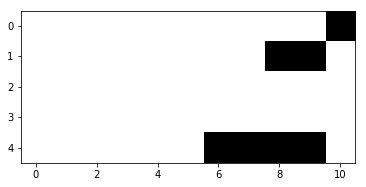

('Iteration', 18300, 'Train loss:', 0.11584079301199632)
Test loss:  0.107249836914
Input


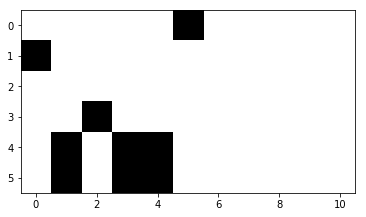

Target


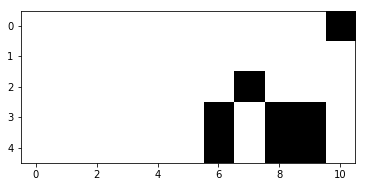

Predicted


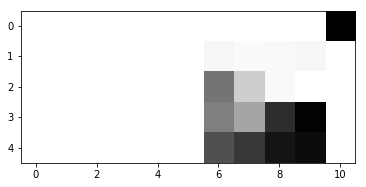

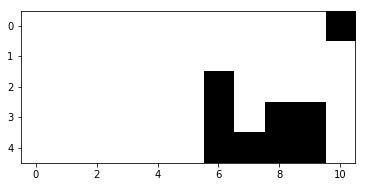

('Iteration', 18400, 'Train loss:', 0.067261141826396711)
Test loss:  0.125498667321
Input


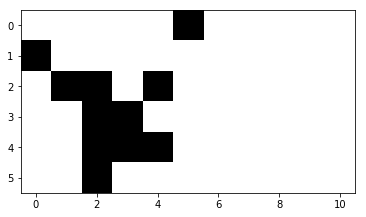

Target


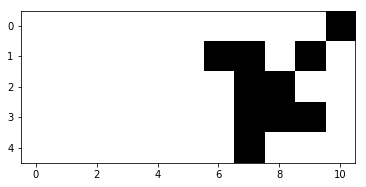

Predicted


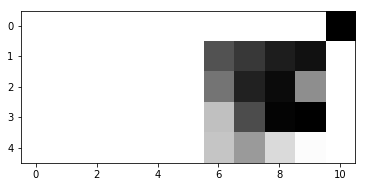

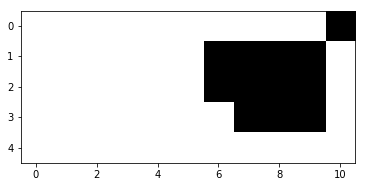

('Iteration', 18500, 'Train loss:', 0.12883911785871677)
Test loss:  0.0737228076441
Input


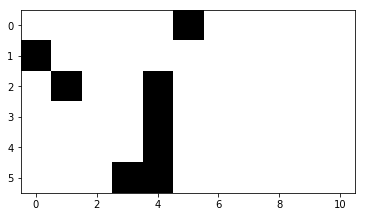

Target


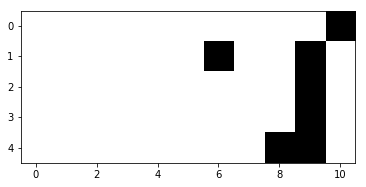

Predicted


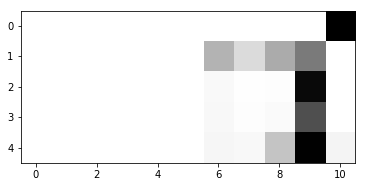

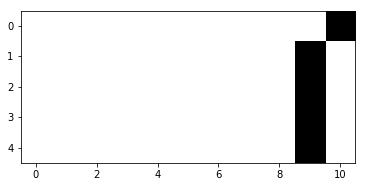

('Iteration', 18600, 'Train loss:', 0.14687215937915007)
Test loss:  0.162145789876
Input


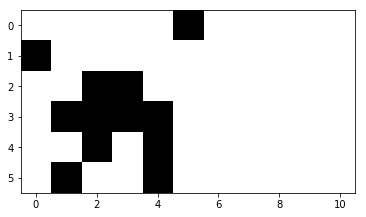

Target


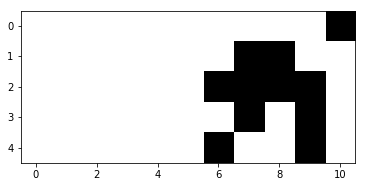

Predicted


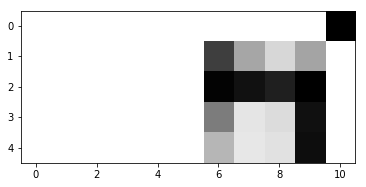

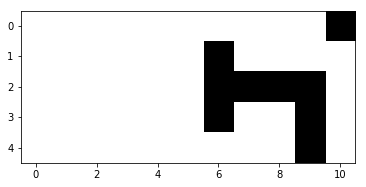

('Iteration', 18700, 'Train loss:', 0.10341648897961719)
Test loss:  0.0942846654715
Input


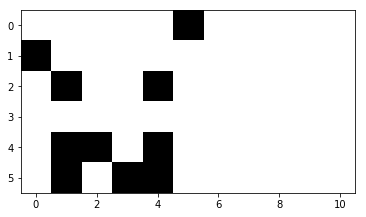

Target


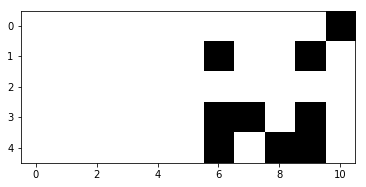

Predicted


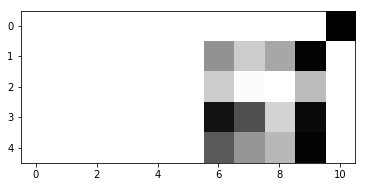

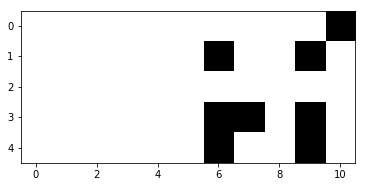

('Iteration', 18800, 'Train loss:', 0.10562395224171629)
Test loss:  0.100287418007
Input


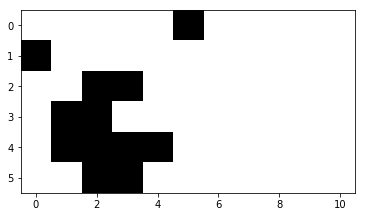

Target


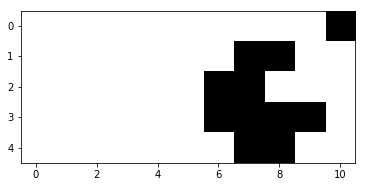

Predicted


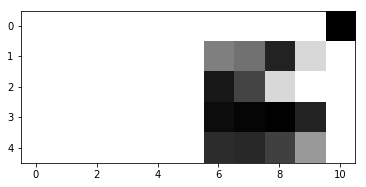

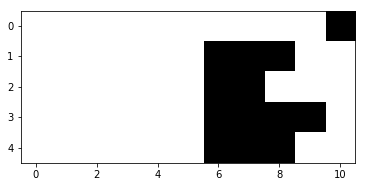

('Iteration', 18900, 'Train loss:', 0.12943820036569692)
Test loss:  0.111785918559
Input


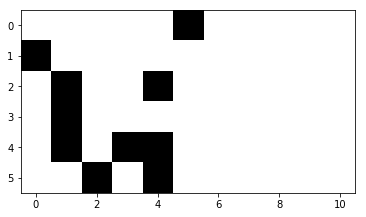

Target


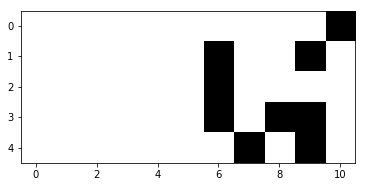

Predicted


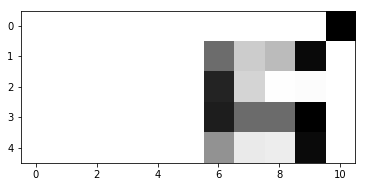

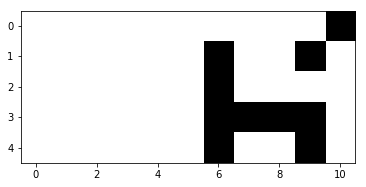

('Iteration', 19000, 'Train loss:', 0.098170498108202831)
Test loss:  0.105336796324
Input


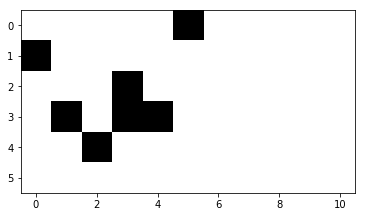

Target


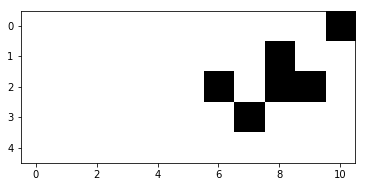

Predicted


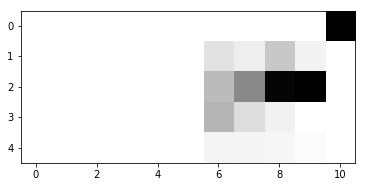

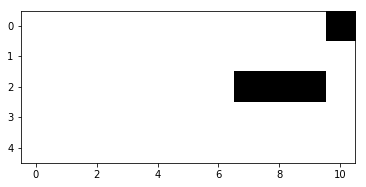

('Iteration', 19100, 'Train loss:', 0.067563359267613768)
Test loss:  0.0737268325743
Input


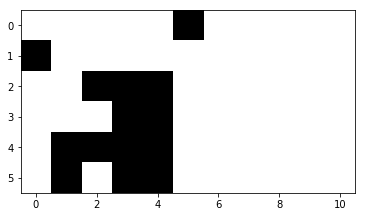

Target


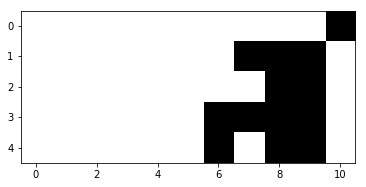

Predicted


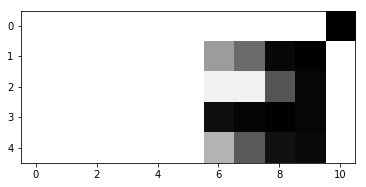

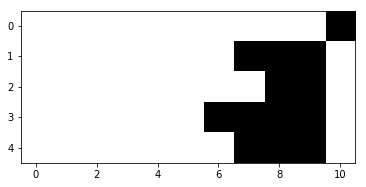

('Iteration', 19200, 'Train loss:', 0.0719391862695202)
Test loss:  0.17494647811
Input


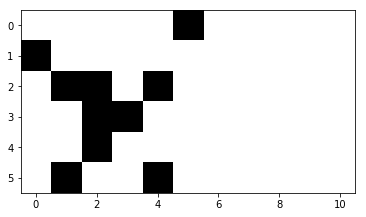

Target


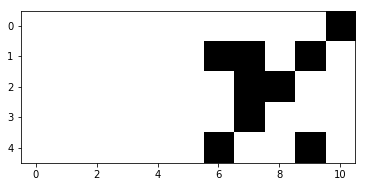

Predicted


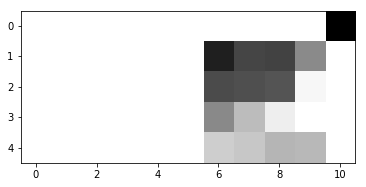

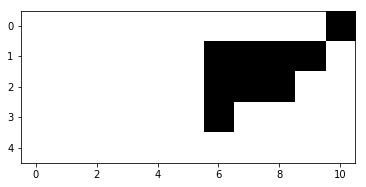

('Iteration', 19300, 'Train loss:', 0.076403328529612832)
Test loss:  0.163497778266
Input


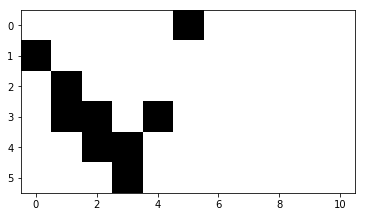

Target


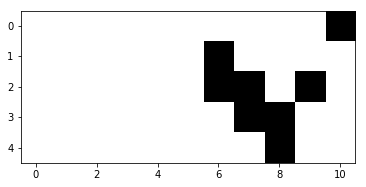

Predicted


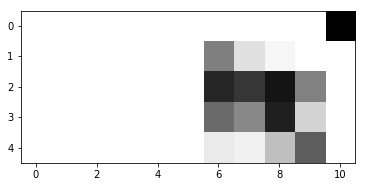

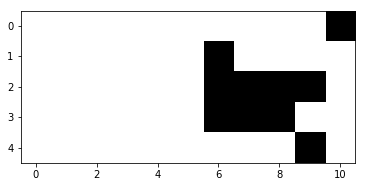

('Iteration', 19400, 'Train loss:', 0.12412754180570998)
Test loss:  0.129360893634
Input


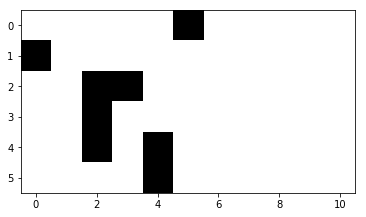

Target


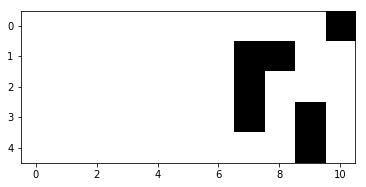

Predicted


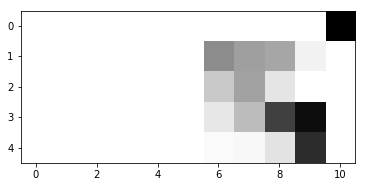

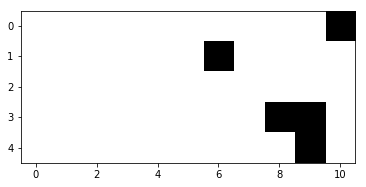

('Iteration', 19500, 'Train loss:', 0.11118320783733882)
Test loss:  0.11711911936
Input


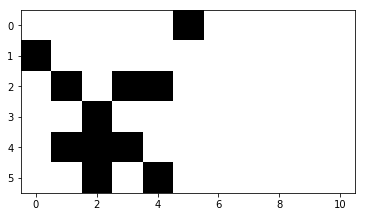

Target


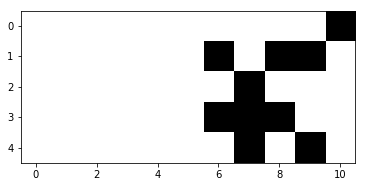

Predicted


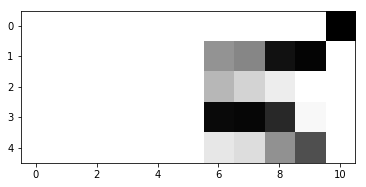

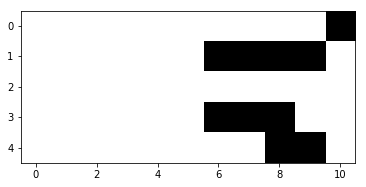

('Iteration', 19600, 'Train loss:', 0.052484314599749123)
Test loss:  0.141179110626
Input


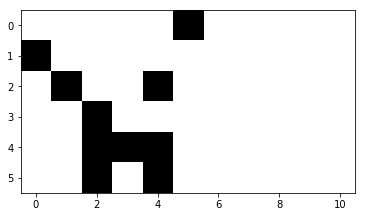

Target


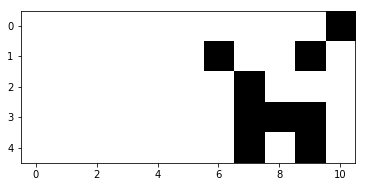

Predicted


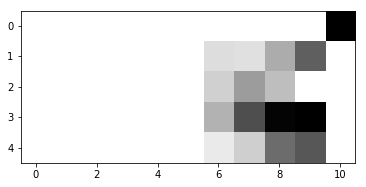

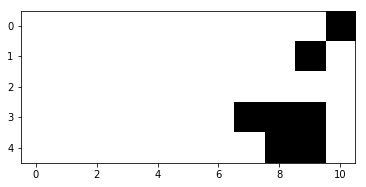

('Iteration', 19700, 'Train loss:', 0.098119400267261236)
Test loss:  0.0858495236453
Input


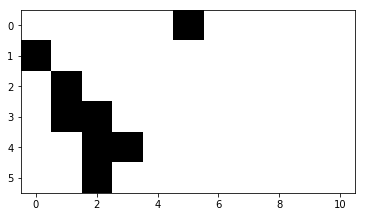

Target


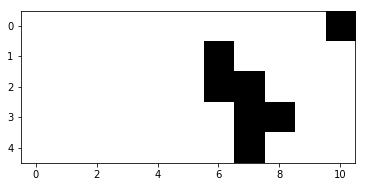

Predicted


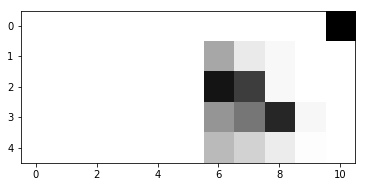

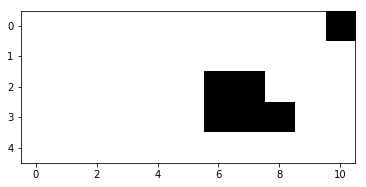

('Iteration', 19800, 'Train loss:', 0.1645818710159985)
Test loss:  0.175900465568
Input


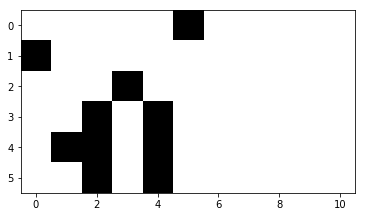

Target


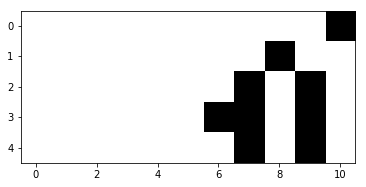

Predicted


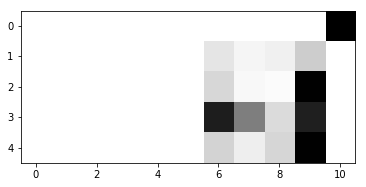

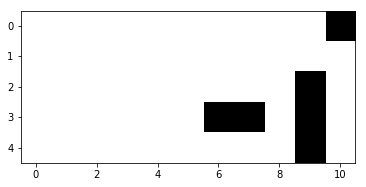

('Iteration', 19900, 'Train loss:', 0.050530761162470295)
Test loss:  0.118947259873
Input


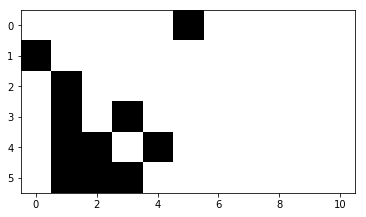

Target


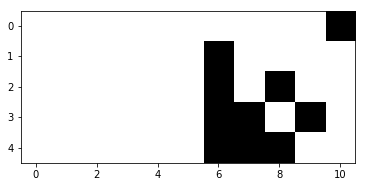

Predicted


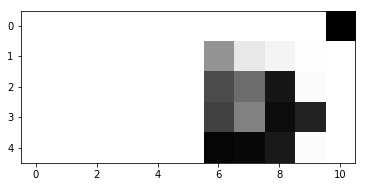

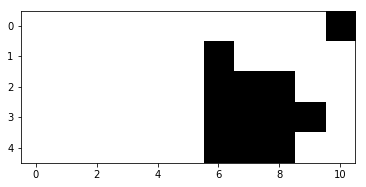

('Iteration', 20000, 'Train loss:', 0.15233074590829826)
Test loss:  0.0561818217669
Input


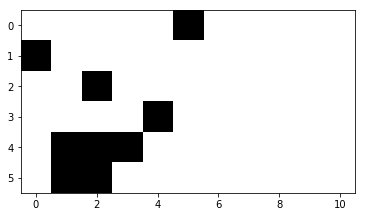

Target


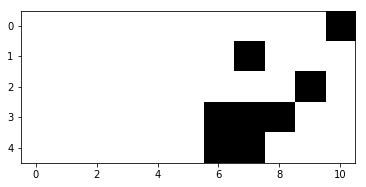

Predicted


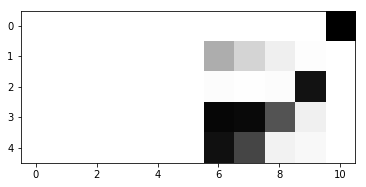

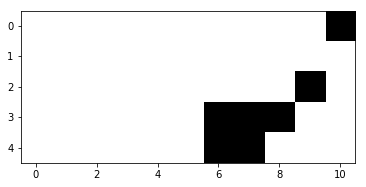

('Iteration', 20100, 'Train loss:', 0.11375773256279546)
Test loss:  0.0538731549662
Input


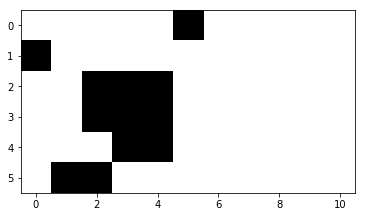

Target


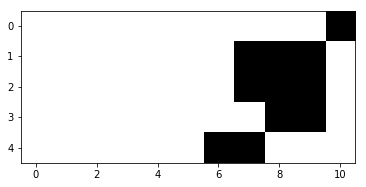

Predicted


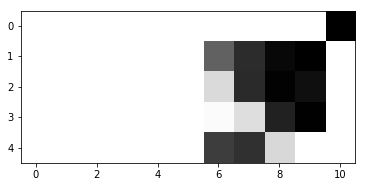

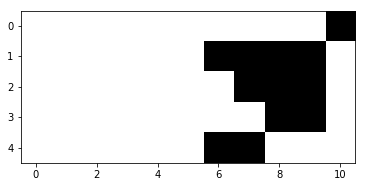

('Iteration', 20200, 'Train loss:', 0.12384499395126401)
Test loss:  0.122324683064
Input


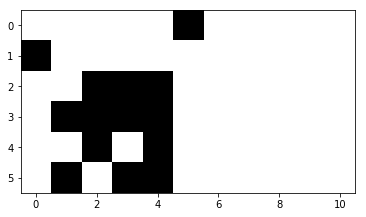

Target


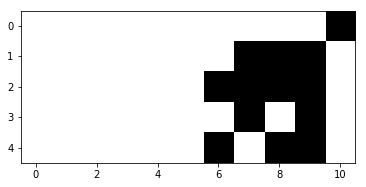

Predicted


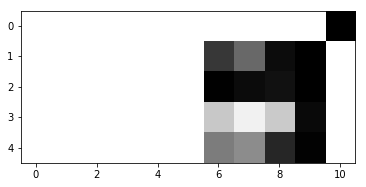

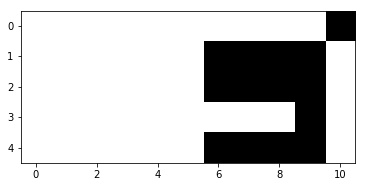

('Iteration', 20300, 'Train loss:', 0.0665767115632874)
Test loss:  0.0387250404202
Input


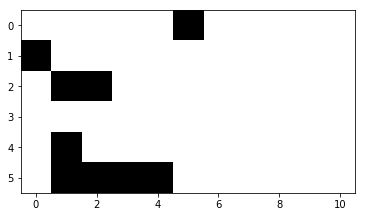

Target


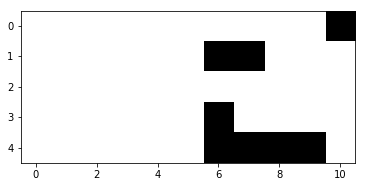

Predicted


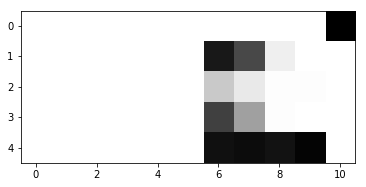

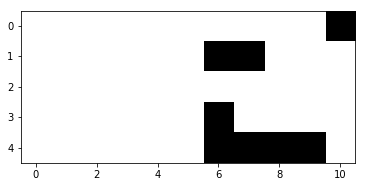

('Iteration', 20400, 'Train loss:', 0.052739147401471252)
Test loss:  0.0998515450059
Input


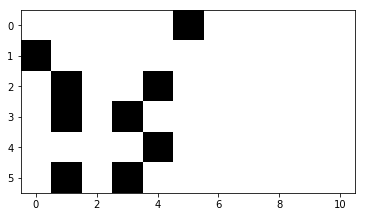

Target


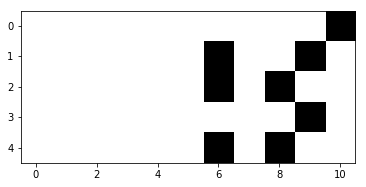

Predicted


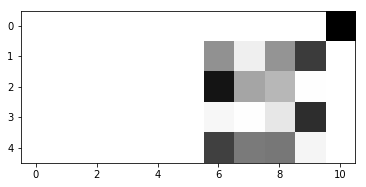

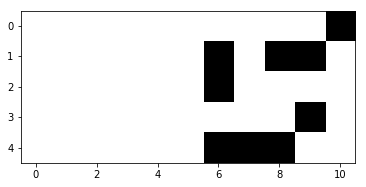

('Iteration', 20500, 'Train loss:', 0.058694076995221139)
Test loss:  0.182496100054
Input


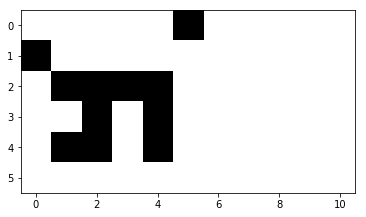

Target


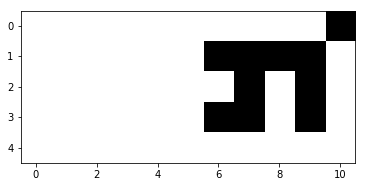

Predicted


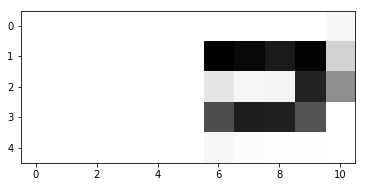

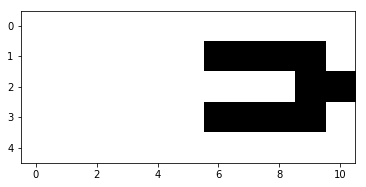

('Iteration', 20600, 'Train loss:', 0.041875088673000264)
Test loss:  0.159394587156
Input


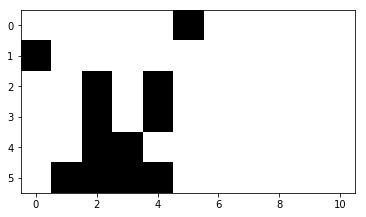

Target


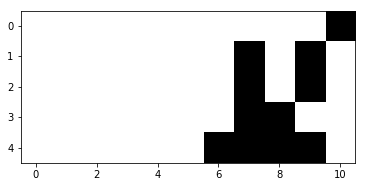

Predicted


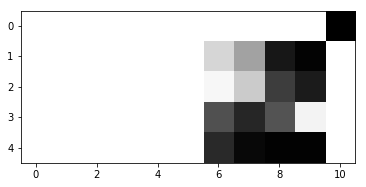

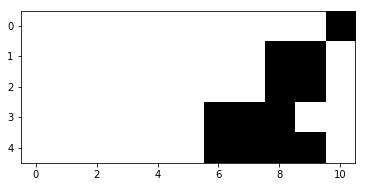

('Iteration', 20700, 'Train loss:', 0.094683559567528289)
Test loss:  0.0787350325208
Input


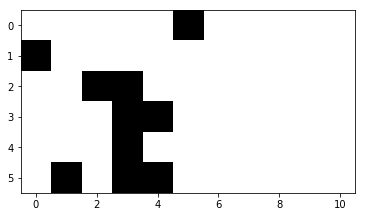

Target


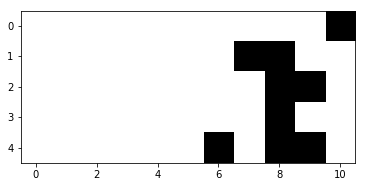

Predicted


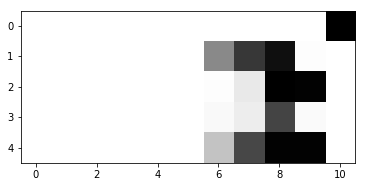

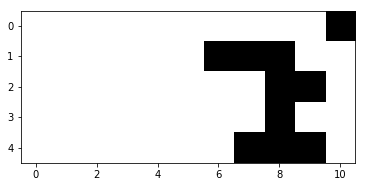

('Iteration', 20800, 'Train loss:', 0.16538939248739071)
Test loss:  0.0692321494353
Input


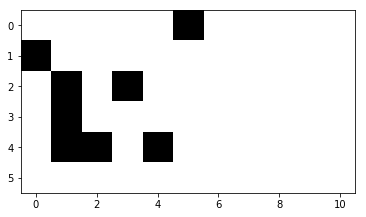

Target


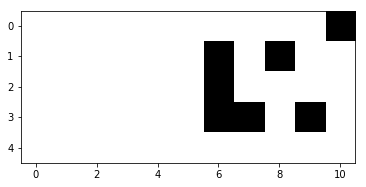

Predicted


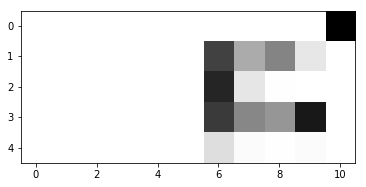

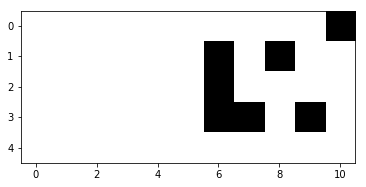

('Iteration', 20900, 'Train loss:', 0.18188746643887635)
Test loss:  0.0490560409146
Input


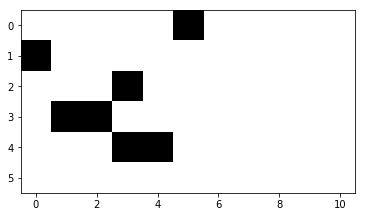

Target


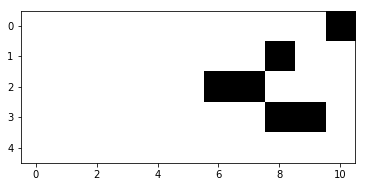

Predicted


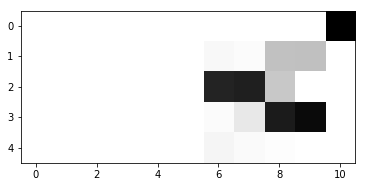

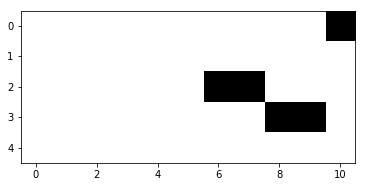

('Iteration', 21000, 'Train loss:', 0.051014385375920283)
Test loss:  0.0493957112571
Input


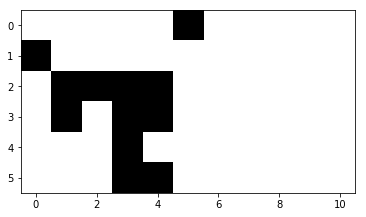

Target


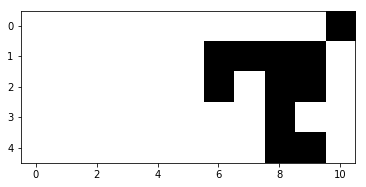

Predicted


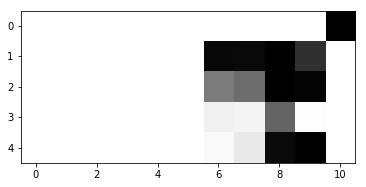

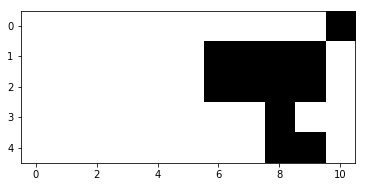

('Iteration', 21100, 'Train loss:', 0.065751705792435486)
Test loss:  0.0433351683383
Input


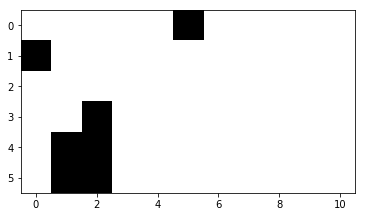

Target


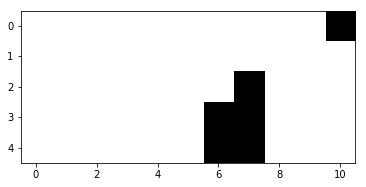

Predicted


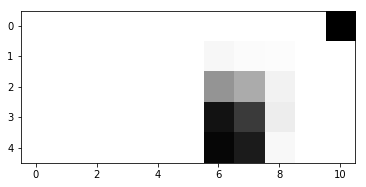

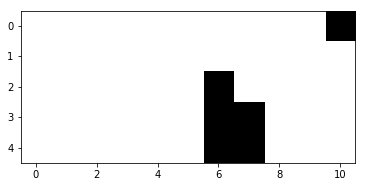

('Iteration', 21200, 'Train loss:', 0.12395725871847221)
Test loss:  0.0858811905552
Input


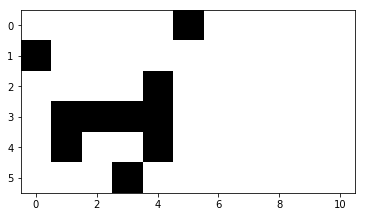

Target


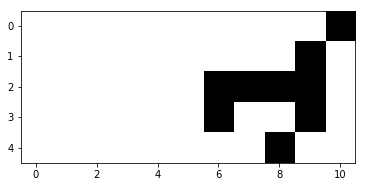

Predicted


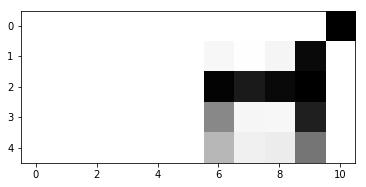

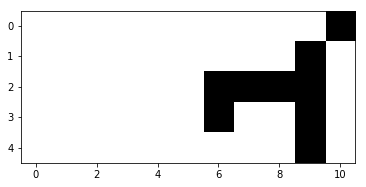

('Iteration', 21300, 'Train loss:', 0.10394744918130755)
Test loss:  0.140385063806
Input


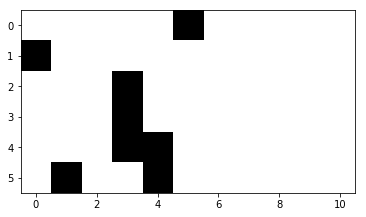

Target


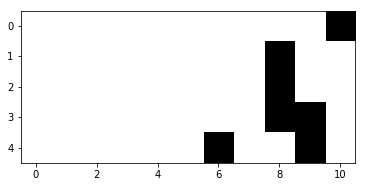

Predicted


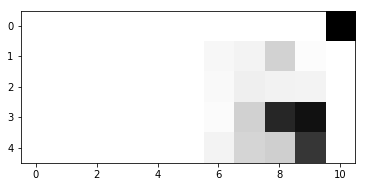

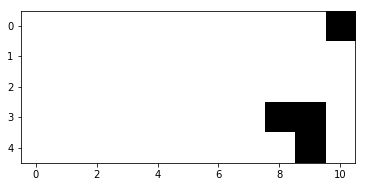

('Iteration', 21400, 'Train loss:', 0.064328337773412209)
Test loss:  0.143498721777
Input


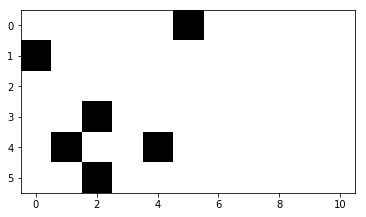

Target


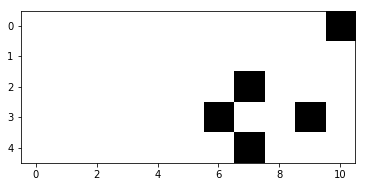

Predicted


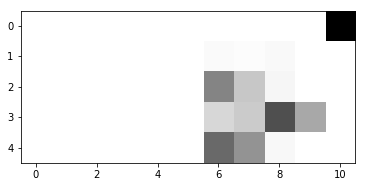

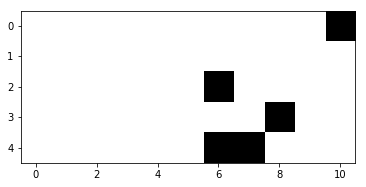

('Iteration', 21500, 'Train loss:', 0.09657833834870666)
Test loss:  0.128632404146
Input


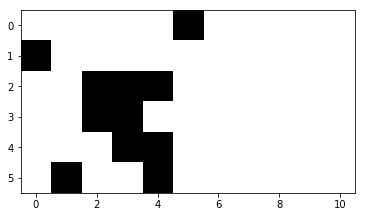

Target


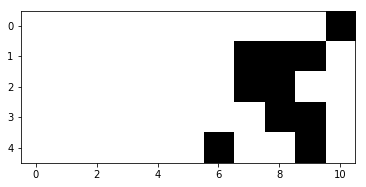

Predicted


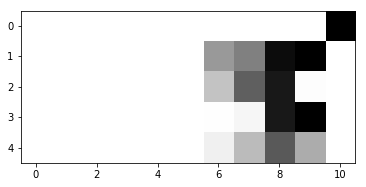

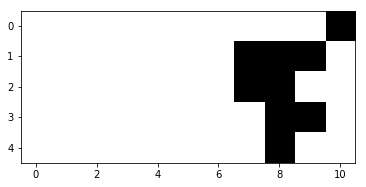

('Iteration', 21600, 'Train loss:', 0.087894831345705207)
Test loss:  0.149557877423
Input


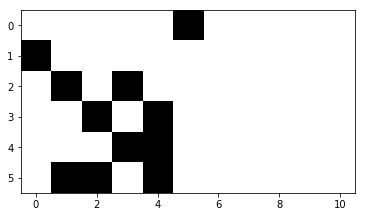

Target


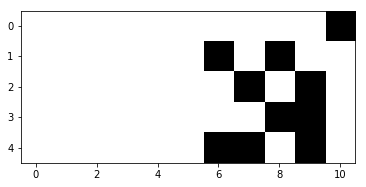

Predicted


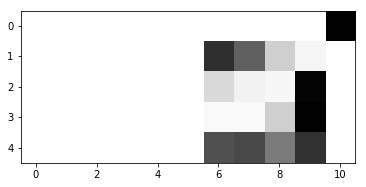

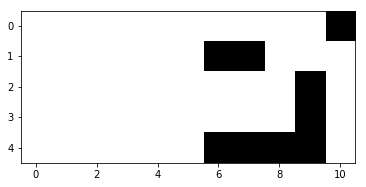

('Iteration', 21700, 'Train loss:', 0.10770392184153925)
Test loss:  0.0517181690724
Input


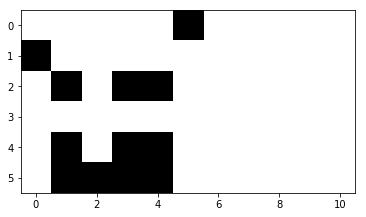

Target


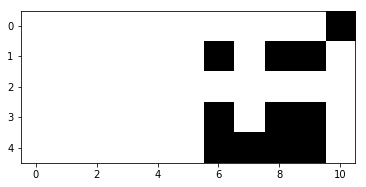

Predicted


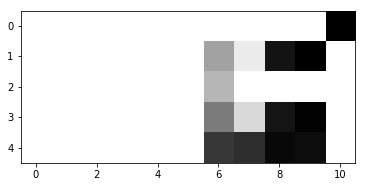

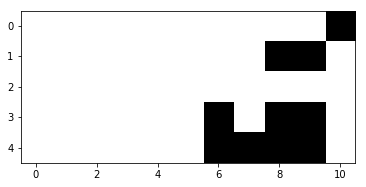

('Iteration', 21800, 'Train loss:', 0.098069411411674051)
Test loss:  0.0537127458283
Input


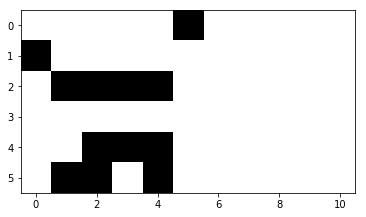

Target


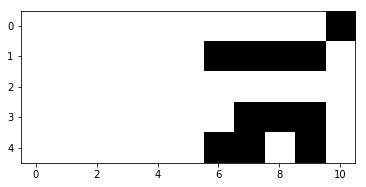

Predicted


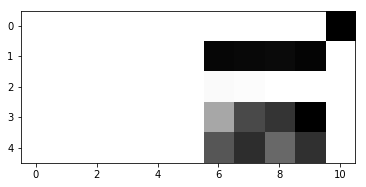

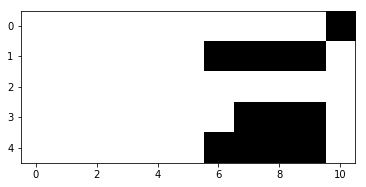

('Iteration', 21900, 'Train loss:', 0.062392591212157719)
Test loss:  0.0426395201409
Input


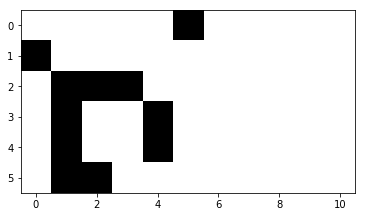

Target


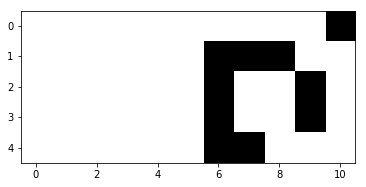

Predicted


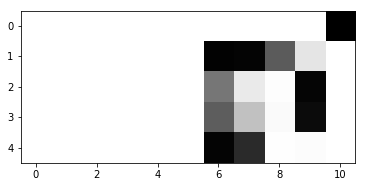

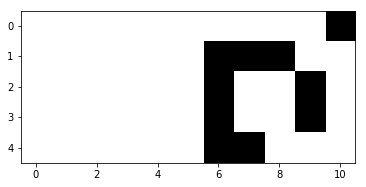

('Iteration', 22000, 'Train loss:', 0.059332828883513086)
Test loss:  0.106692976657
Input


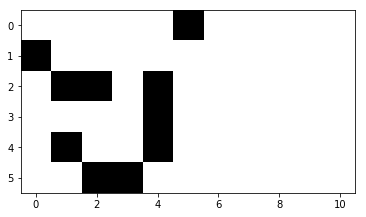

Target


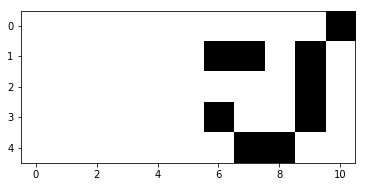

Predicted


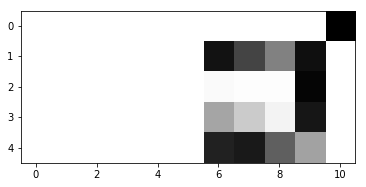

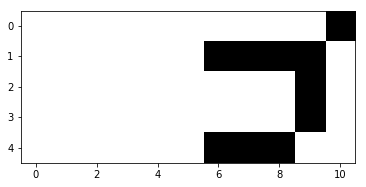

('Iteration', 22100, 'Train loss:', 0.069826874368318359)
Test loss:  0.0453950947098
Input


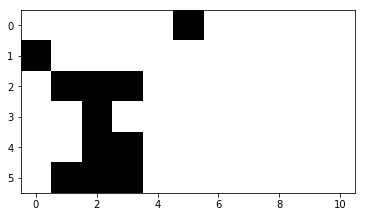

Target


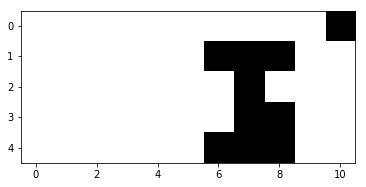

Predicted


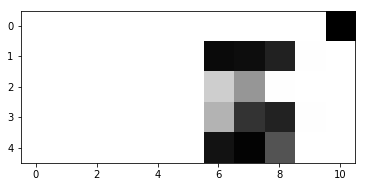

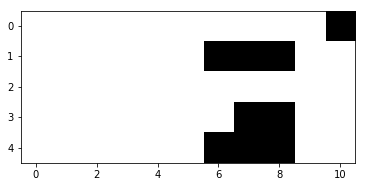

('Iteration', 22200, 'Train loss:', 0.1142019746667647)
Test loss:  0.126067425003
Input


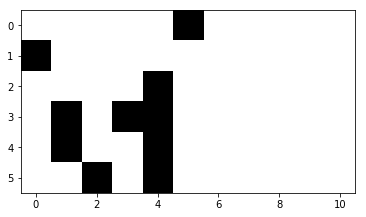

Target


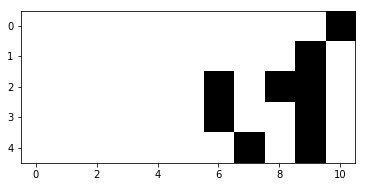

Predicted


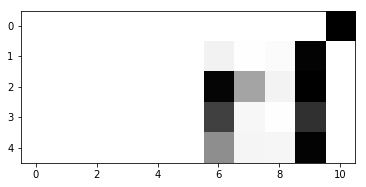

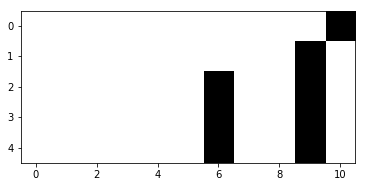

('Iteration', 22300, 'Train loss:', 0.1071189378245648)
Test loss:  0.0593516809488
Input


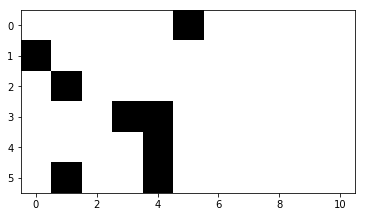

Target


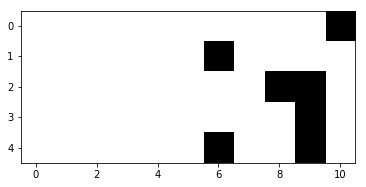

Predicted


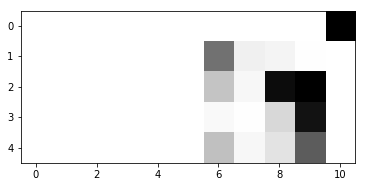

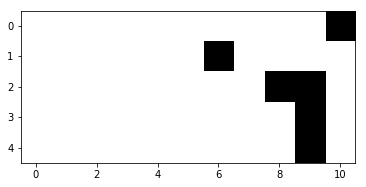

('Iteration', 22400, 'Train loss:', 0.11934052471271127)
Test loss:  0.118602871908
Input


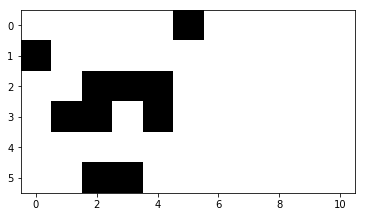

Target


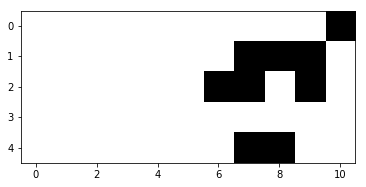

Predicted


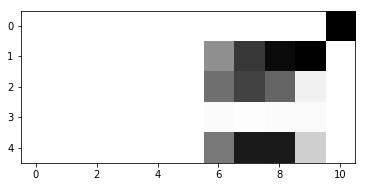

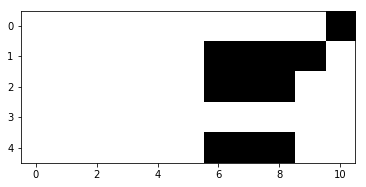

('Iteration', 22500, 'Train loss:', 0.091573398736178854)
Test loss:  0.185173778022
Input


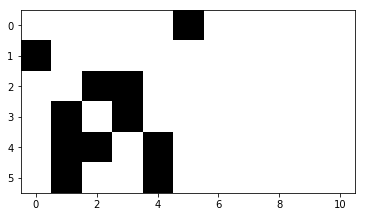

Target


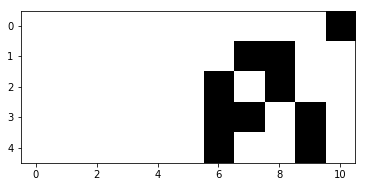

Predicted


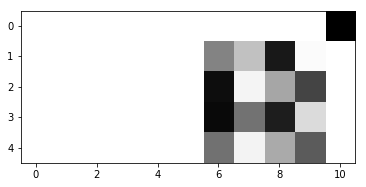

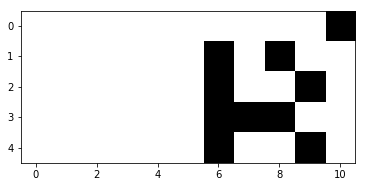

('Iteration', 22600, 'Train loss:', 0.092292501258907839)
Test loss:  0.0923852892018
Input


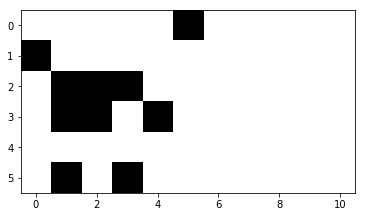

Target


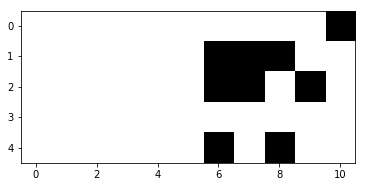

Predicted


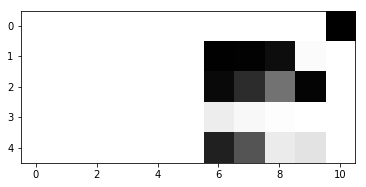

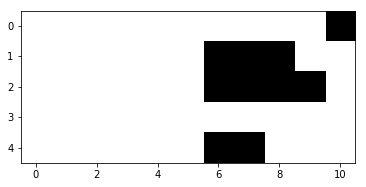

('Iteration', 22700, 'Train loss:', 0.096150426572668188)
Test loss:  0.0722614829309
Input


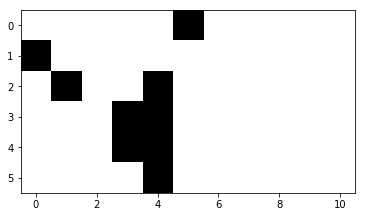

Target


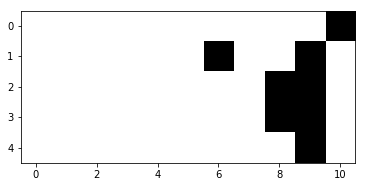

Predicted


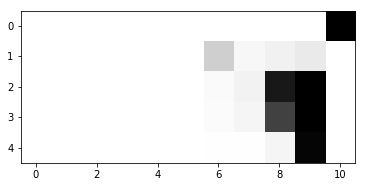

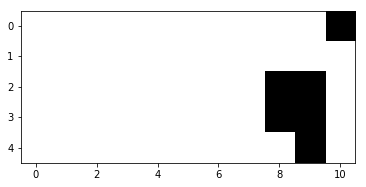

('Iteration', 22800, 'Train loss:', 0.10033419958803624)
Test loss:  0.148028226832
Input


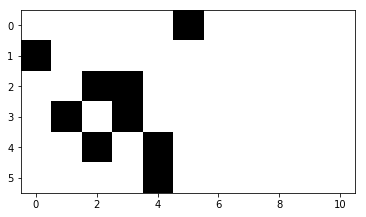

Target


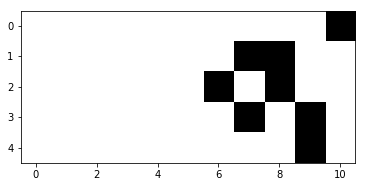

Predicted


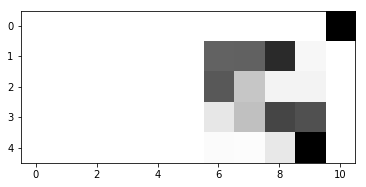

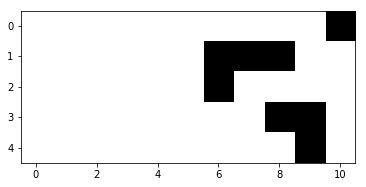

('Iteration', 22900, 'Train loss:', 0.024675808764681225)
Test loss:  0.0279120750573
Input


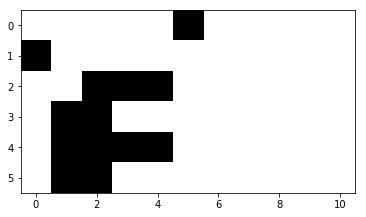

Target


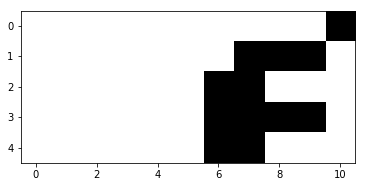

Predicted


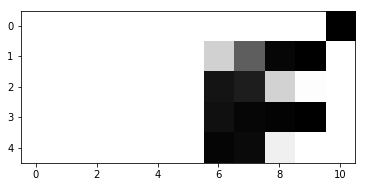

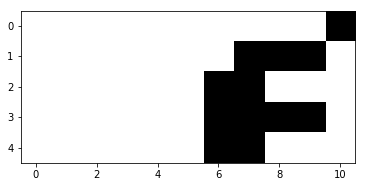

('Iteration', 23000, 'Train loss:', 0.020498404291537452)
Test loss:  0.0580585683837
Input


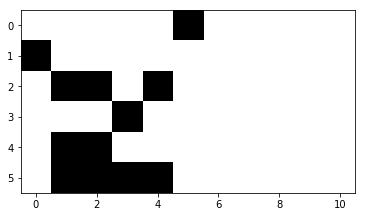

Target


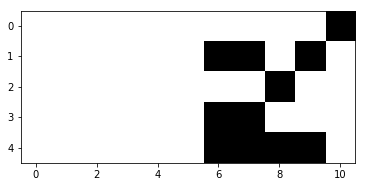

Predicted


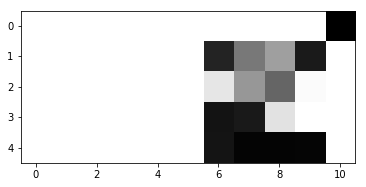

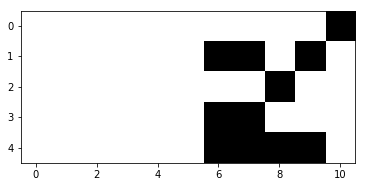

('Iteration', 23100, 'Train loss:', 0.1145108909729011)
Test loss:  0.0653919637129
Input


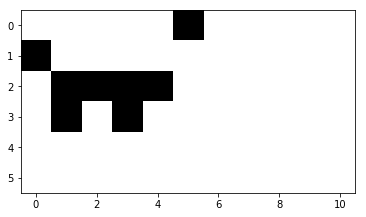

Target


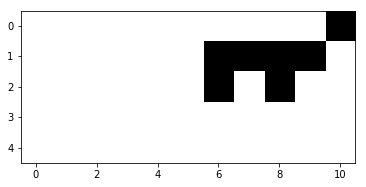

Predicted


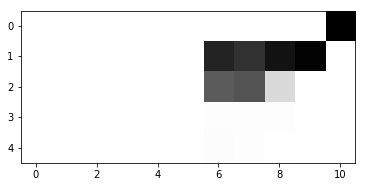

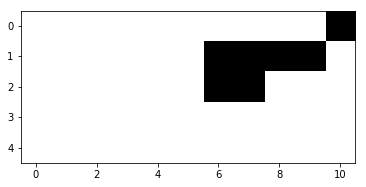

('Iteration', 23200, 'Train loss:', 0.079559477817780375)
Test loss:  0.0428938834077
Input


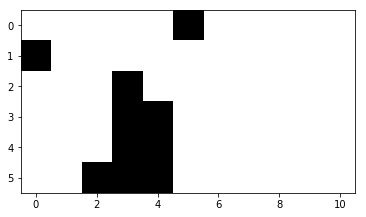

Target


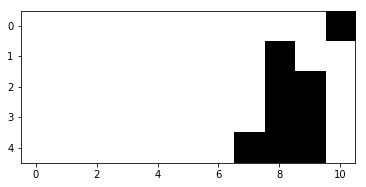

Predicted


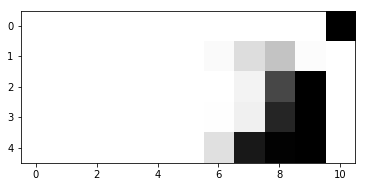

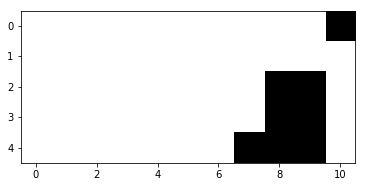

('Iteration', 23300, 'Train loss:', 0.17816640622007068)
Test loss:  0.0841355230106
Input


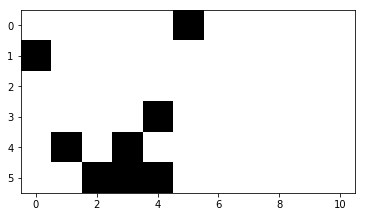

Target


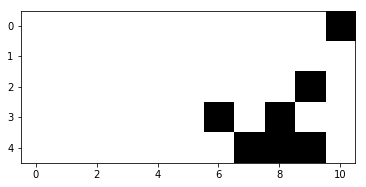

Predicted


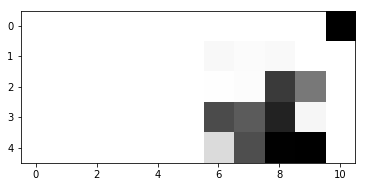

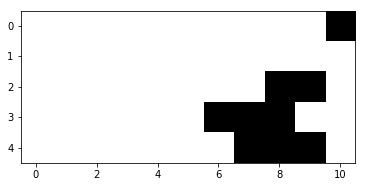

('Iteration', 23400, 'Train loss:', 0.036540620369158915)
Test loss:  0.0718339816583
Input


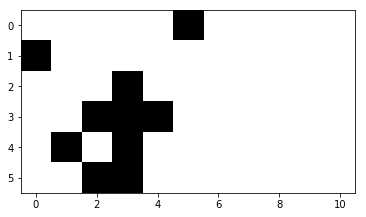

Target


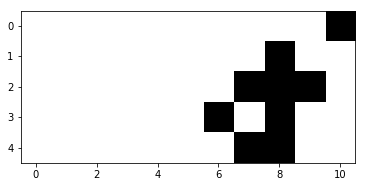

Predicted


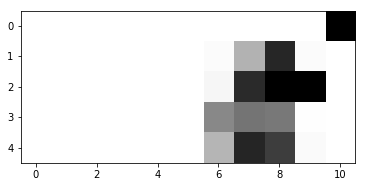

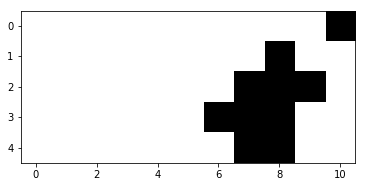

In [ ]:
## Testing recurrent DNC


def loss_fn(pred, target, mask):
    pred = sigmoid(pred)
    one = np.ones_like(pred)
    epsilon = 1.e-20 # to prevent log(0)
    a = target * np.log(pred + epsilon)
    b = (one - target) * np.log(one - pred + epsilon)
    return np.mean(- (a + b) * mask)

# def loss_fn(pred, target, mask):
#     pred = sigmoid(pred)
#     l2 = np.sqrt(np.square(pred - target))
#     return np.mean(l2 * mask)

def l2(x):
    """
    stable l2-norm
    """
    return np.sqrt(np.sum(np.multiply(x, x)) + 1.e-20) 

seq_len, seq_wid = 4, 4

# dnc = DNCFF(input_size=seq_wid+2, output_size=seq_wid+1, hidden_size=32, R=2, N=64, W=4)
dnc = DNC(input_size=seq_wid+2, output_size=seq_wid+1, hidden_size=32, R=2, N=64, W=4)
dnc_params = dnc._init_params()
# for k,v in dnc_params.items():
#     print k
#     print v.shape

def print_training_prediction(params, iters):
    
    inputs, targets, mask = seq(seq_len, seq_wid)
    result = []
    dnc = DNC(input_size=seq_wid+2, output_size=seq_wid+1, hidden_size=32, R=2, N=64, W=4)
    for t in range(inputs.shape[0]):
        out = dnc.step_forward(params, inputs[np.newaxis, t])
        result.append(out)
    result = np.concatenate(result, axis=0)
    loss = loss_fn(result, targets, mask)
    print "Test loss: ", loss
#     reg = l2(params['W_1']) + l2(params['W_2']) + l2(params['b_1']) + l2(params['b_2'])
#     print "Param Mag: ", 5e-4 * reg
    print "Input"
    display(inputs.T)
    print "Target"
    display(targets.T)
    print "Predicted"
    display((sigmoid(result) * mask).T)
    display(np.around((sigmoid(result) * mask), decimals=0).astype('int').T)
    
    # Saving Model Check Points
    save_pickle(params, './ckpt_lstm_rmsprop2/Iter_%d_Loss_%.6f.pkl' % (iters, loss))

    
def training_loss(params, iters):
    inputs, targets, mask = seq(seq_len, seq_wid)
    result = []
    dnc = DNC(input_size=seq_wid+2, output_size=seq_wid+1, hidden_size=32, R=2, N=64, W=4)
    for t in range(inputs.shape[0]):
        out = dnc.step_forward(params, inputs[np.newaxis, t])
        result.append(out)
    result = np.concatenate(result, axis=0)
#     # regularization
#     reg = l2(params['W_1']) + l2(params['W_2']) + l2(params['b_1']) + l2(params['b_2'])
    return loss_fn(result, targets, mask) # + 5.e-4 * reg

def callback(weights, iters, gradient):
    if iters % 100 == 0:
        print("Iteration", iters, "Train loss:", training_loss(weights, 0))
        print_training_prediction(weights, iters)

# Build gradient of loss function using autograd.
training_loss_grad = grad(training_loss)

print("Training DNC...")
# trained_params = adam(training_loss_grad, dnc_params, step_size=0.001,
#                       num_iters=1000000, callback=callback)
trained_params = rmsprop(training_loss_grad, dnc_params, step_size=0.001,
                      num_iters=1000000, callback=callback)